In [ ]:
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Avance 1

Importación del csv

In [2]:
data = pd.read_csv(r'D:\Cursos\Henry - Data Analytics\Modulo 4\PI\data_latinoamerica.csv', sep=',', low_memory=True)

**DATO:** Para para mejorar el rendimiento de la lectura del archivo, debido a su tamaño consume muchos recursos de la computadora, una de las formas para minimizar esa carga es estableciendo el separador e indicandole con "low_memory" que active la carga de fragmentos más pequeños para reducir el uso de memoria

Verificación del data frame

In [3]:
data.head() #mostrar el contenido del dataframe (5 primeros)

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [4]:
data.shape #verificar las dimensiones

(12216057, 50)

Filtrar por países a donde se quiere expandir

In [5]:
paisesExpansion = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']
dfPaises = data[data['country_name'].isin(paisesExpansion)]

Luego se elimina la variable data para mejorar el rendimiento

In [6]:
del data

In [7]:
dfPaises.shape

(11970289, 50)

Se vereficia la cantidad de nulos

In [8]:
dfPaises.isnull().sum()

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


Se filtra a través de "location_key" para obtener una muestra del csv. Con el fin de para no hacer un análisis con datos voluminosos.

In [9]:
muestra = ['AR', 'CL', 'CO', 'MX', 'PE', 'BR']
dfPaises = dfPaises[dfPaises['location_key'].isin(muestra)]
dfPaises.shape

(5946, 50)

Luego se filtra para obtener los datos después de 2021-01-01

In [ ]:
#fPaises['date'] = pd.to_datetime(dfPaises['date'], format = 'mixed')

In [10]:
dfDate = dfPaises[dfPaises['date'] >  '2021-01-01']

In [11]:
dfDate.shape

(3744, 50)

In [12]:
#Borramos "dfPaises" para evitar el mal rendimiento de vsc
del dfPaises

Se busca las columnas que tienen valores nulos

In [13]:
dfDate.isnull().sum()[dfDate.isnull().sum()>0]

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64

Se transforma en lista los resultados anteriores

In [14]:
columnas_nan = dfDate.columns[dfDate.isna().any()].tolist()
columnas_nan

['new_confirmed',
 'new_deceased',
 'cumulative_confirmed',
 'cumulative_deceased',
 'cumulative_vaccine_doses_administered',
 'average_temperature_celsius',
 'minimum_temperature_celsius',
 'maximum_temperature_celsius',
 'rainfall_mm',
 'relative_humidity',
 'new_recovered',
 'cumulative_recovered']

In [15]:
listaR = []
for x in columnas_nan:
    if dfDate[x].dtype == 'float64':
        listaR.append(x)
print(listaR)
del listaR

['new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity', 'new_recovered', 'cumulative_recovered']


Se rellena los valores en base al promedio por columns y por país

In [16]:
columnas_nan2 = ['new_recovered', 'cumulative_recovered', 'cumulative_vaccine_doses_administered']
for x in columnas_nan2:
    columnas_nan.remove(x)
columnas_nan

['new_confirmed',
 'new_deceased',
 'cumulative_confirmed',
 'cumulative_deceased',
 'average_temperature_celsius',
 'minimum_temperature_celsius',
 'maximum_temperature_celsius',
 'rainfall_mm',
 'relative_humidity']

In [17]:
for pais in paisesExpansion:
    for x in columnas_nan:
        dfDate.loc[dfDate['country_name'] == pais, x] = \
            dfDate.loc[dfDate['country_name'] == pais, x].fillna(dfDate.loc[dfDate['country_name'] == pais, x].mean())

Debido a la gran cantidad de nulos, no cinviene rellenarlos con un promedio

In [18]:
for x in columnas_nan2:
    dfDate.loc[:,x] = dfDate[x].fillna(0)

Se verifica el resultado

In [19]:
print(dfDate.isnull().sum()[dfDate.isnull().sum()>0])

Series([], dtype: int64)


Eliminación de registros nulos

In [20]:
#Se verifica la existencia de filas nulas
filasNulas = dfDate.isnull().all(axis=1).sum()
print(f'Total de filas nulas: {filasNulas}')

Total de filas nulas: 0


In [21]:
#Se verifica la existencia de columnas nulas
filasNulas = dfDate.isnull().all(axis=0).sum()
print(f'Total de columnas nulas: {filasNulas}')

Total de columnas nulas: 0


Guardado de datos filtrados con el nombre "DatosFinalesFiltrado.csv"

In [22]:
dfDate.to_csv('DatosFinalesFiltrado.csv', sep = ',', index=False)

**DATO:** se coloca "index=False" para evitar que cuando lo guarde, se agregue una columna extra

In [23]:
for i in dfDate.columns:
    print(i)
    print(dfDate[i].describe())
    print('---------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
---------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
---------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
---------------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.50

**1.- ¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?**<br>
Estas métricas nos dan un vistazo a grandes rasgos de los datos, métricas como la <br>
**media, mediana y la desviación estándar** indican tendencias y variabilidad en los datos.<br>
Las métricas como los **cuartiles** ayudan a analizar cómo se distribuyen los valores y en qué rango se encuentran.<br>

**2.- ¿Se muestran todas las estadísticas en todas las columnas?**<br>
La respuesta es no, por lo menos en el caso de estándar.<br> 

**3.- ¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?**<br>
Jupyter limita la visualización, muestra los primeros y los últimos datos, no obstante se puede cambiar eso.<br>
No obstante, algunas de las columnas, como las categóricas (como son: date, country_code, country_name, etc...), son de tipo "object" en Pandas.<br>
Y no se le pueden realizar operaciones estadísticas (exceptuando de la moda).<br>
La falta de ciertas métricas en columnas categóricas hace que el anpalisis se mantenga relevante y preciso, evitando malinterpretaciones.

Crear una función que permita obtener la mediana, varianza y el rango.

In [25]:
def calcEstadisticos(dfDate):
    for i in dfDate.columns:
        if dfDate[i].dtype=='float64' or dfDate[i].dtype=='int64':
            print(i)
            print('Mediana:',dfDate[i].median())
            print('varianza:',dfDate[i].var())
            print('Rango', dfDate[i].max()-dfDate[i].min())
            print("Moda",dfDate[i].mode())
            print('---------------------------------')
calcEstadisticos(dfDate)

new_confirmed
Mediana: 5214.0
varianza: 586577465.58212
Rango 298981.0
Moda 0    0.0
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
Mediana: 100.5
varianza: 257292.4462981465
Rango 11447.0
Moda 0    0.0
Name: new_deceased, dtype: float64
---------------------------------
cumulative_confirmed
Mediana: 3632143.5
varianza: 63828420109841.22
Rango 34567862.0
Moda 0     6093645.0
1     6095316.0
2     6099111.0
3     6103455.0
4     6109105.0
5     6117847.0
6     6131657.0
7     6151354.0
8     6175181.0
9     6198848.0
10    6223497.0
11    6247634.0
12    6265798.0
13    6278998.0
14    6286392.0
15    6293130.0
16    6299595.0
17    6302809.0
18    9313453.0
19    9341492.0
20    9367172.0
21    9394326.0
22    9426171.0
23    9465827.0
24    9507562.0
25    9560307.0
26    9602534.0
27    9633732.0
28    9658391.0
29    9678225.0
30    9689861.0
Name: cumulative_confirmed, dtype: float64
---------------------------------
cumulative_deceased
Mediana: 

#### 1.- ¿Qué representa la mediana?
La **mediana** representa el valor medio de un conjunto de datos ordenado.

#### 2.- ¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango?
Las columnas acumuladas (cumulative_confirmed, cumulative_deceased, cumulative_recovered) tienden a tener mayor dispersión (alto rango y alta varianza) en comparación con las columnas que registran datos diarios (new_confirmed, new_deceased).<br>
Los nuevos casos confirmados presentan una mayor varianza en comparación con las muertes diarias, lo que sugiere que los casos diarios son más variables que las muertes diarias.<br>
El rango alto en todas las columnas indica que las diferencias entre los valores mínimo y máximo son significativas en todos los casos.<br>

#### 3.- ¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?
**Datos inconsistentes o con alta variabilidad:**<br>
La combinación de alta varianza, amplio rango y medianas bajas en las columnas sugiere que los datos tienen valores extremos que afectan la distribución, haciendo que las observaciones sean muy dispares. Esto implica que la serie tiene mucha variabilidad y podría ser difícil predecir tendencias a simple vista.<br>
**Picos y valores atípicos:**<br>
En varias columnas (como new_confirmed y new_deceased), la baja mediana combinada con un alto rango indica que hay días o regiones con valores muy elevados, pero la mayoría de las observaciones son pequeñas o nulas. Esto puede apuntar a eventos esporádicos o outliers.<br>
**Distribución desigual en datos acumulativos:**<br>
Las columnas acumuladas (cumulative_confirmed, cumulative_deceased, cumulative_recovered) presentan grandes rangos y varianzas, sugiriendo que hay diferencias significativas en cómo evolucionaron los datos a lo largo del tiempo o entre regiones.

# Avance 2

In [3]:
data = pd.read_csv(r'D:\Cursos\Henry - Data Analytics\Modulo 4\PI\DatosFinalesFiltrado.csv', sep=',', low_memory=True)
data.shape

(3744, 50)

------------------------------------------------------------------------------------------------------------------------------------
**Buscar si hay relaciones entre variables**

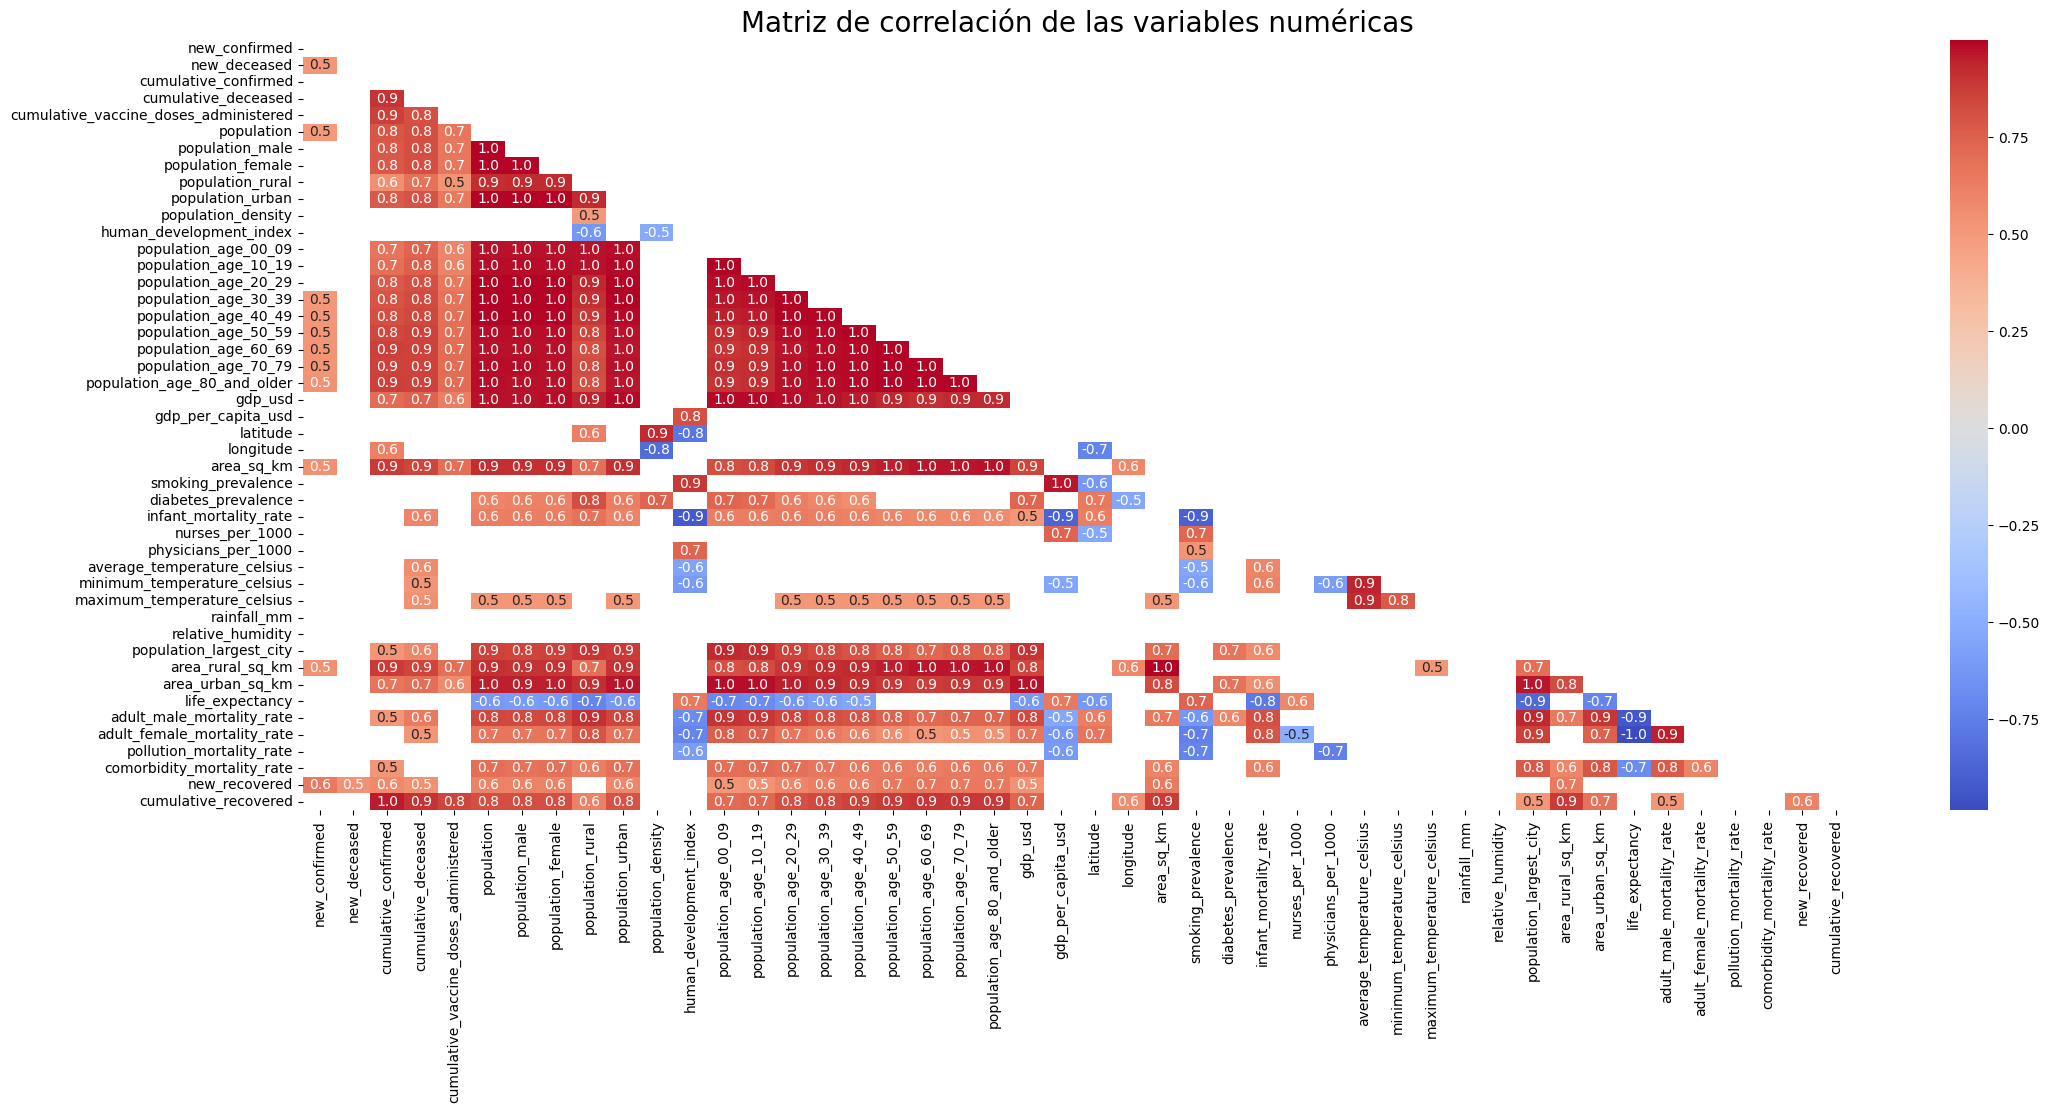

In [4]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
matriz_co = data[numeric_columns].corr()
mask = np.triu(np.ones_like(matriz_co, dtype=bool))
matriz_co = matriz_co[abs(matriz_co) > abs(0.5)] #se filtra las que tengan correlación > 0.5
#graficar
plt.figure(figsize=(25, 10))
sns.heatmap(matriz_co, mask=mask, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

La correlación entre dos variables, no implica la causalidad de la otra

------------------------------------------------------------------------------------------------------------------------------------
**Creación de gráfico de barra para comparar nuevos casos por cada país**

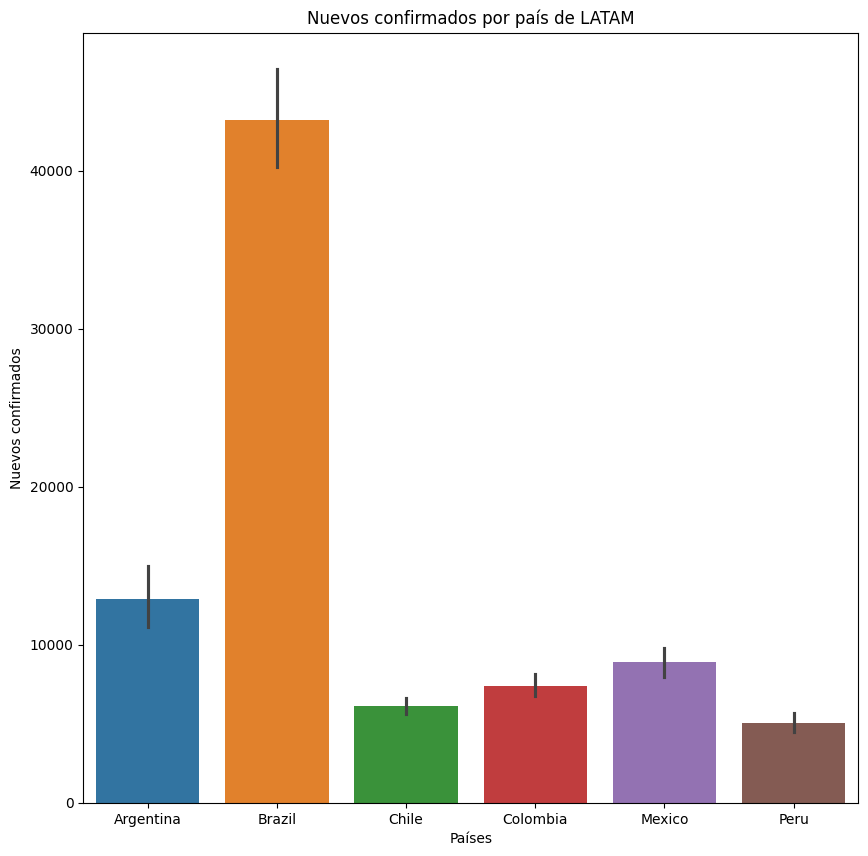

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='country_name', y='new_confirmed', data=data, ax=ax, hue='country_name')
plt.title('Nuevos confirmados por país de LATAM')
plt.xlabel('Países')
plt.ylabel('Nuevos confirmados')
plt.show()

In [8]:
columnas = data.columns.tolist()
columnas

['location_key',
 'date',
 'country_code',
 'country_name',
 'new_confirmed',
 'new_deceased',
 'cumulative_confirmed',
 'cumulative_deceased',
 'cumulative_vaccine_doses_administered',
 'population',
 'population_male',
 'population_female',
 'population_rural',
 'population_urban',
 'population_density',
 'human_development_index',
 'population_age_00_09',
 'population_age_10_19',
 'population_age_20_29',
 'population_age_30_39',
 'population_age_40_49',
 'population_age_50_59',
 'population_age_60_69',
 'population_age_70_79',
 'population_age_80_and_older',
 'gdp_usd',
 'gdp_per_capita_usd',
 'latitude',
 'longitude',
 'area_sq_km',
 'smoking_prevalence',
 'diabetes_prevalence',
 'infant_mortality_rate',
 'nurses_per_1000',
 'physicians_per_1000',
 'average_temperature_celsius',
 'minimum_temperature_celsius',
 'maximum_temperature_celsius',
 'rainfall_mm',
 'relative_humidity',
 'population_largest_city',
 'area_rural_sq_km',
 'area_urban_sq_km',
 'life_expectancy',
 'adult_male_m

Se selecciona las columnas que no se quieran analizar

In [14]:
columnas_filtrar = ['location_key','date','country_code','country_name','latitude','longitude','cumulative_deceased',
            'cumulative_recovered','cumulative_vaccine_doses_administered','cumulative_confirmed']

------------------------------------------------------------------------------------------------------------------------------------
**Creación de Histogramas**

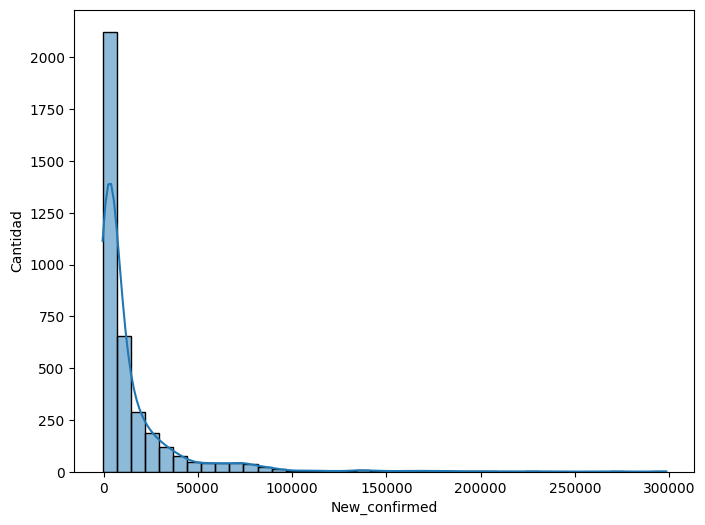

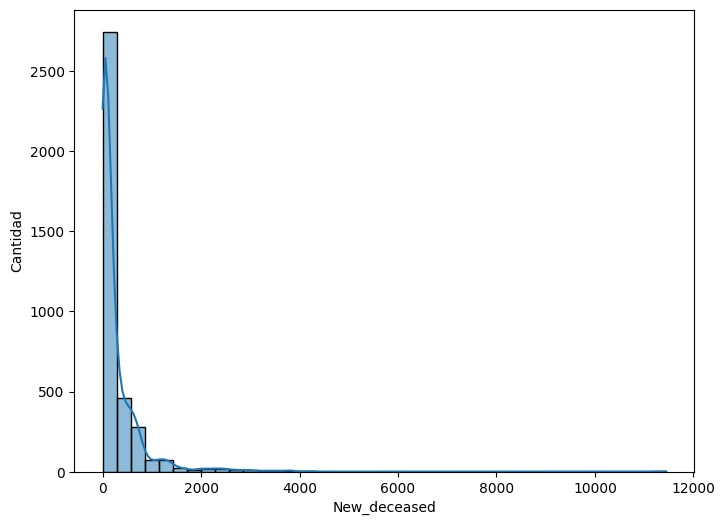

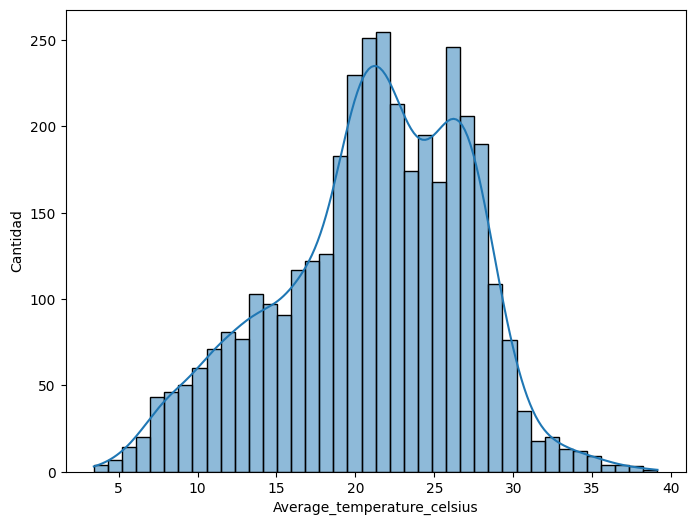

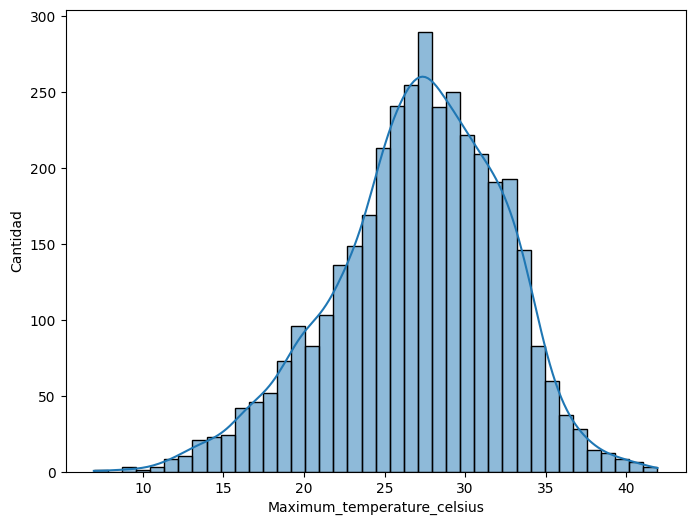

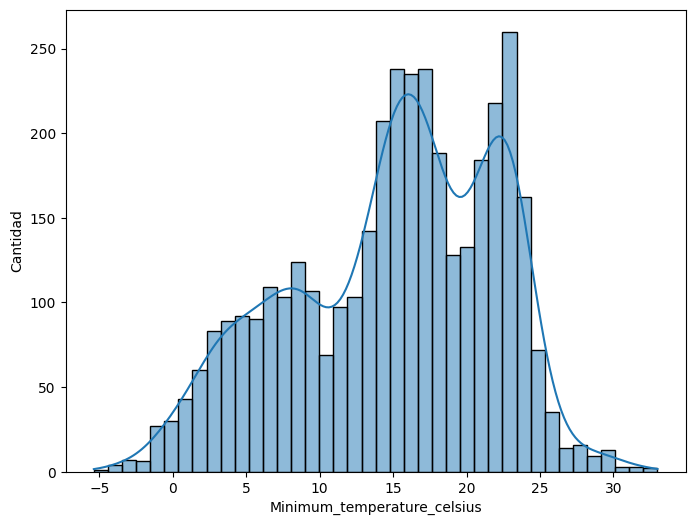

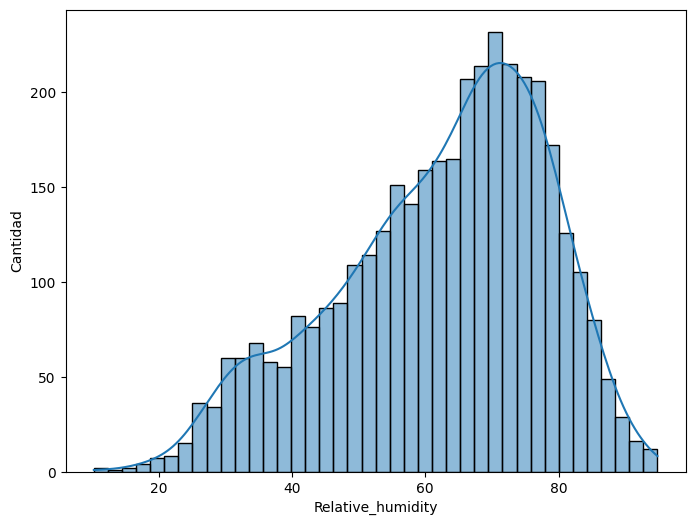

In [20]:
seleccionadas = [
    "new_confirmed", "new_deceased", "cumulative_confirmed", 
    "cumulative_deceased", "cumulative_vaccine_doses_administered", 
    "average_temperature_celsius", "maximum_temperature_celsius", 
    "minimum_temperature_celsius", "relative_humidity"
]

# Crear histogramas de las variables numéricas
for i in data[seleccionadas]:
    if i not in columnas_filtrar:
        fig, ax = plt.subplots(figsize=(8,6))
        sns.histplot(data[i], bins=40, kde=True)
        plt.xlabel(i.capitalize())
        plt.ylabel('Cantidad')
        plt.show()

------------------------------------------------------------------------------------------------------------------------------------
**Creación de Gráficas de Dispersión**

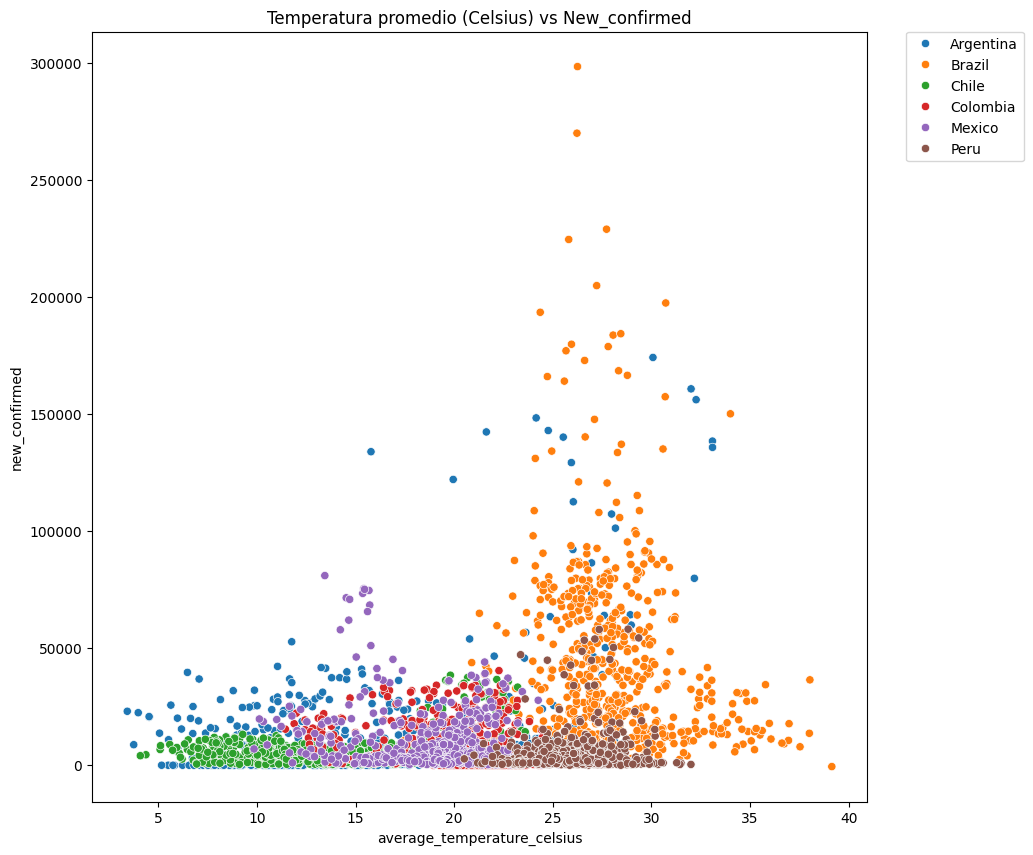

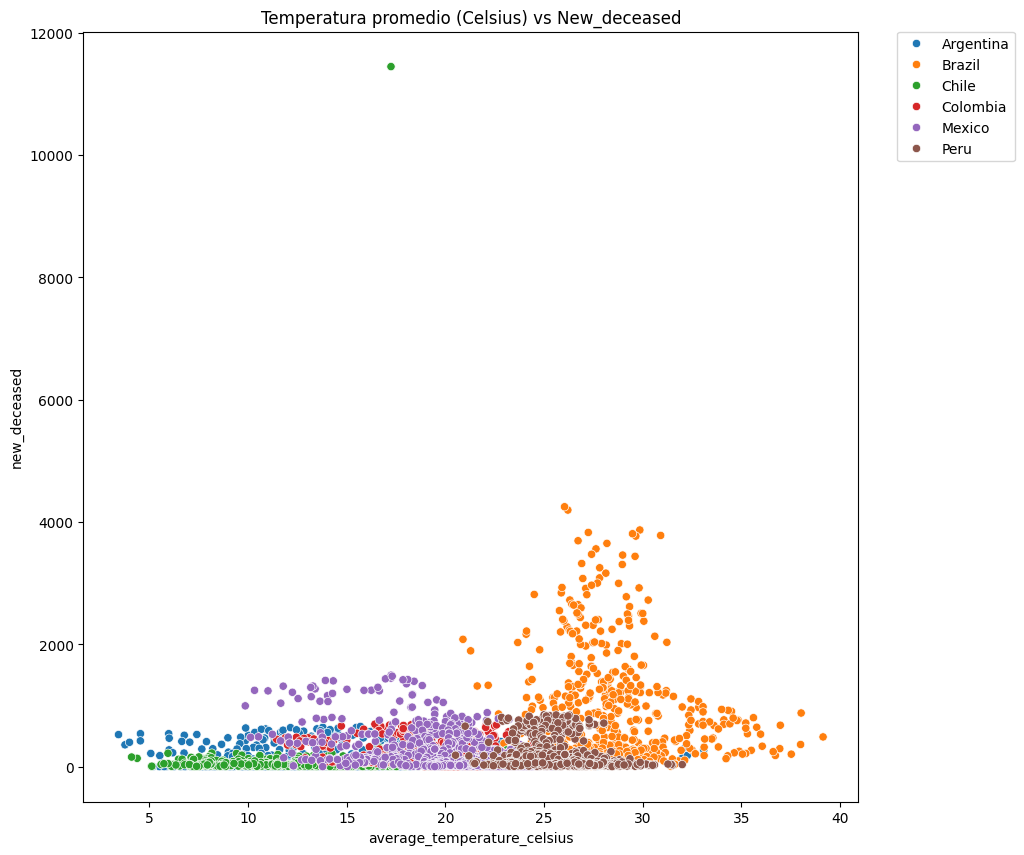

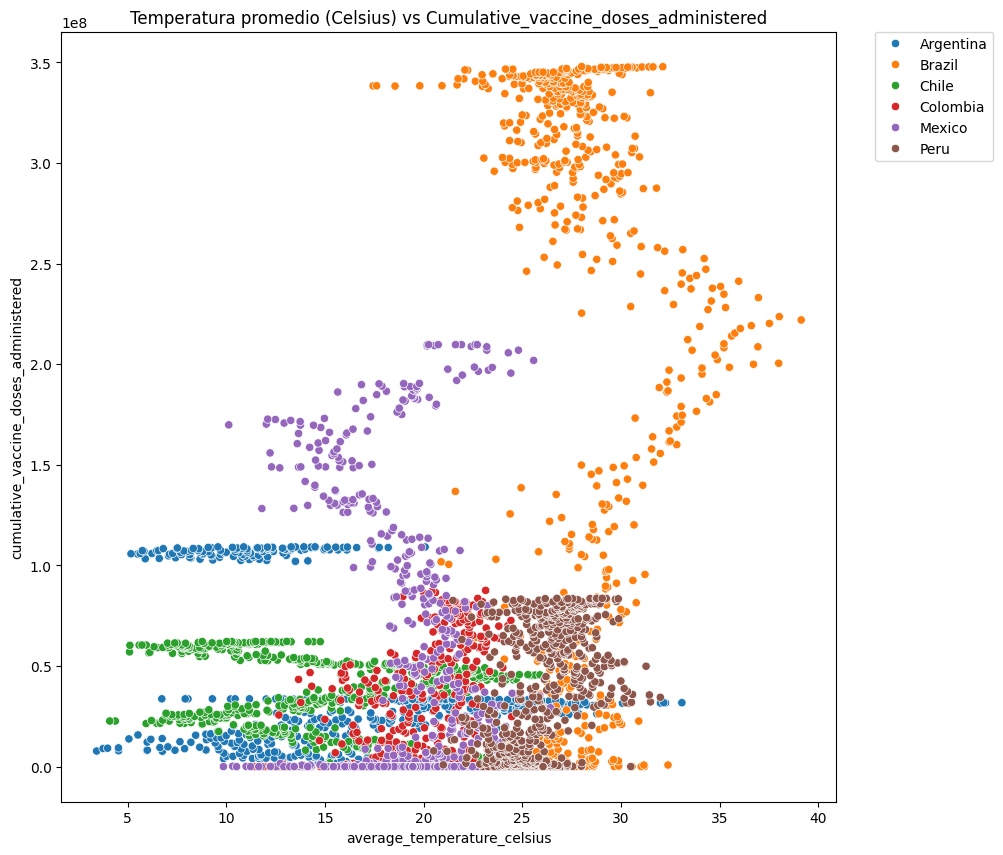

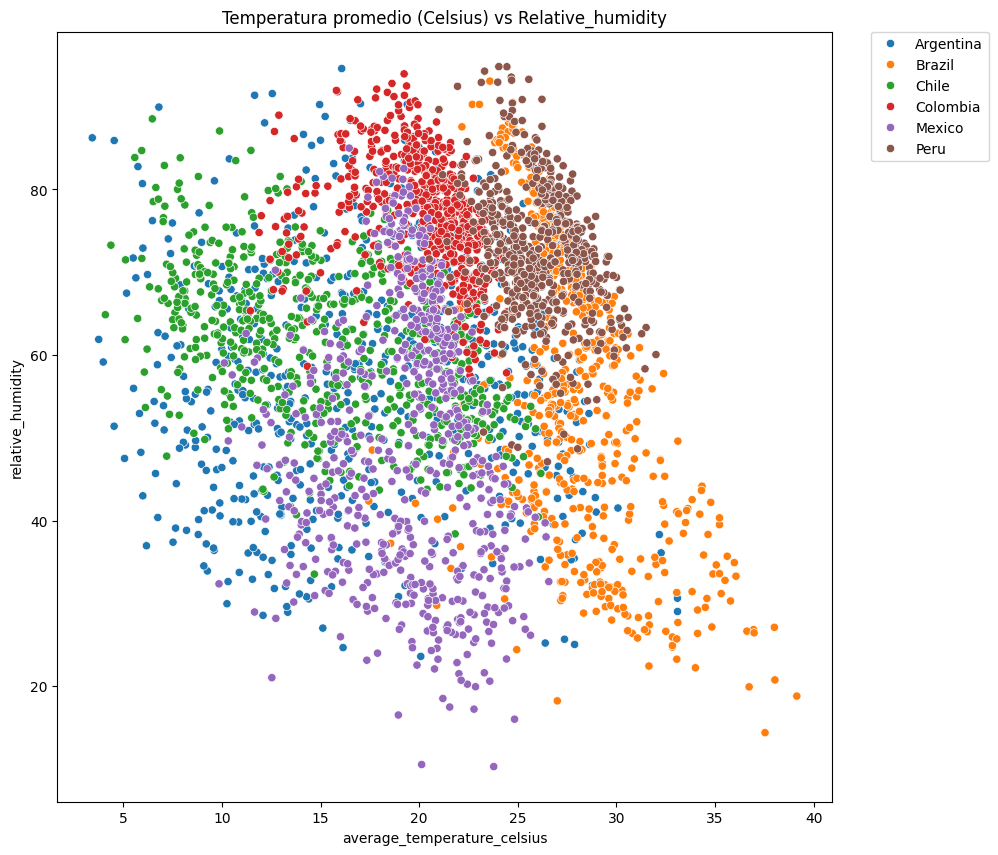

In [ ]:
for i in seleccionadas:
    if i not in ["cumulative_confirmed", 
    "cumulative_deceased", 
    "average_temperature_celsius", "maximum_temperature_celsius", 
    "minimum_temperature_celsius"]:
        fig, ax = plt.subplots(figsize=(10,10))
        sns.scatterplot(x='average_temperature_celsius', y=i, data=data, hue='country_name')
        plt.title(f'Temperatura promedio (Celsius) vs {i.capitalize()}')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.show()

------------------------------------------------------------------------------------------------------------------------------------
**Creación de Gráficos de Barras**

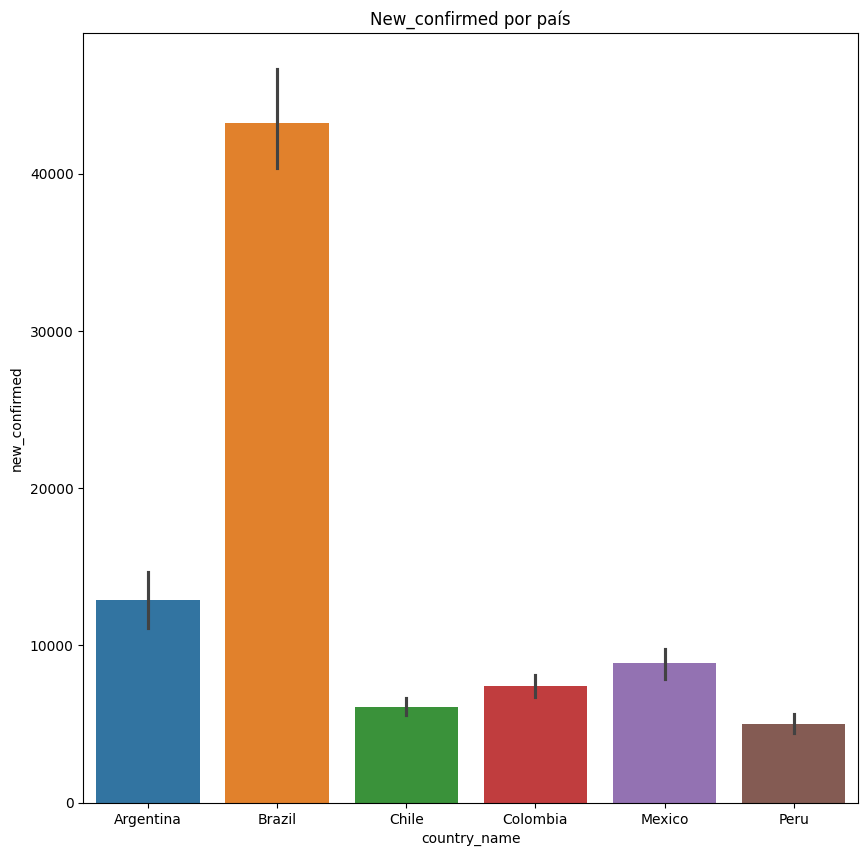

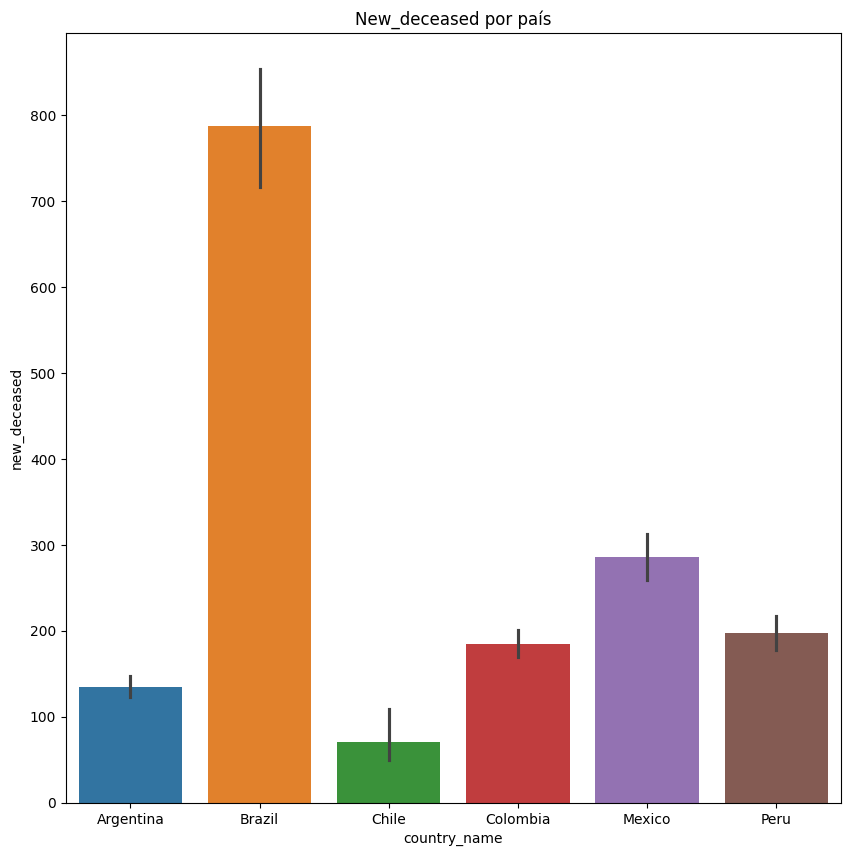

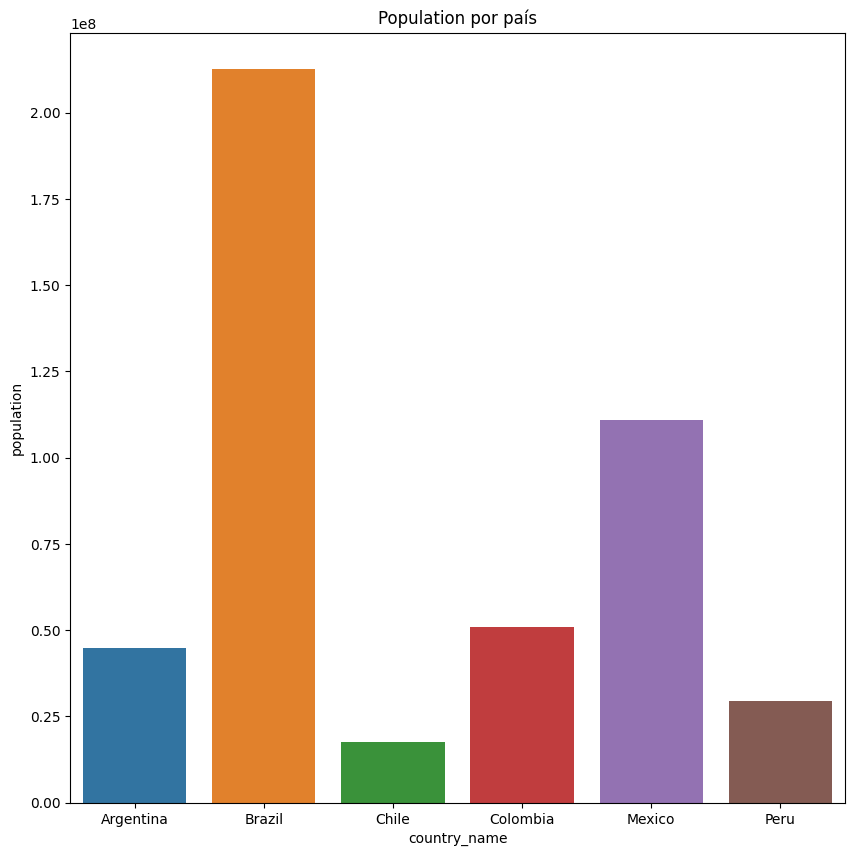

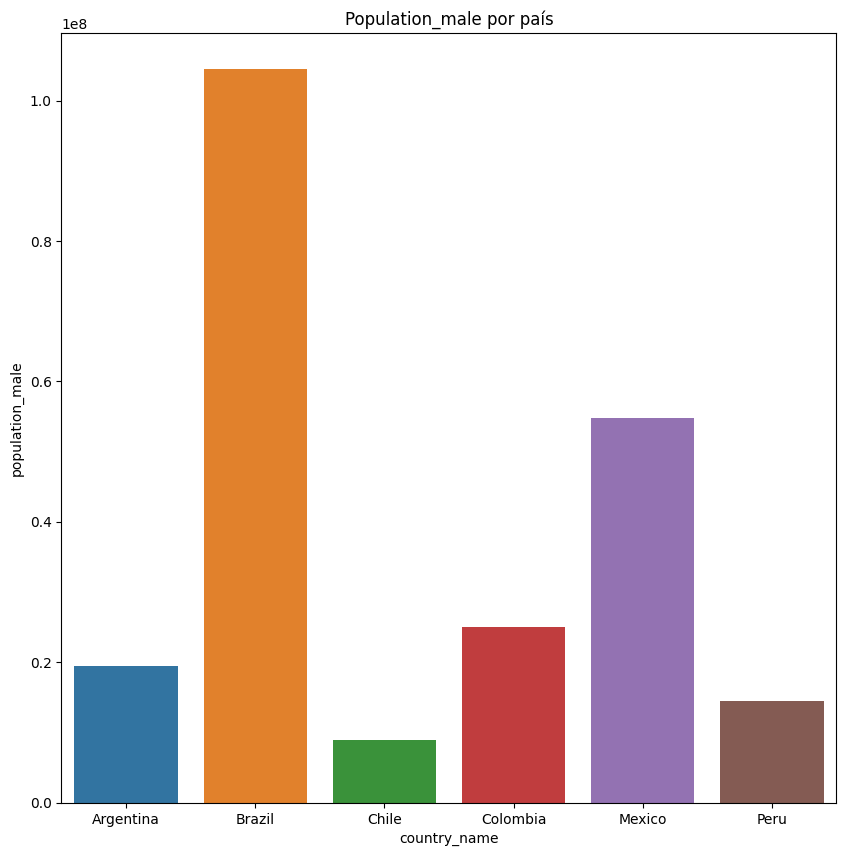

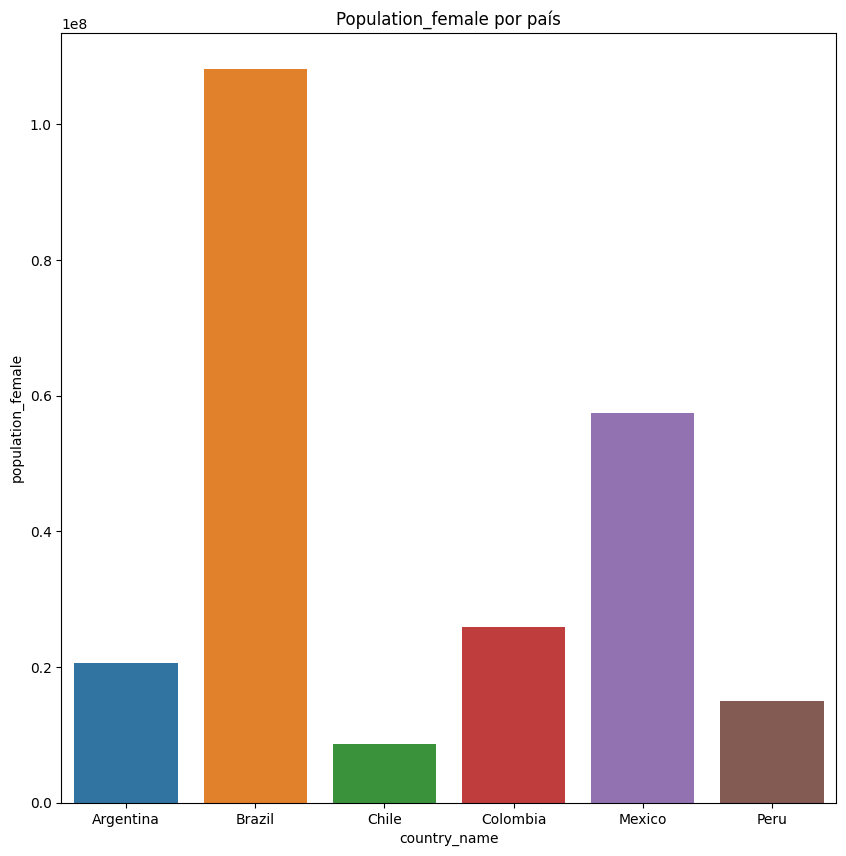

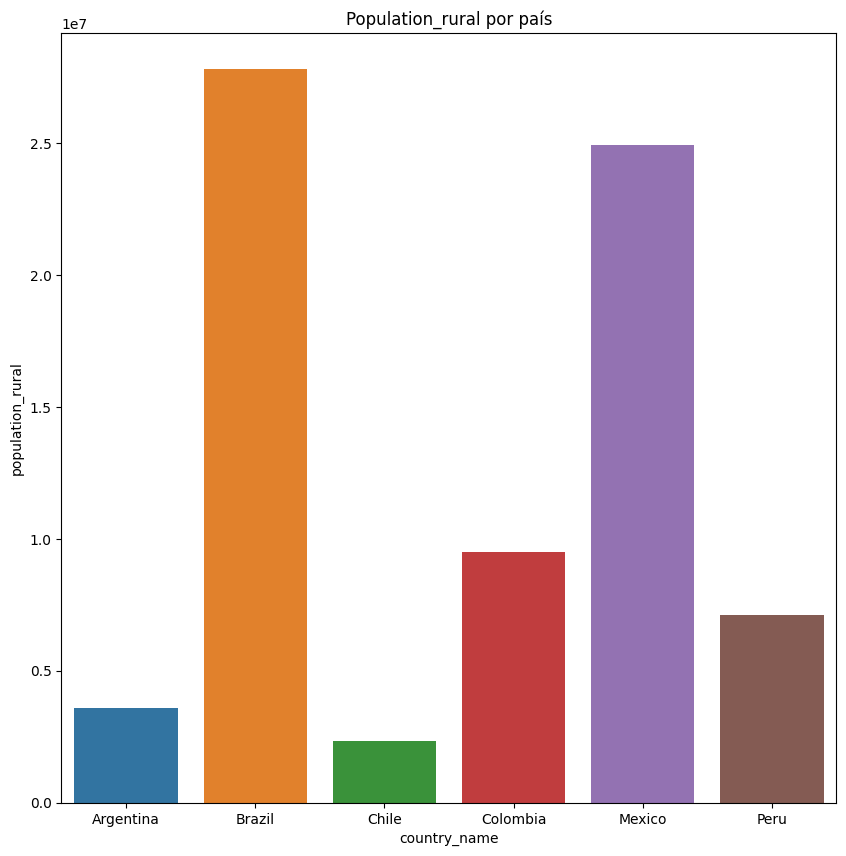

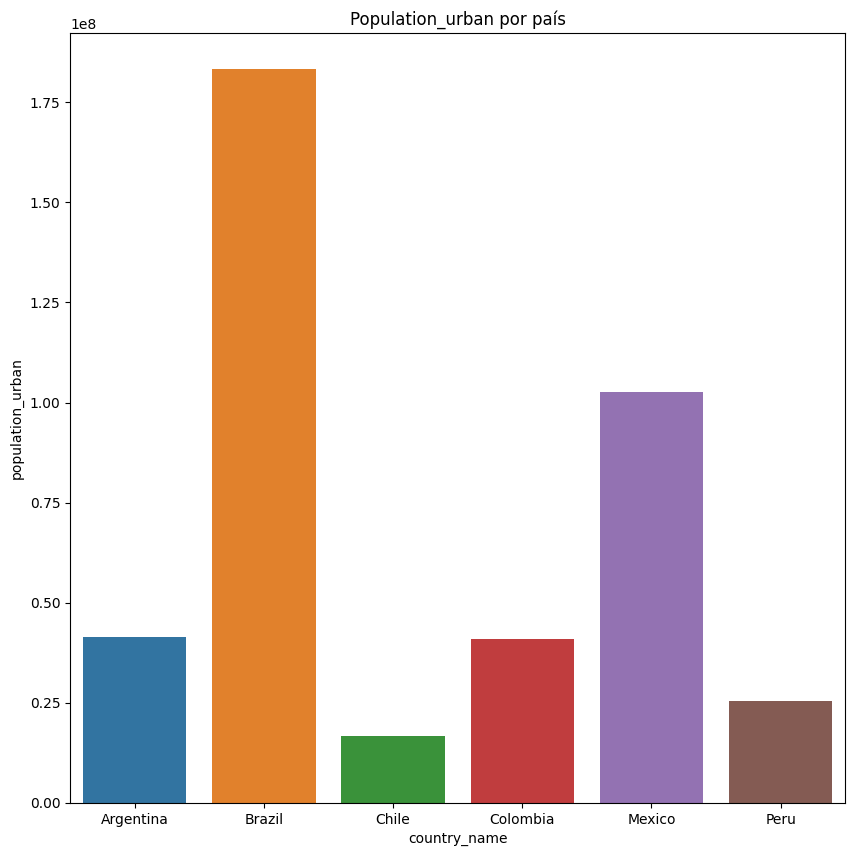

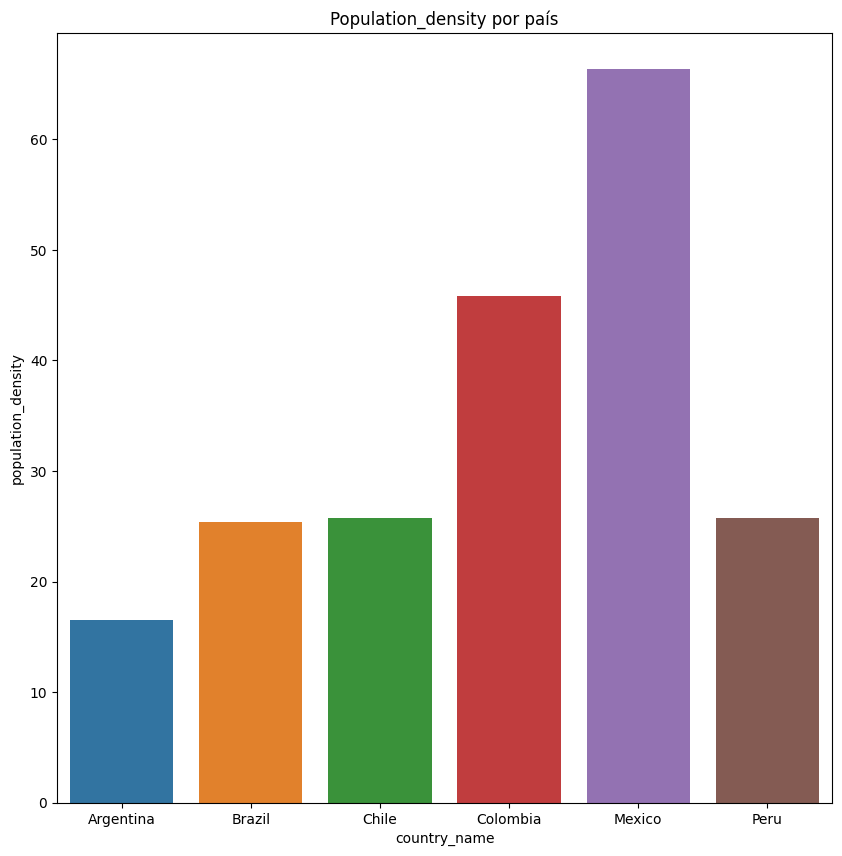

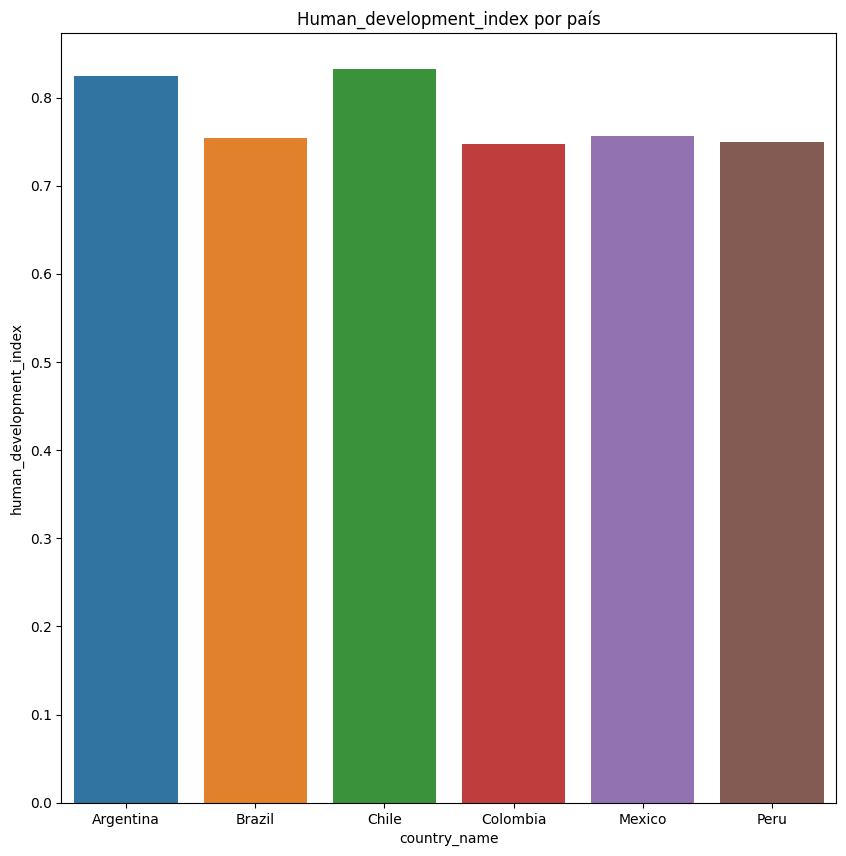

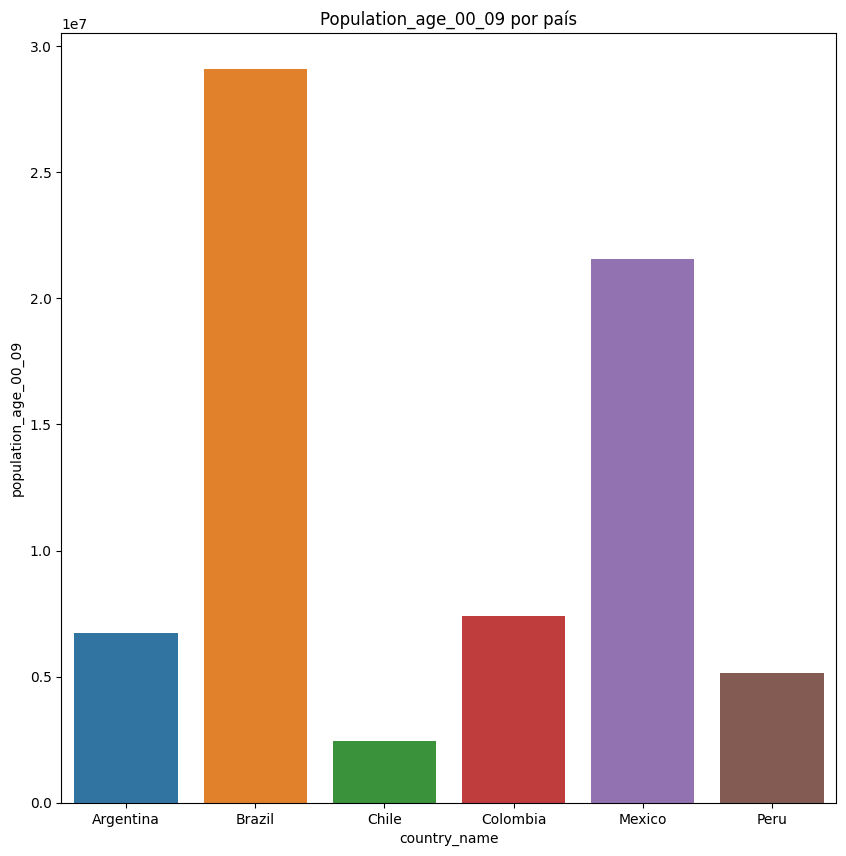

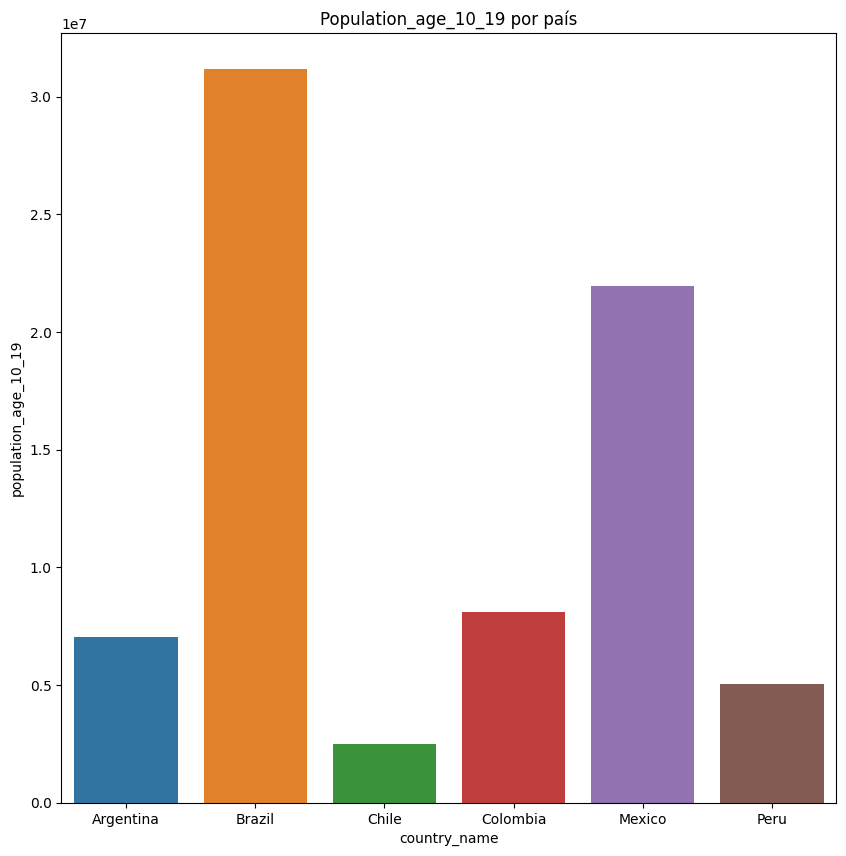

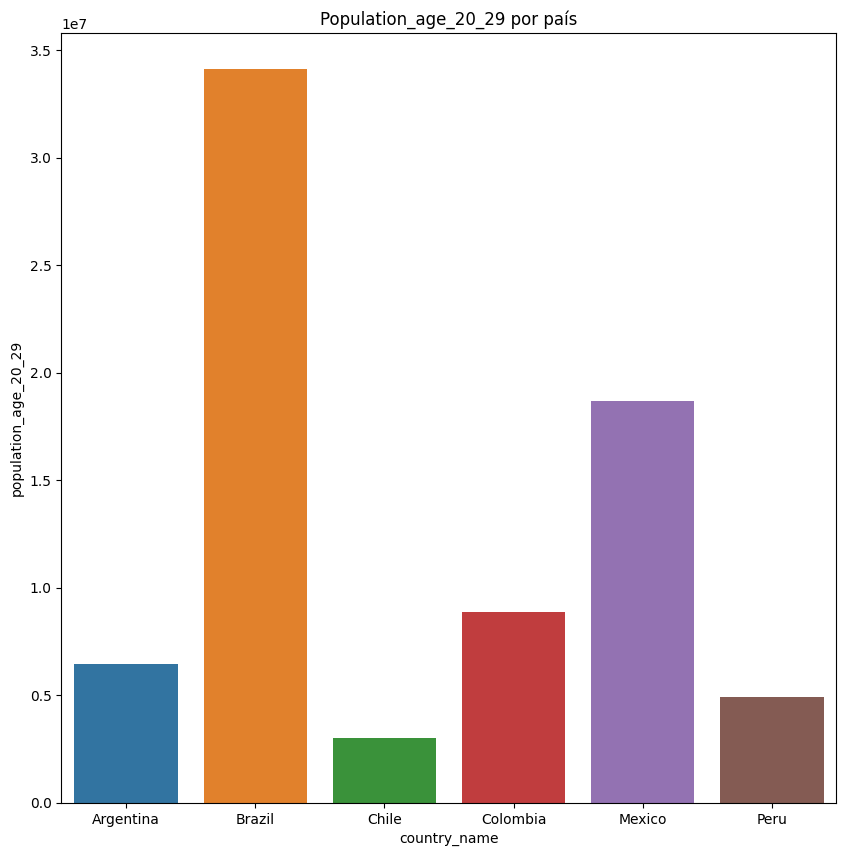

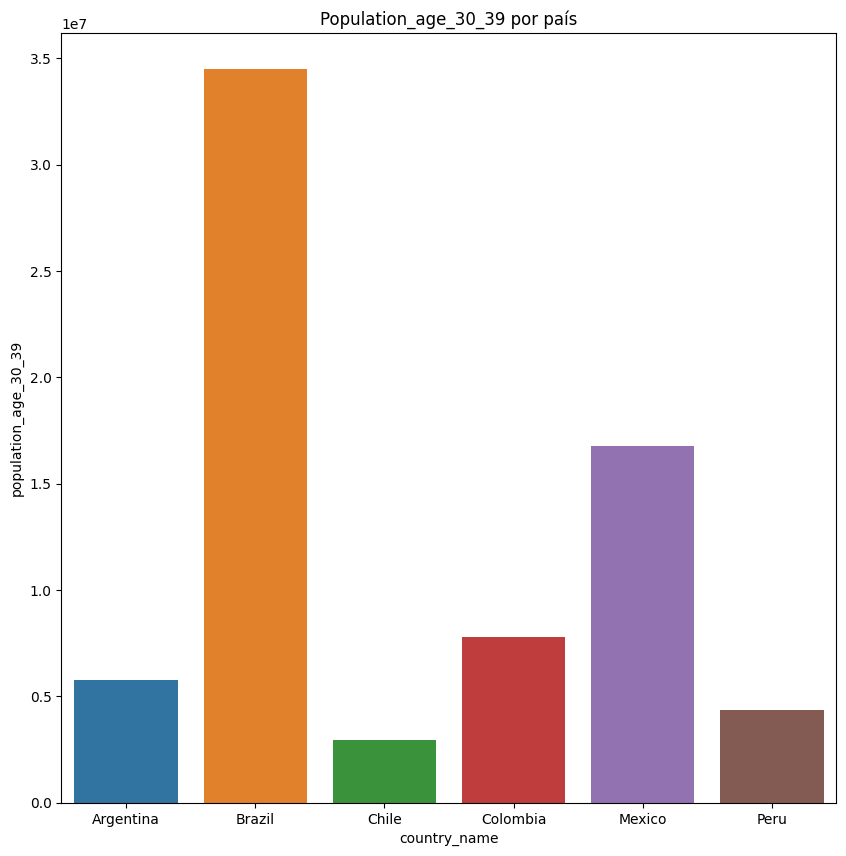

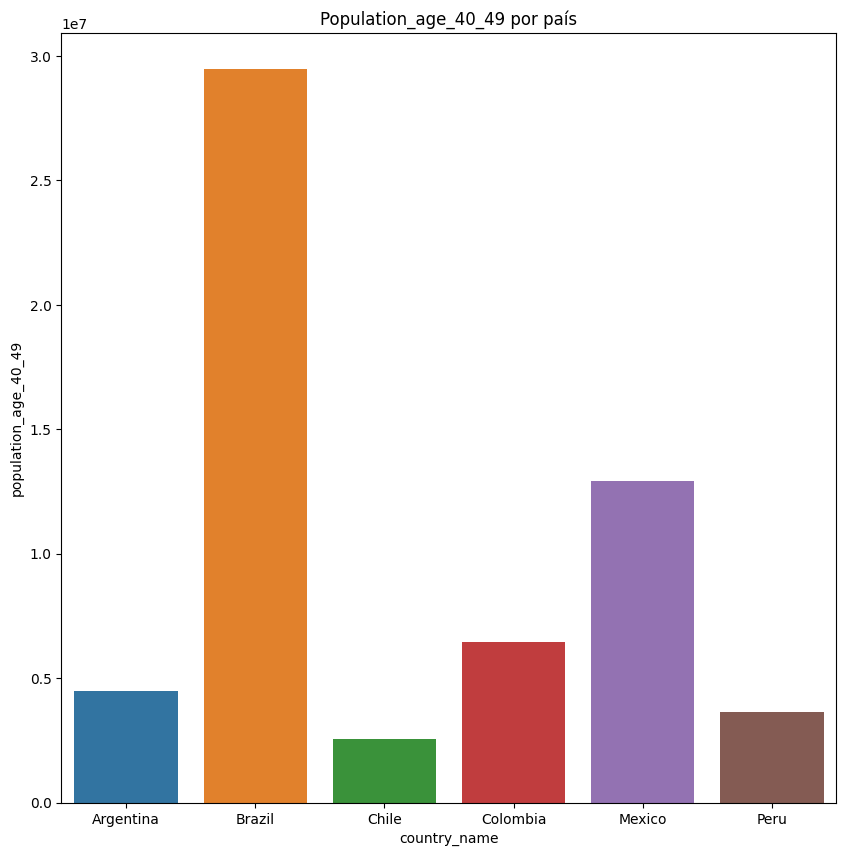

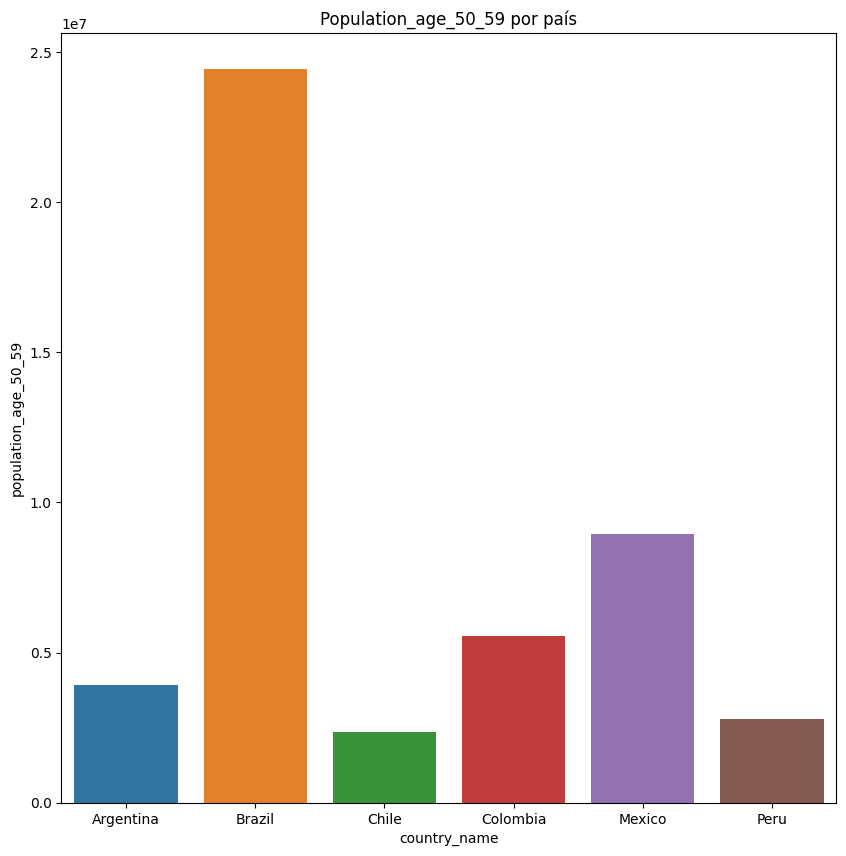

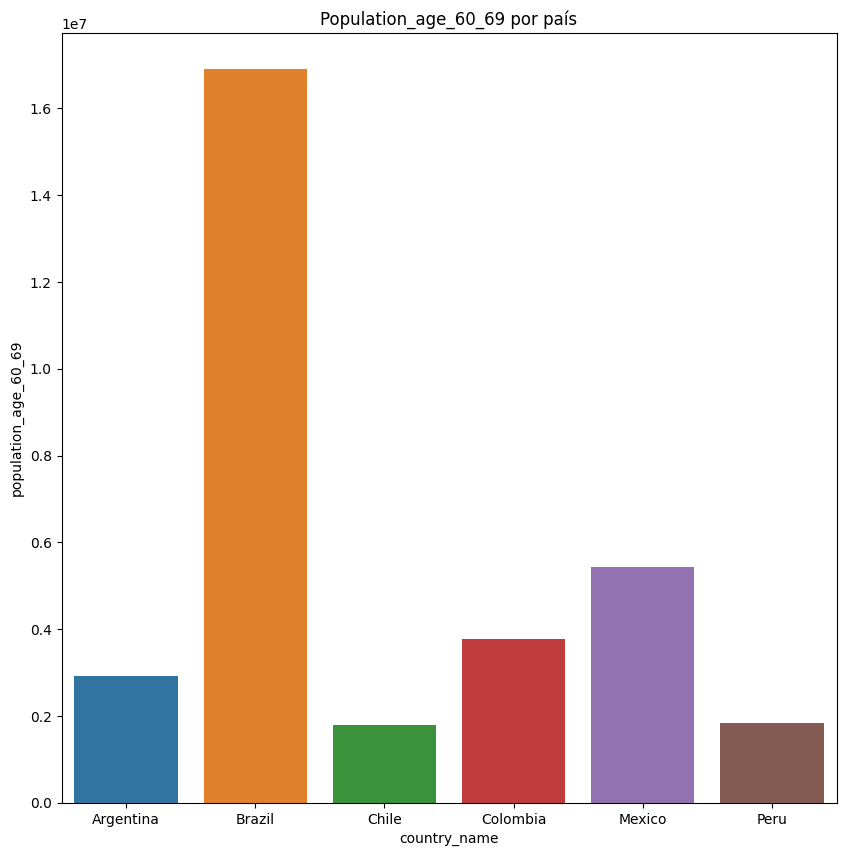

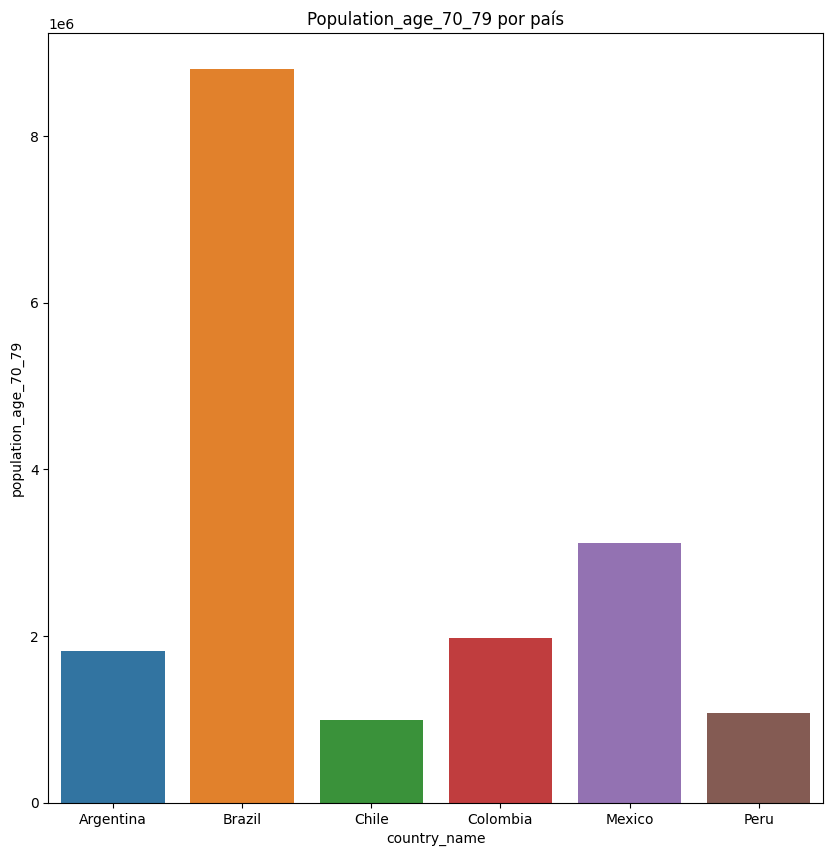

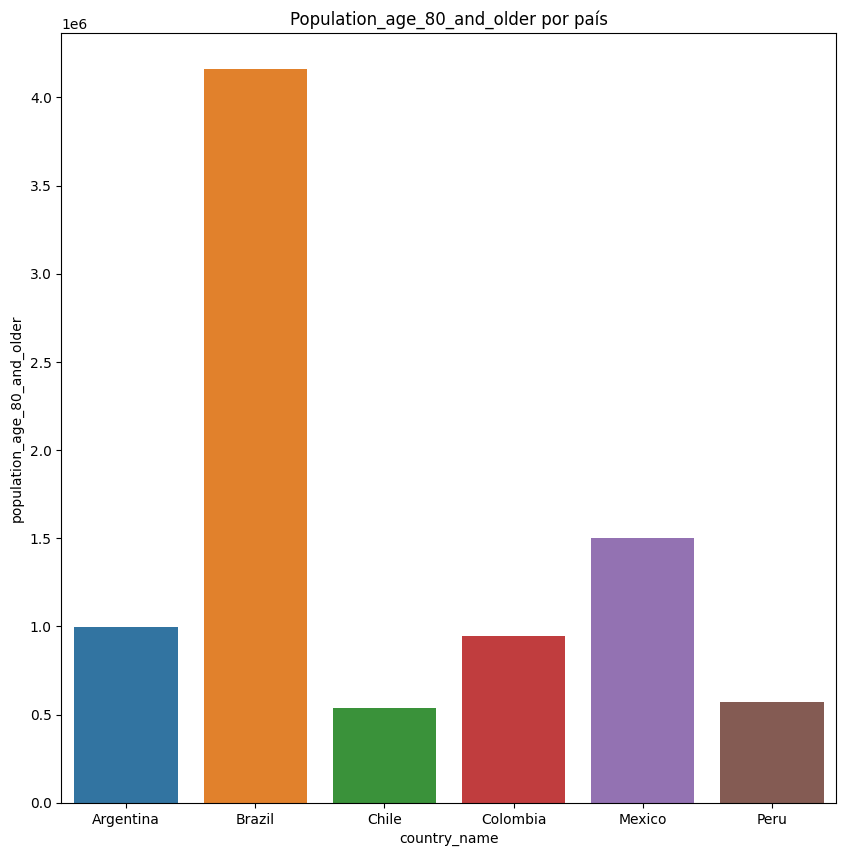

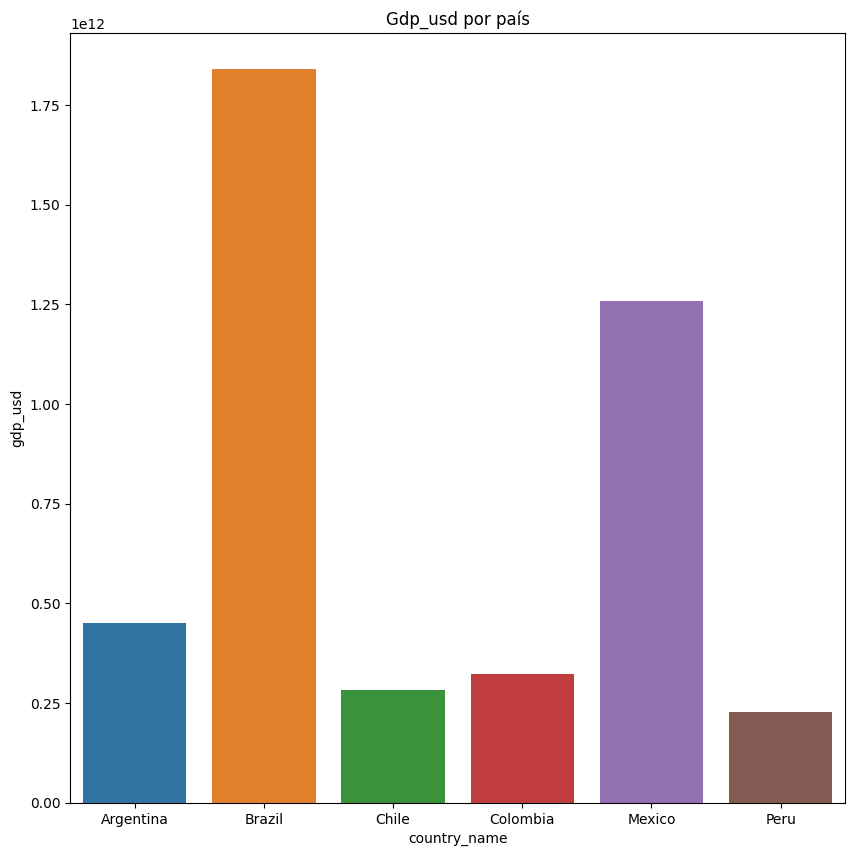

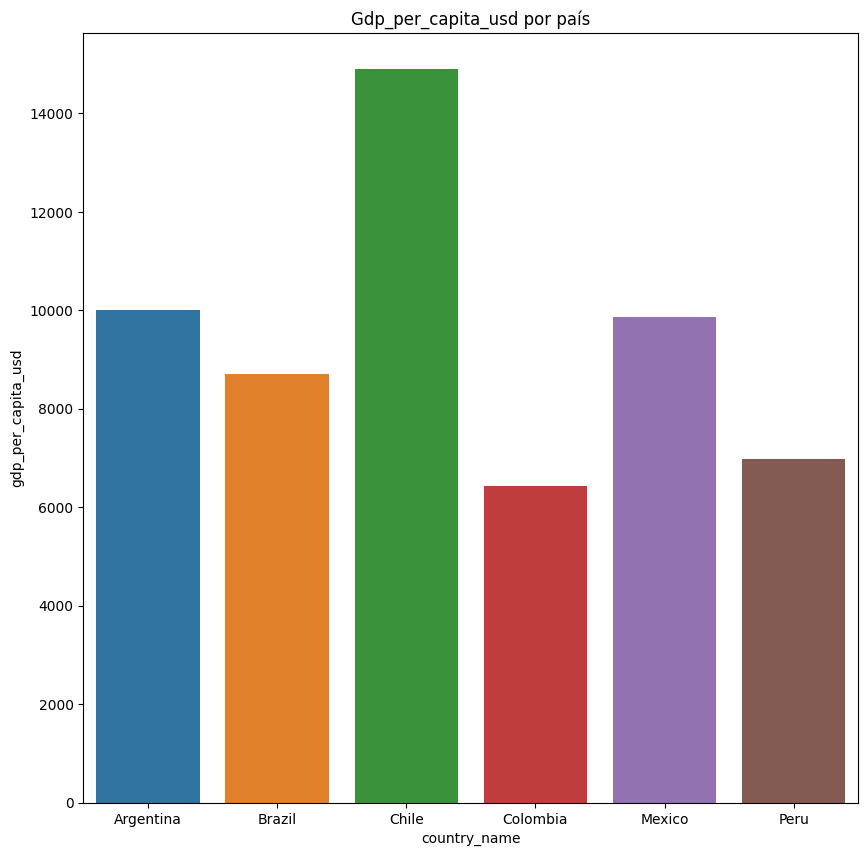

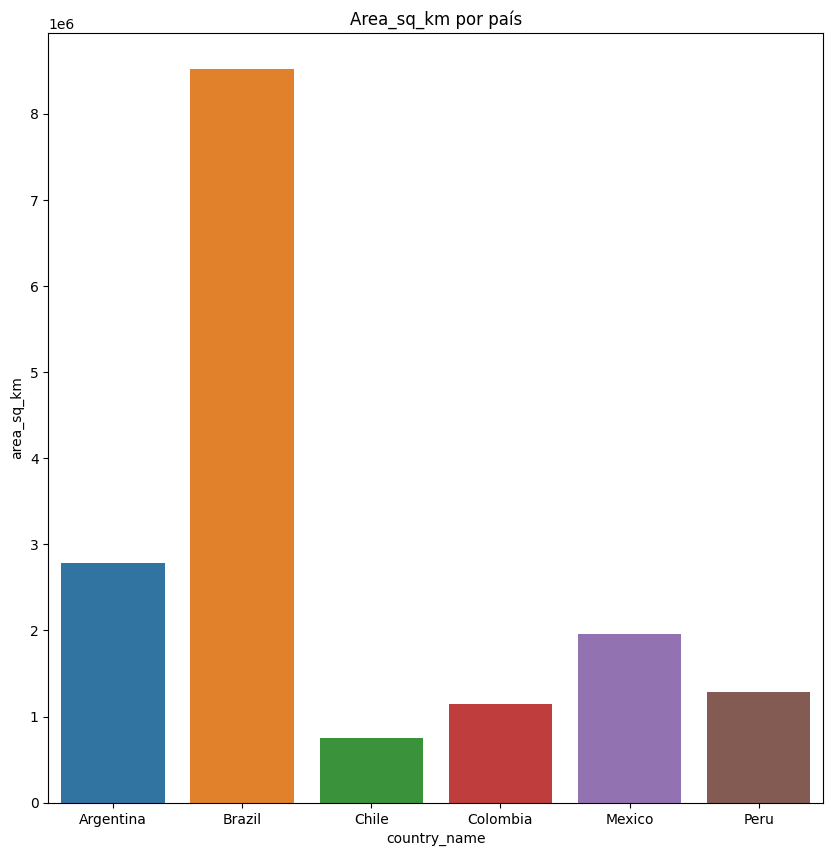

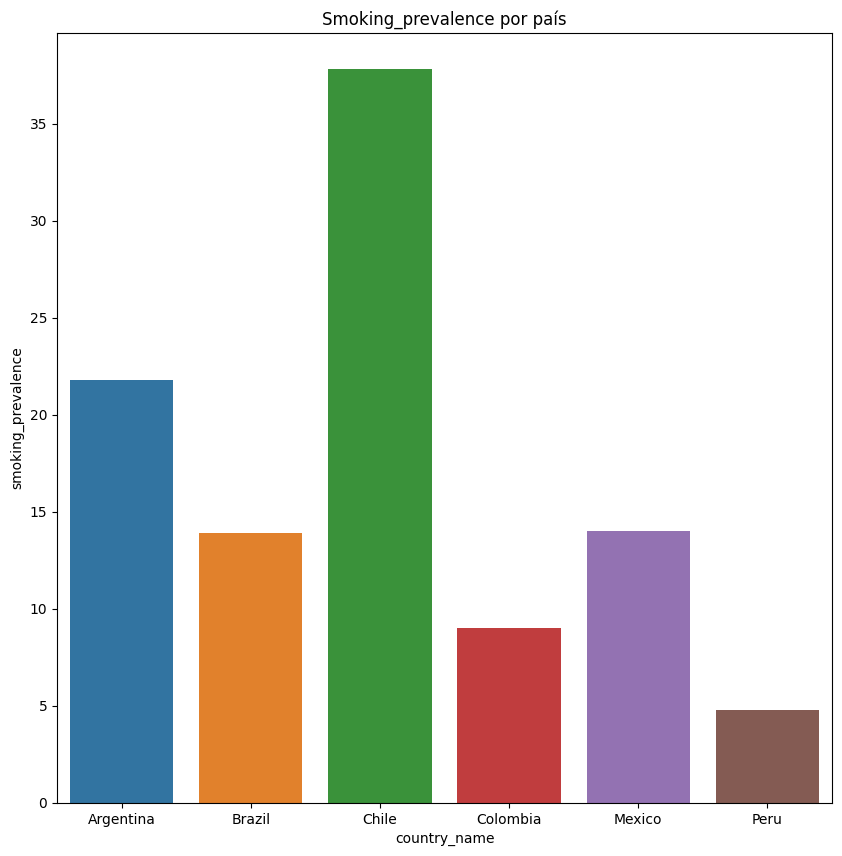

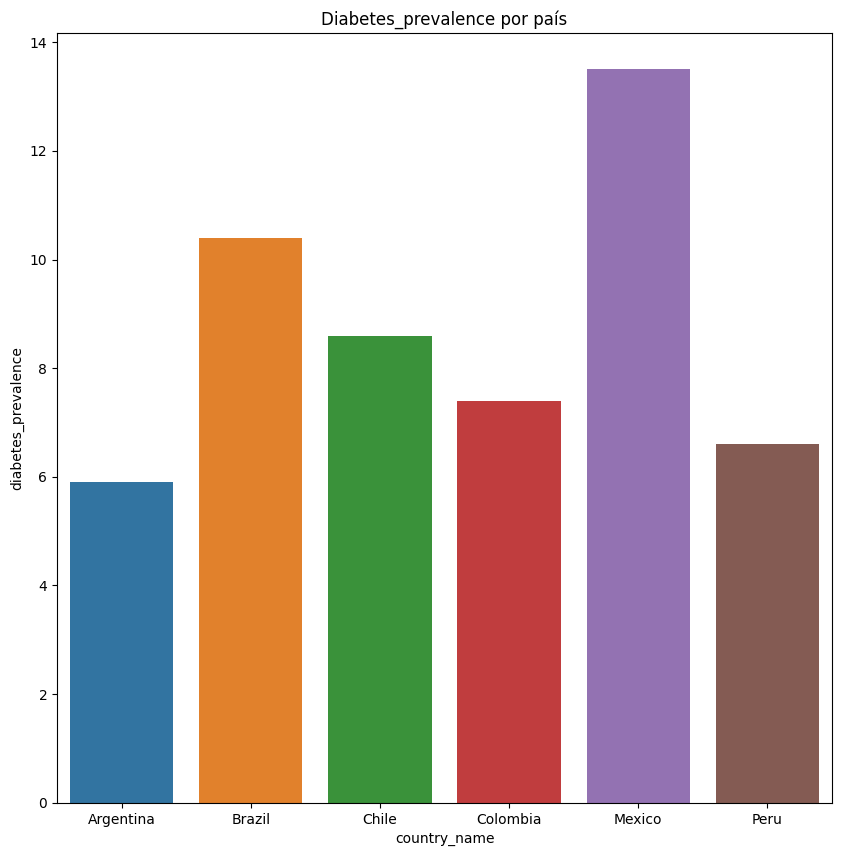

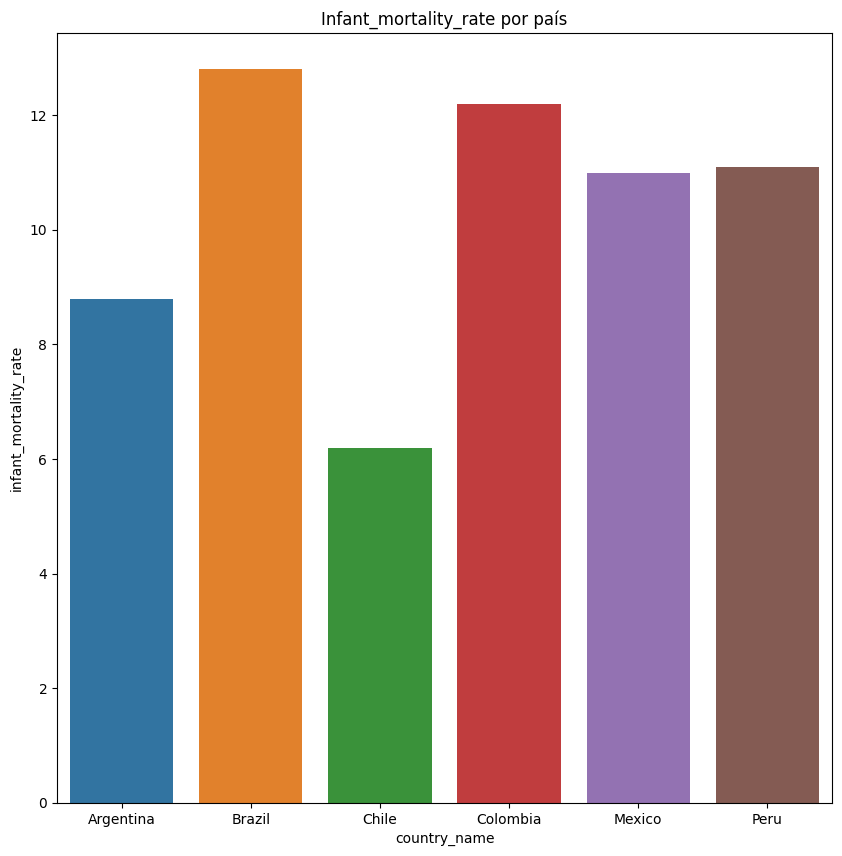

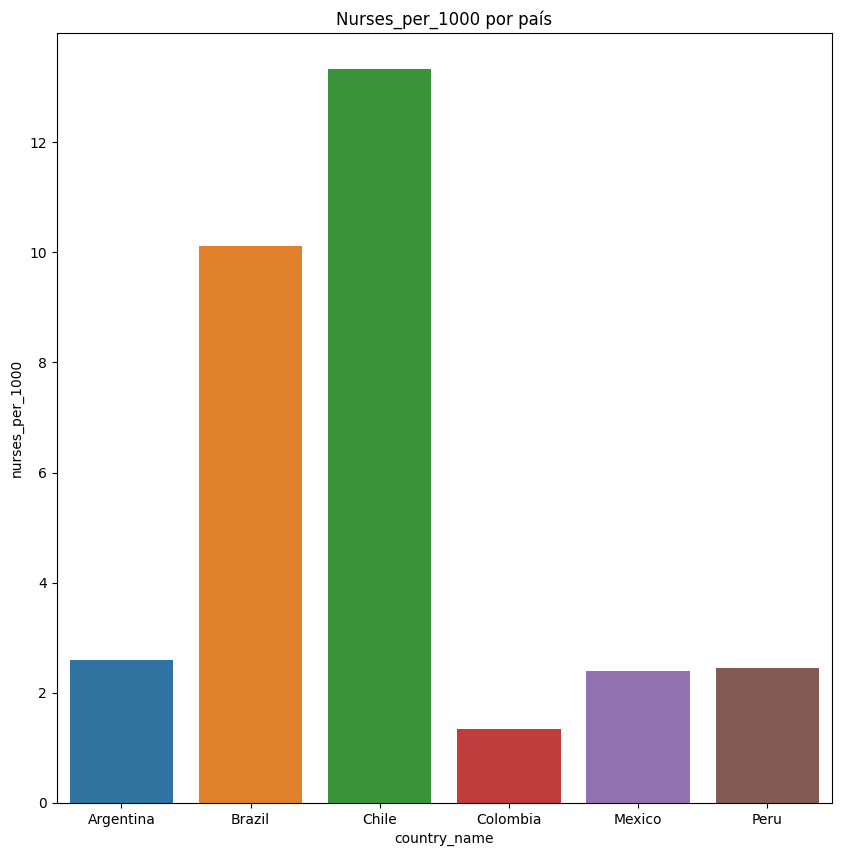

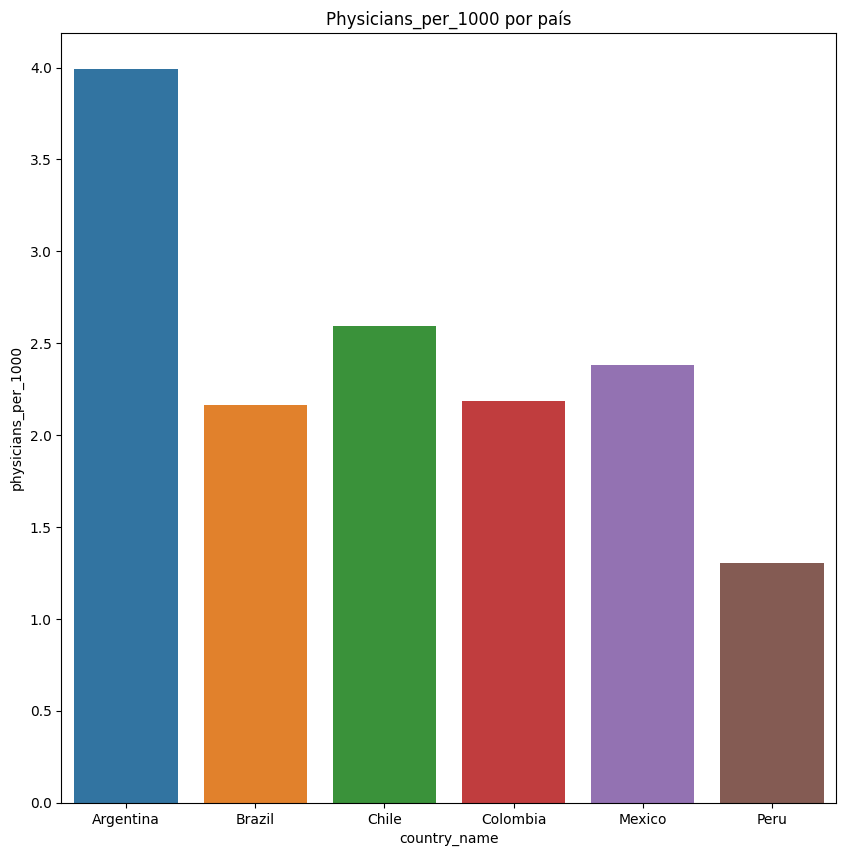

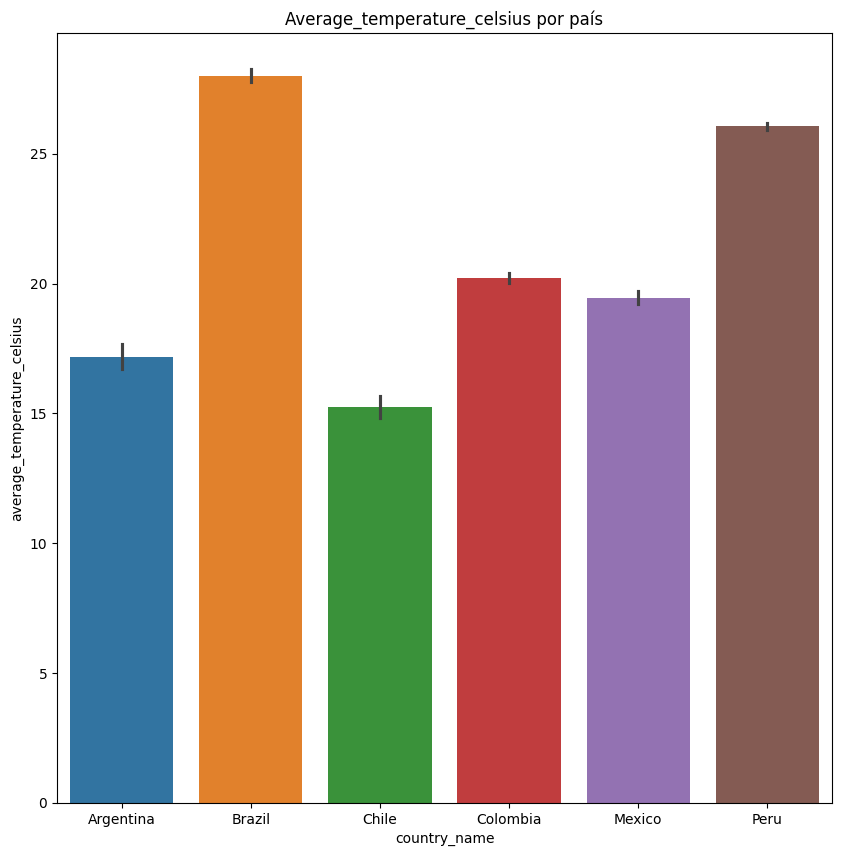

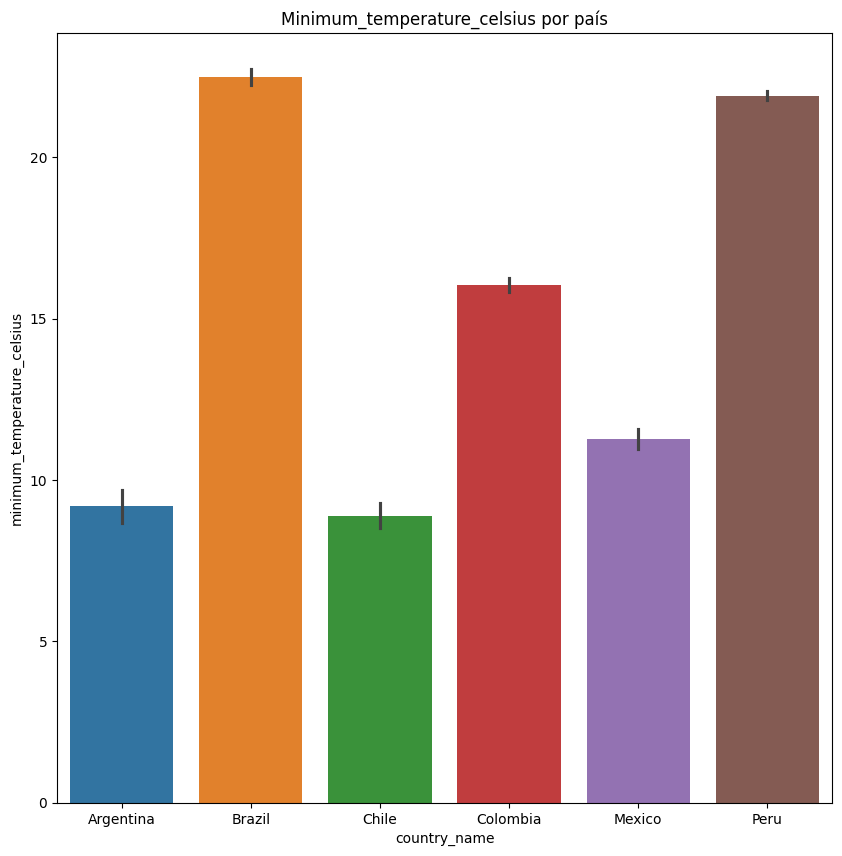

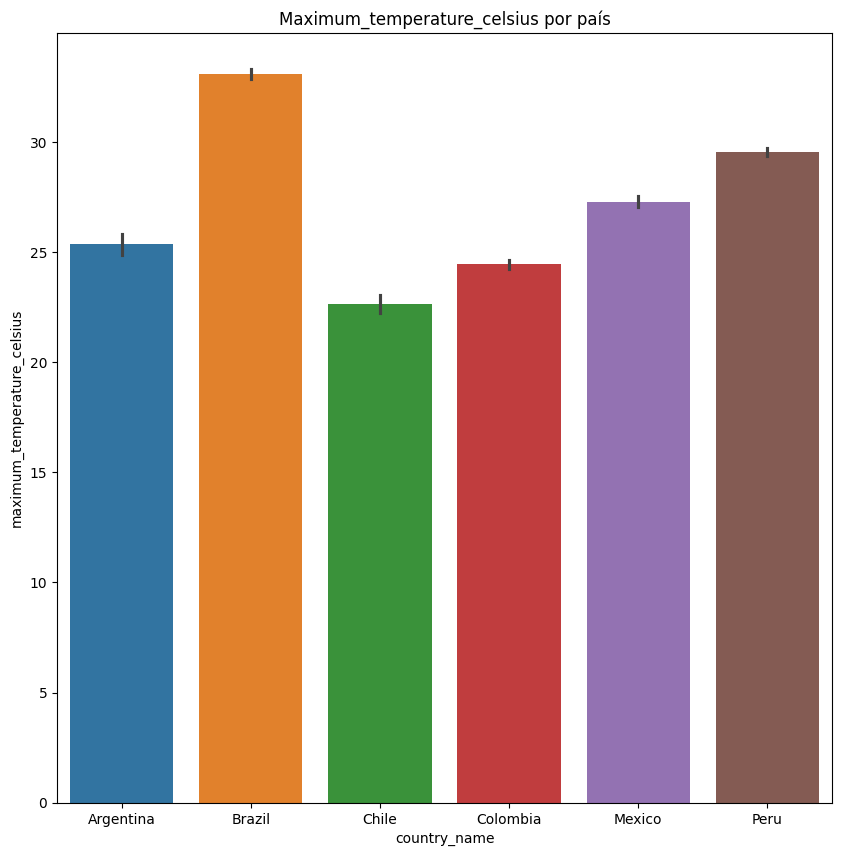

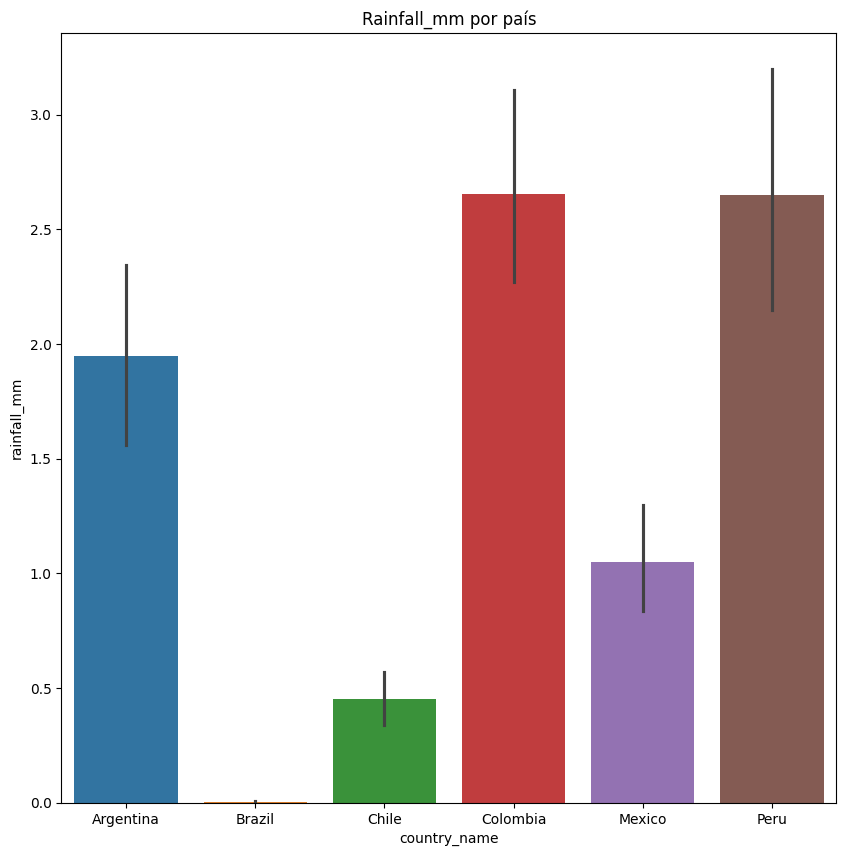

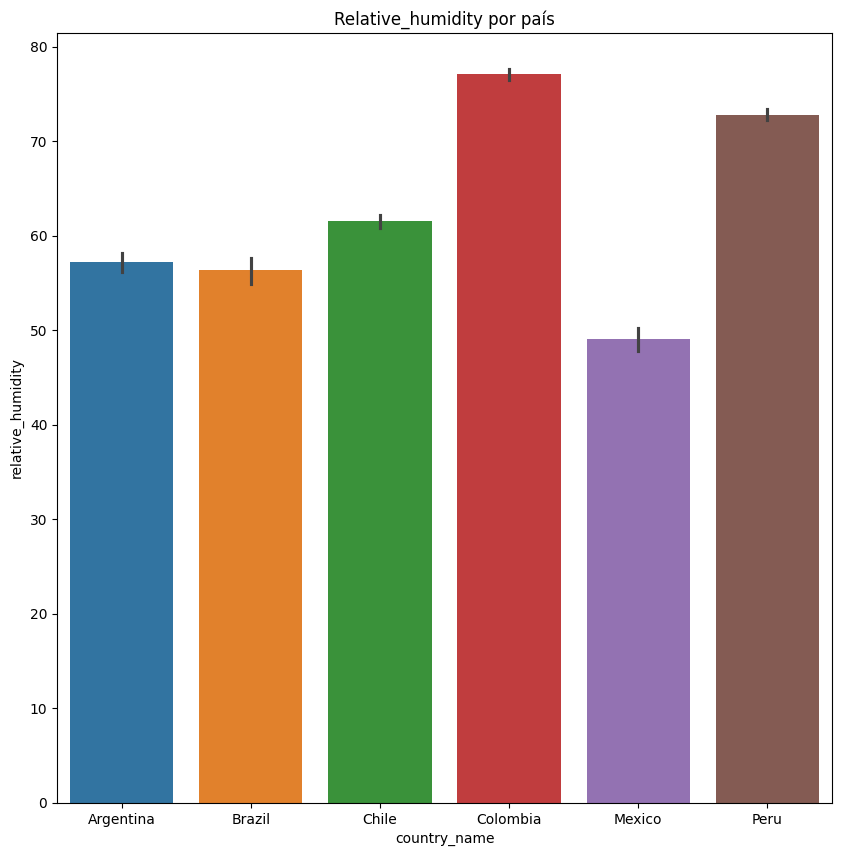

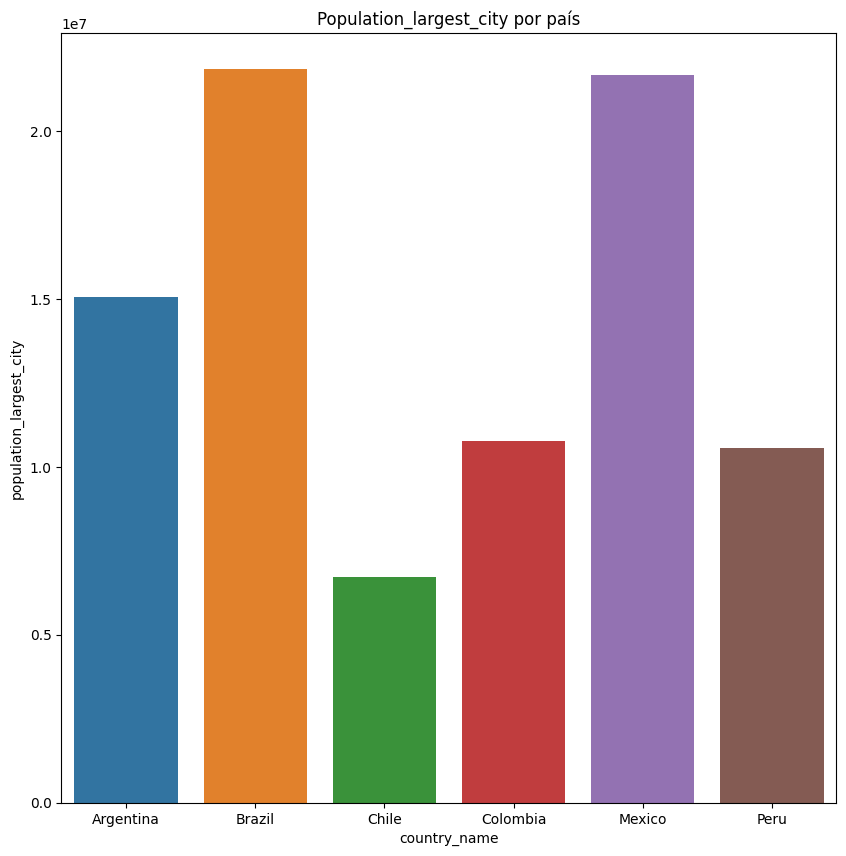

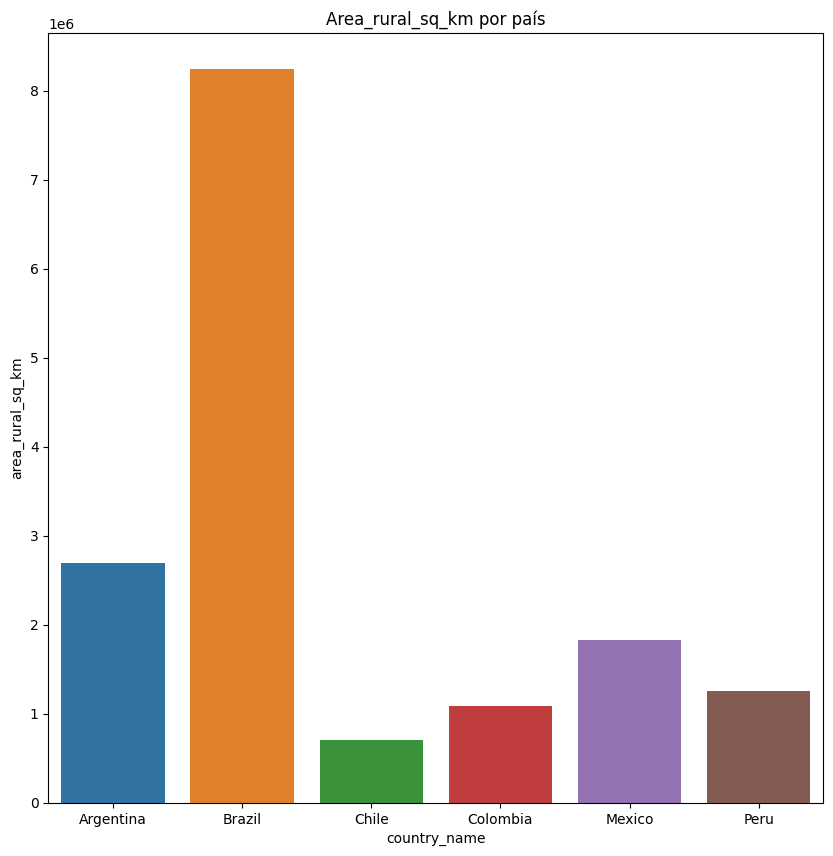

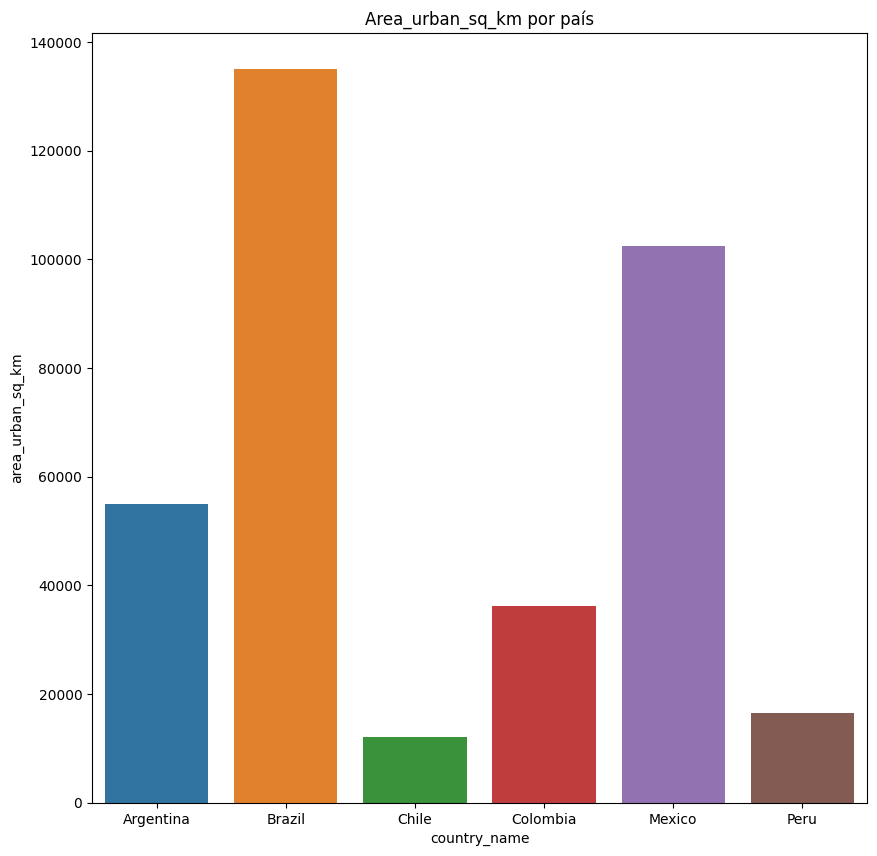

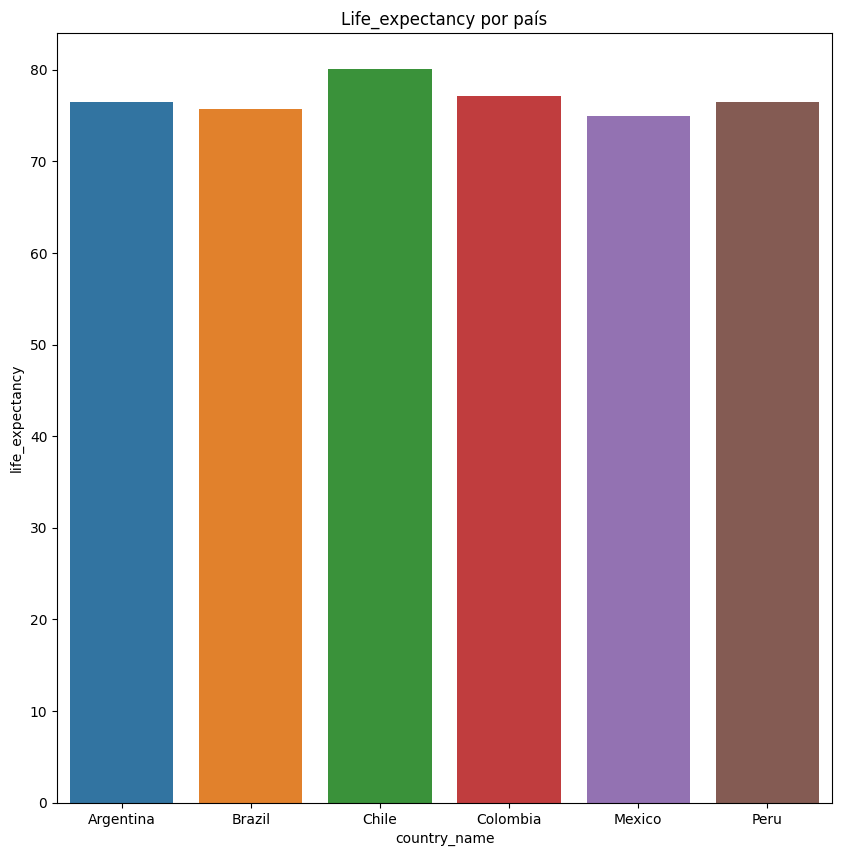

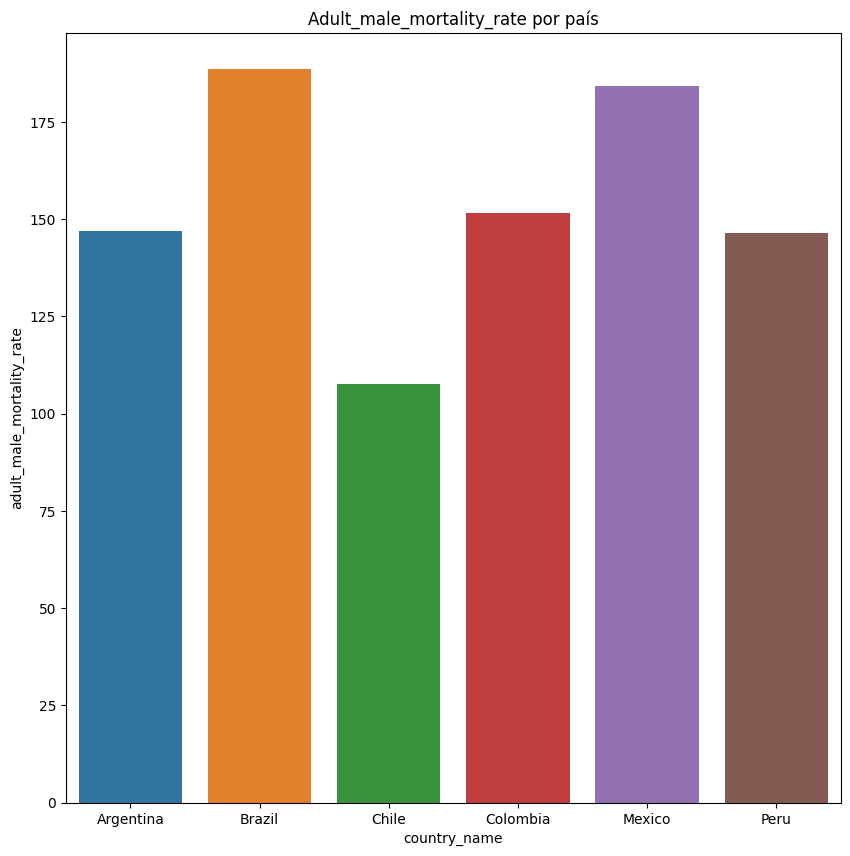

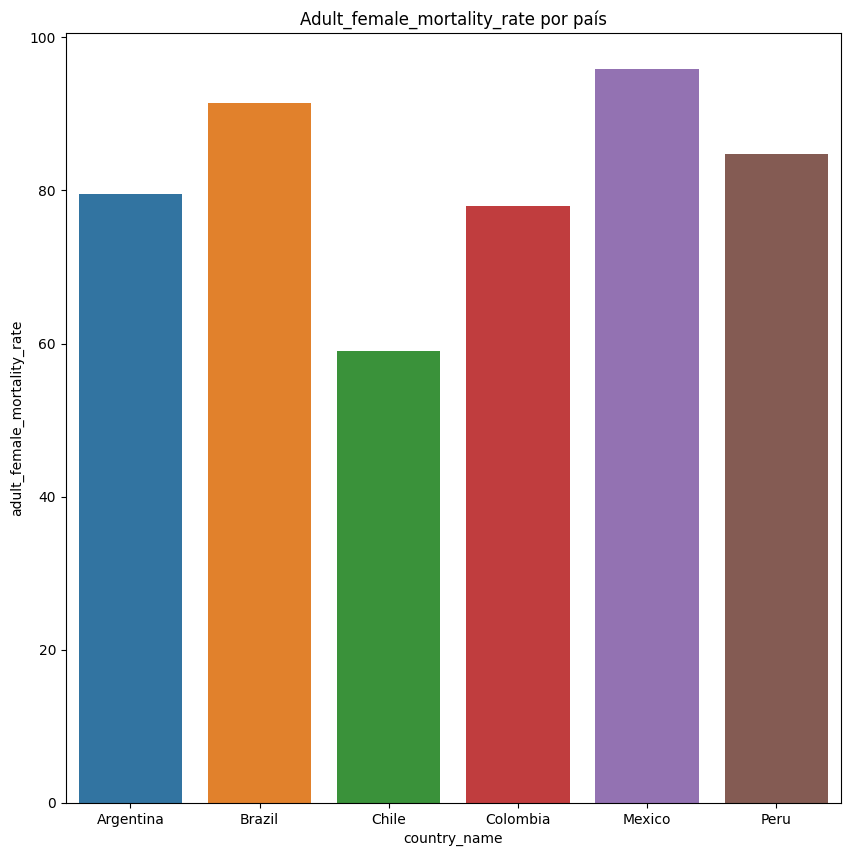

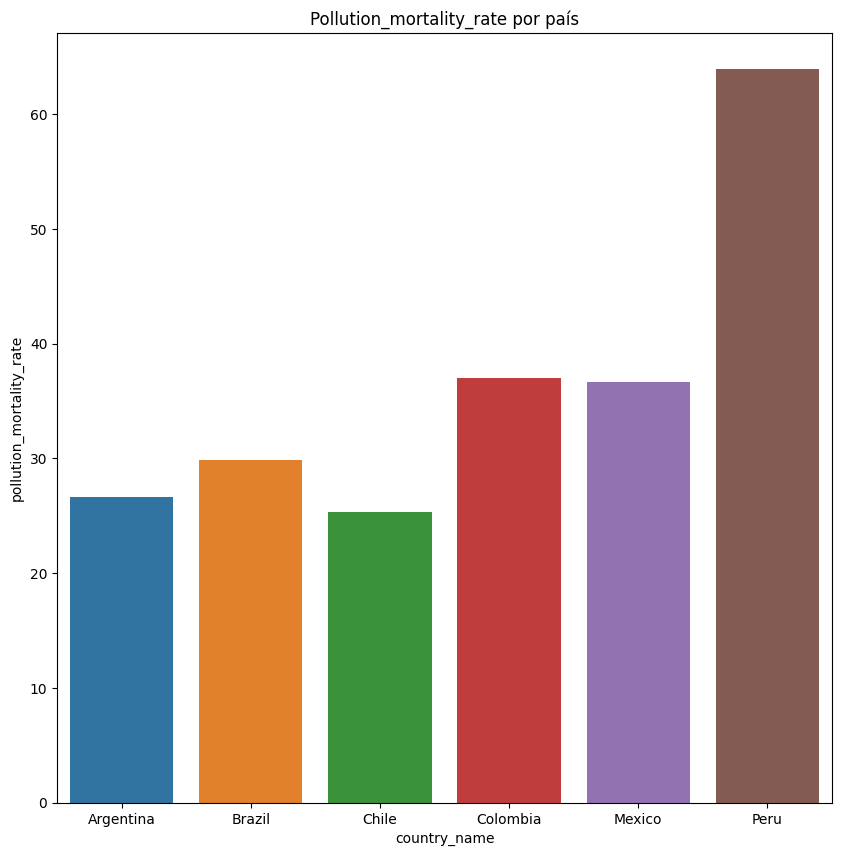

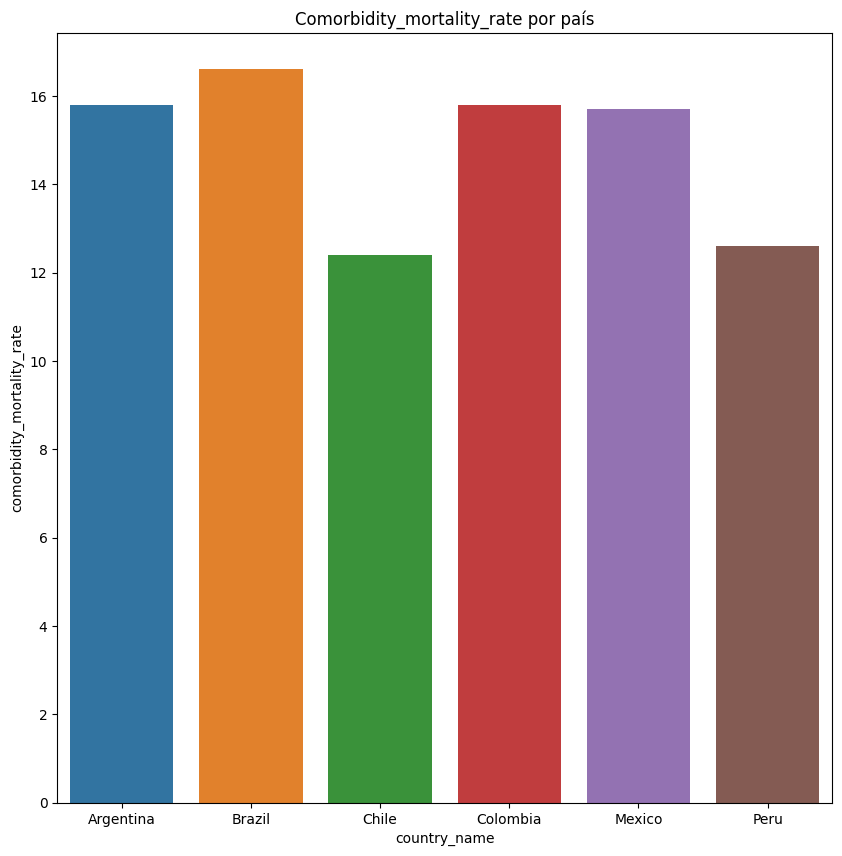

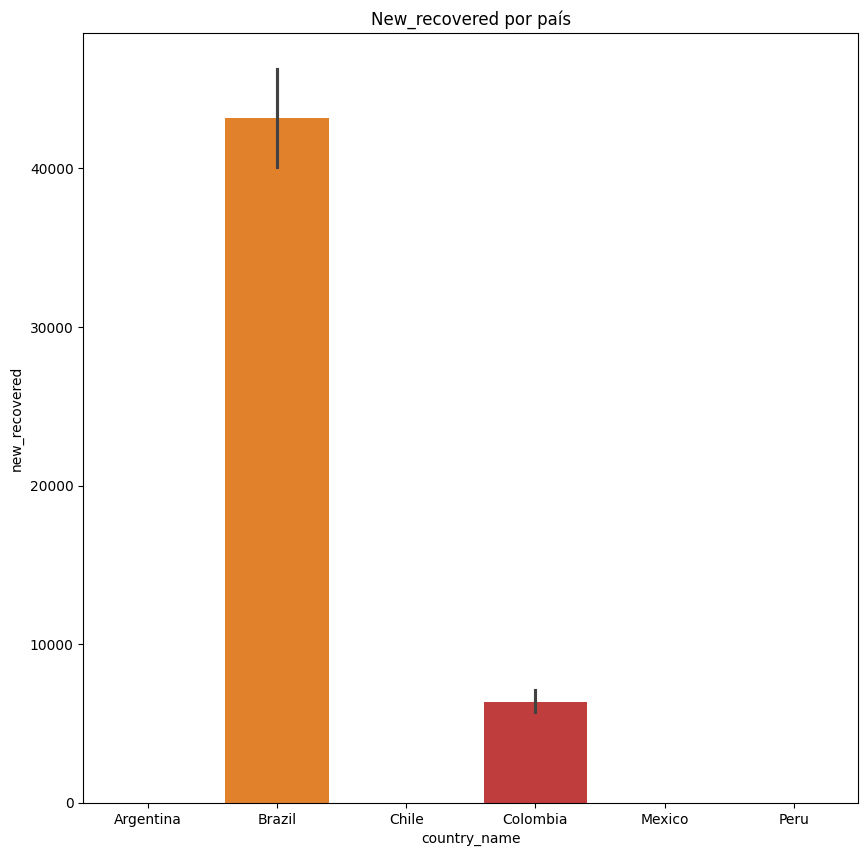

In [65]:
for i in data.columns:
    if i not in columnas_filtrar:
        fig, ax = plt.subplots(figsize=(10, 10))
        sns.barplot(x='country_name', y=i, data=data, ax=ax, hue='country_name')
        plt.title(f'{i.capitalize()} por país')
        plt.show()

------------------------------------------------------------------------------------------------------------------------------------
**Gráfica de valor medio**

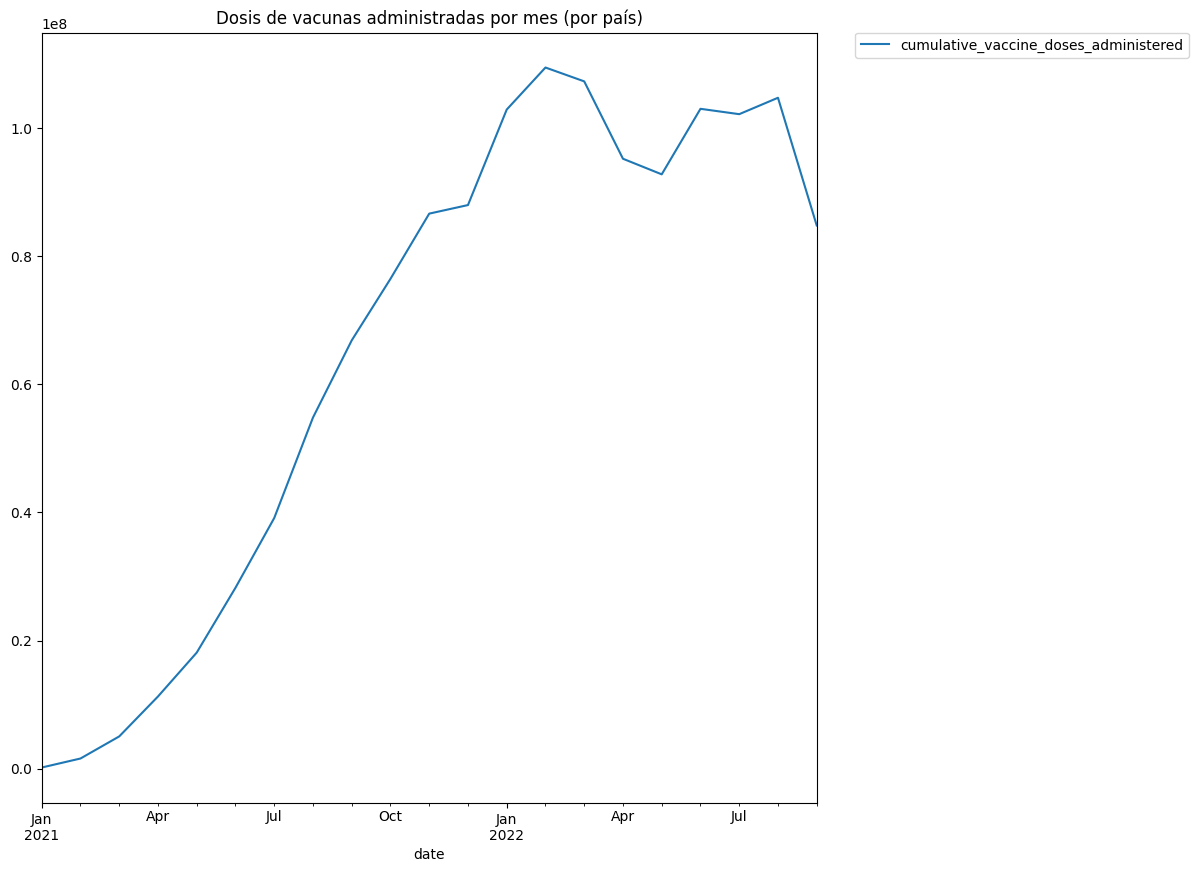

In [64]:
fig, ax = plt.subplots(figsize=(10,10))
data.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Dosis de vacunas administradas por mes (por país)')
plt.show()

In [ ]:
data['date'] = pd.to_datetime(data['date'], format = 'mixed')
data = data.set_index(data['date'])

Se aplica el formato fecha a la columnas "date" y también se la convierte en índice del dataframe

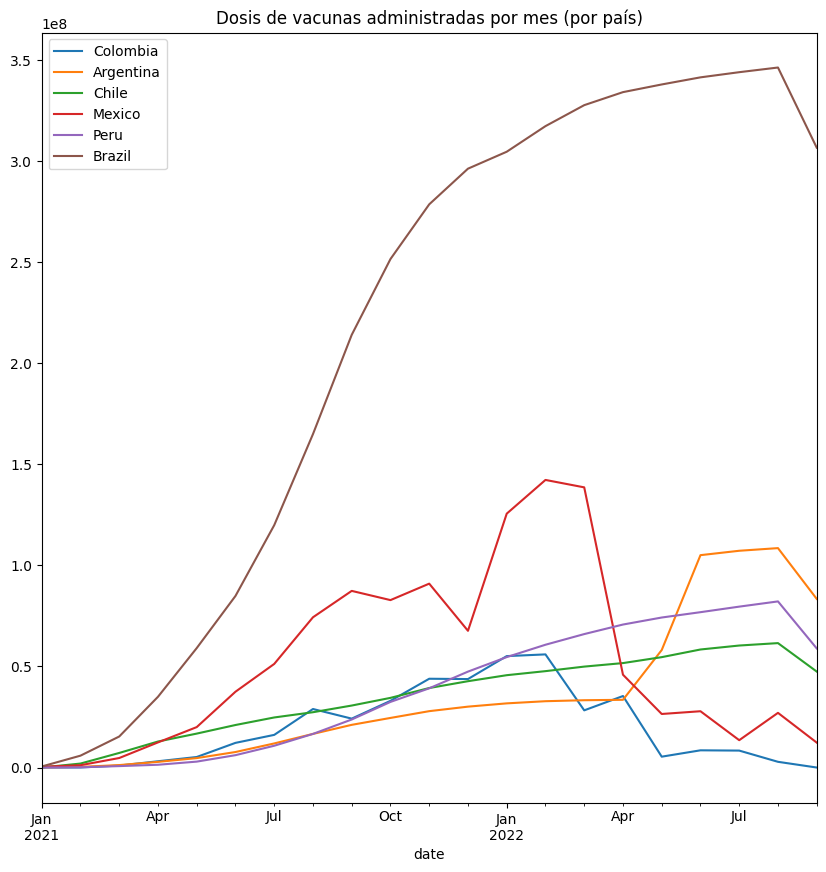

In [63]:
paisesExpansion = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil']
fig, ax = plt.subplots(figsize=(10,10))
for pais in paisesExpansion:
    data[data['country_name'] == pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(paisesExpansion)
plt.title('Dosis de vacunas administradas por mes (por país)')
plt.show()

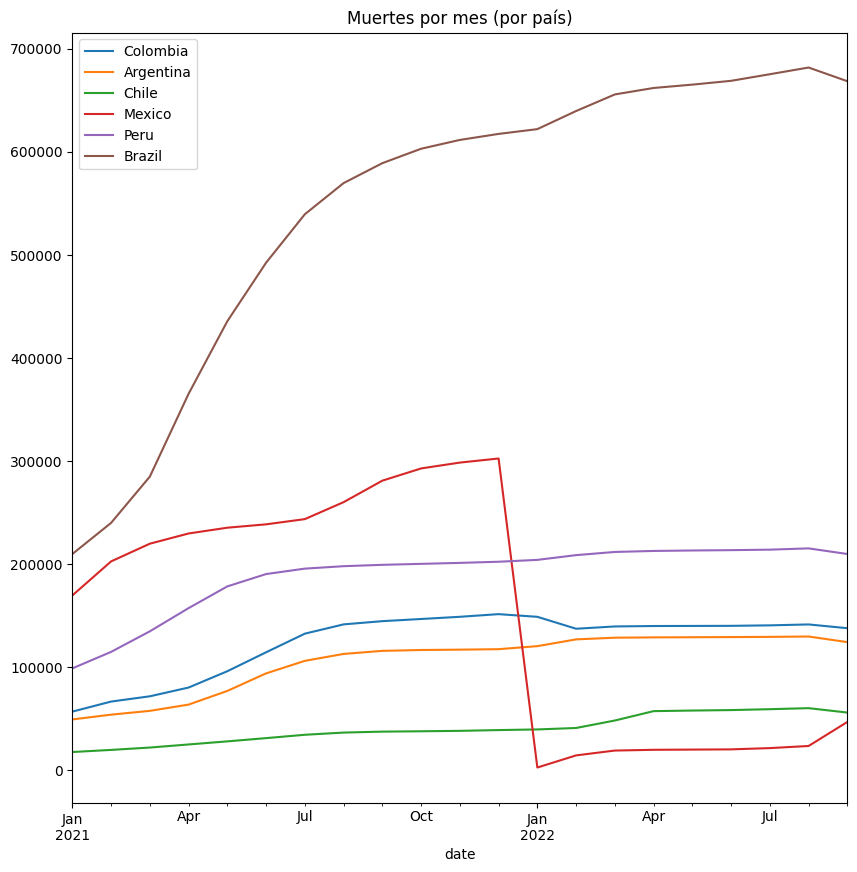

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
for pais in paisesExpansion:
    data[data['country_name'] == pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(paisesExpansion)
plt.title('Muertes por mes (por país)')
plt.show()

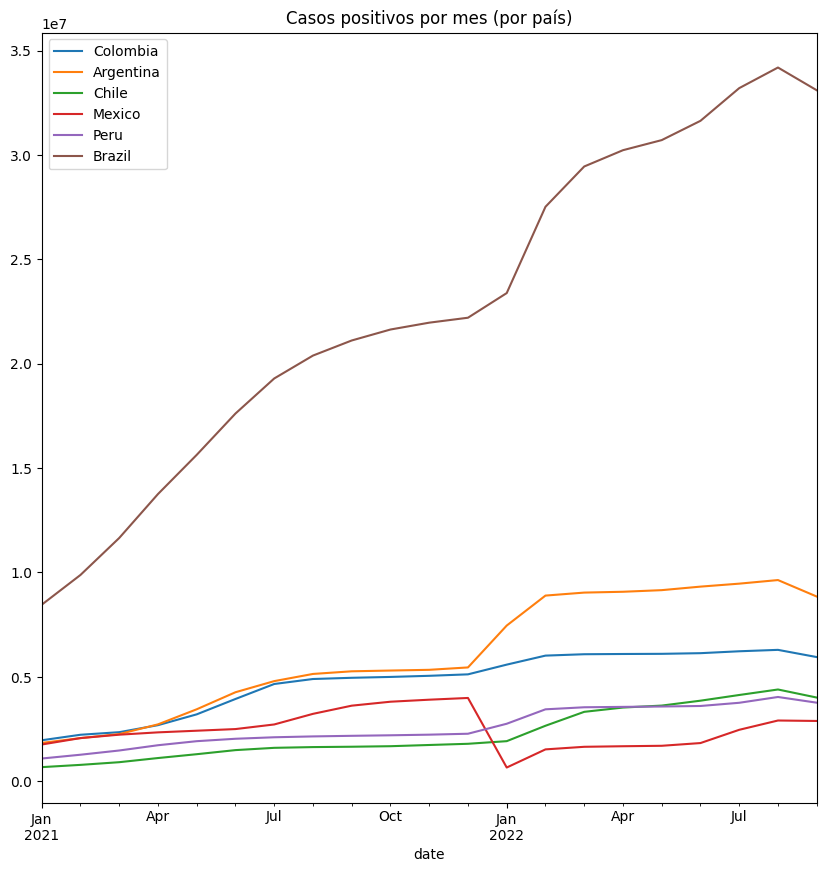

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
for pais in paisesExpansion:
    data[data['country_name'] == pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(paisesExpansion)
plt.title('Casos positivos por mes (por país)')
plt.show()

**DATO:** Se puede observar la diferencia de casos registrados entre países

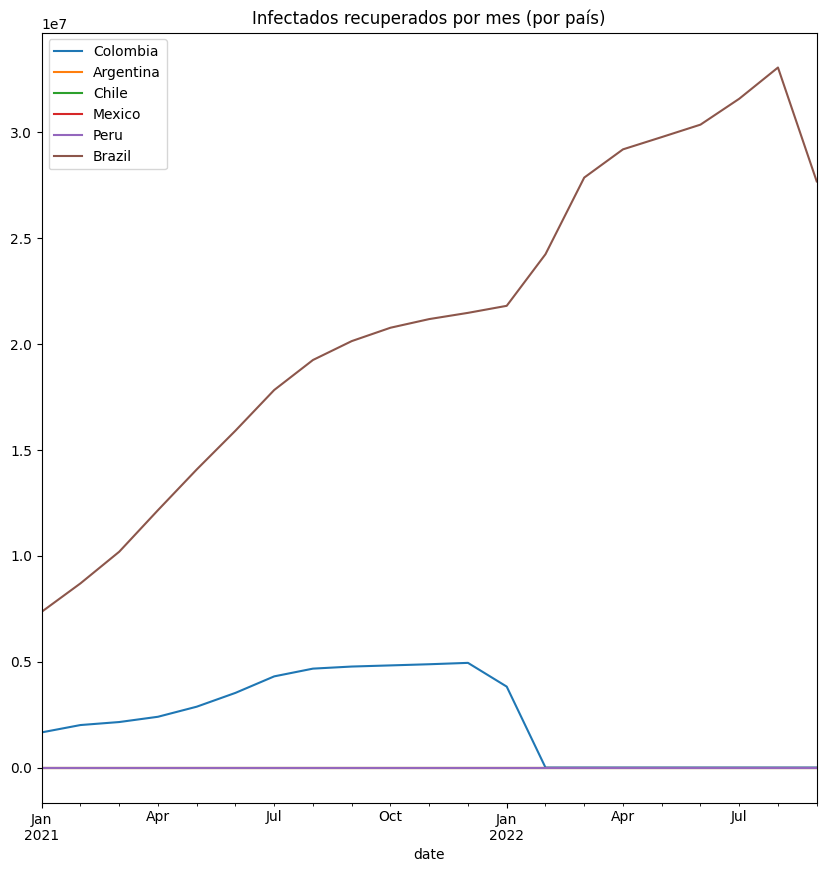

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
for pais in paisesExpansion:
    data[data['country_name'] == pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(paisesExpansion)
plt.title('Infectados recuperados por mes (por país)')
plt.show()

**DATO:** Se puede observar la diferencia de casos registrados entre países

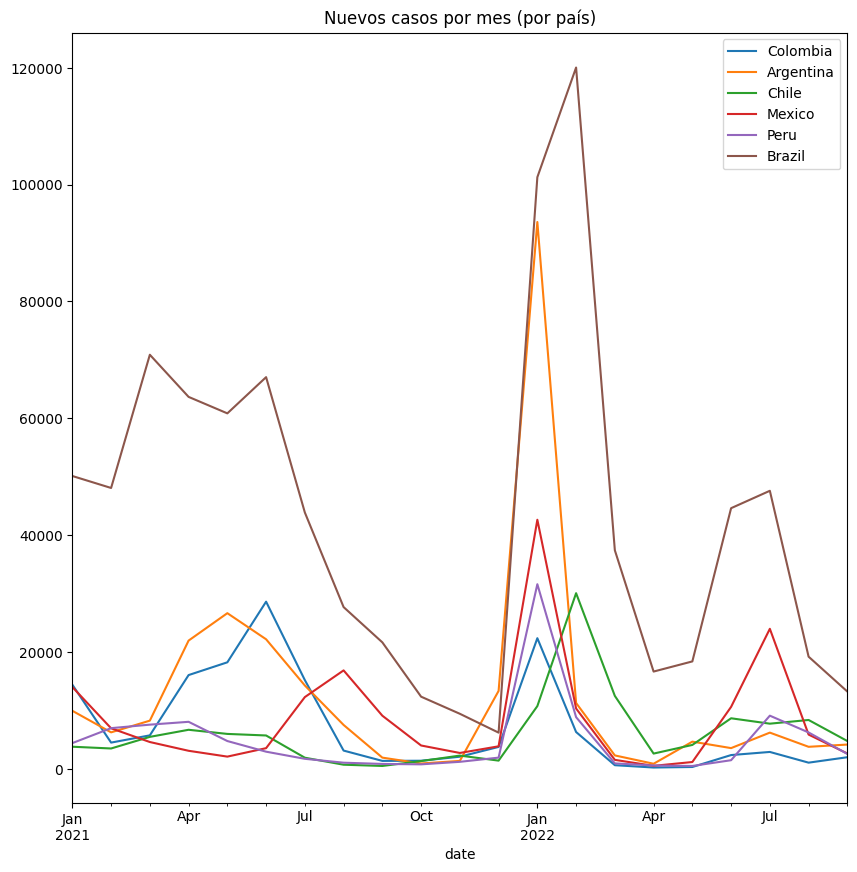

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
for pais in paisesExpansion:
    data[data['country_name'] == pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend(paisesExpansion)
plt.title('Nuevos casos por mes (por país)')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------
**Creación de gráfico para mostrar la densidad de distribución por país**

Text(0.5, 1.0, 'Distribución de dosis de vacuna (por país)')

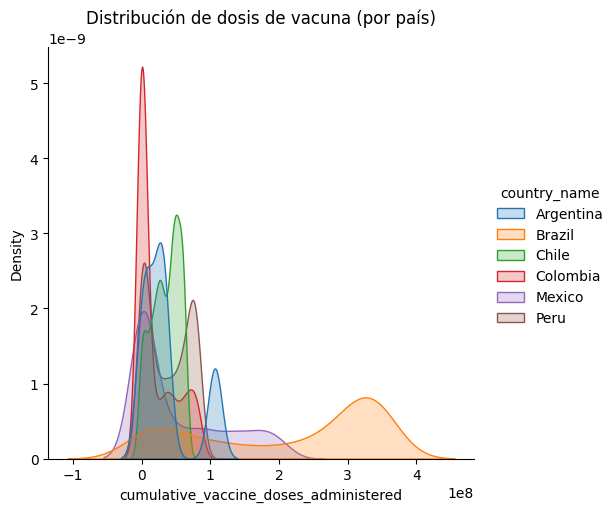

In [59]:
sns.displot(data, x='cumulative_vaccine_doses_administered', hue='country_name', kind='kde', fill=True)
plt.title('Distribución de dosis de vacuna (por país)')

------------------------------------------------------------------------------------------------------------------------------------
**Creación de Gráficos Boxplot**

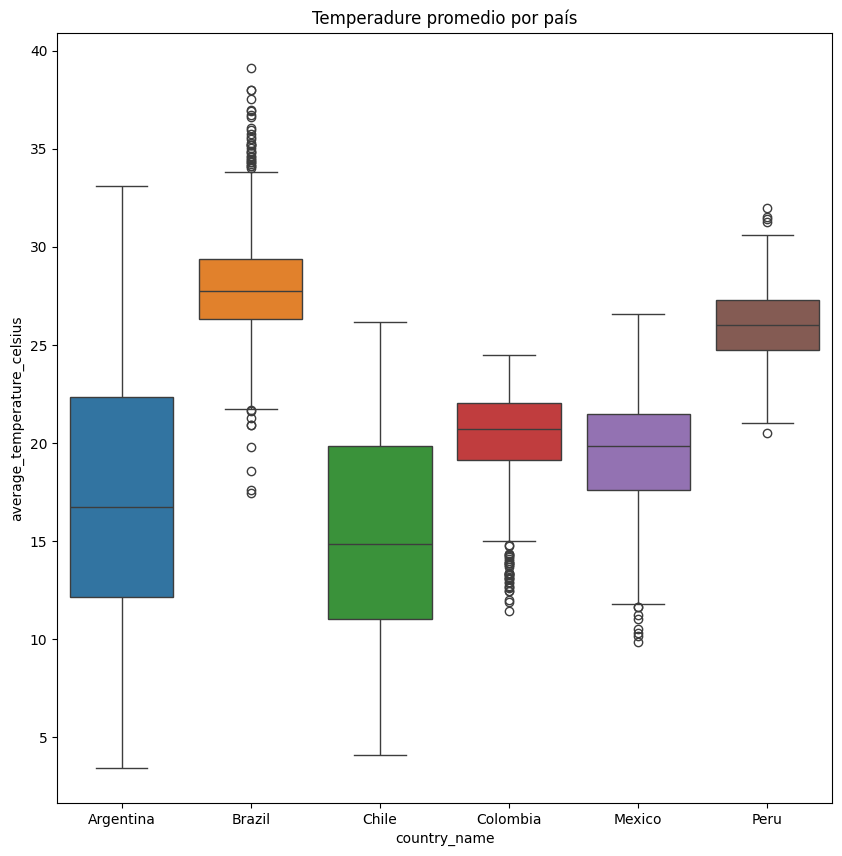

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data, hue='country_name')
plt.title('Temperadure promedio por país')
plt.show() 

------------------------------------------------------------------------------------------------------------------------------------
**Creación de Gráficos Violinplot**

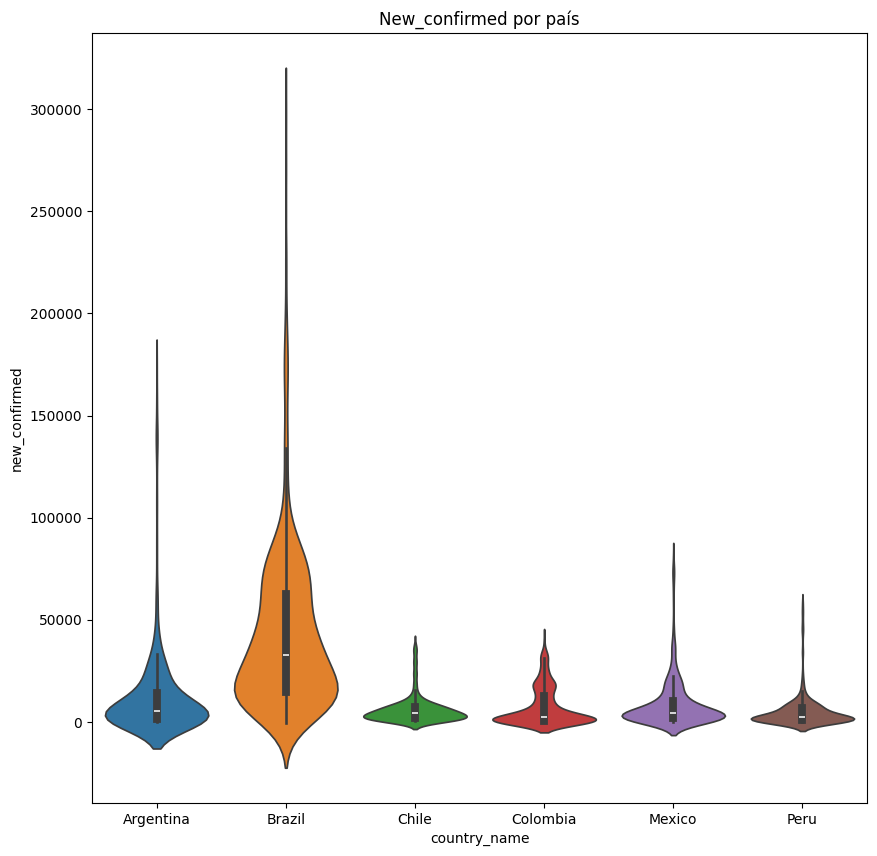

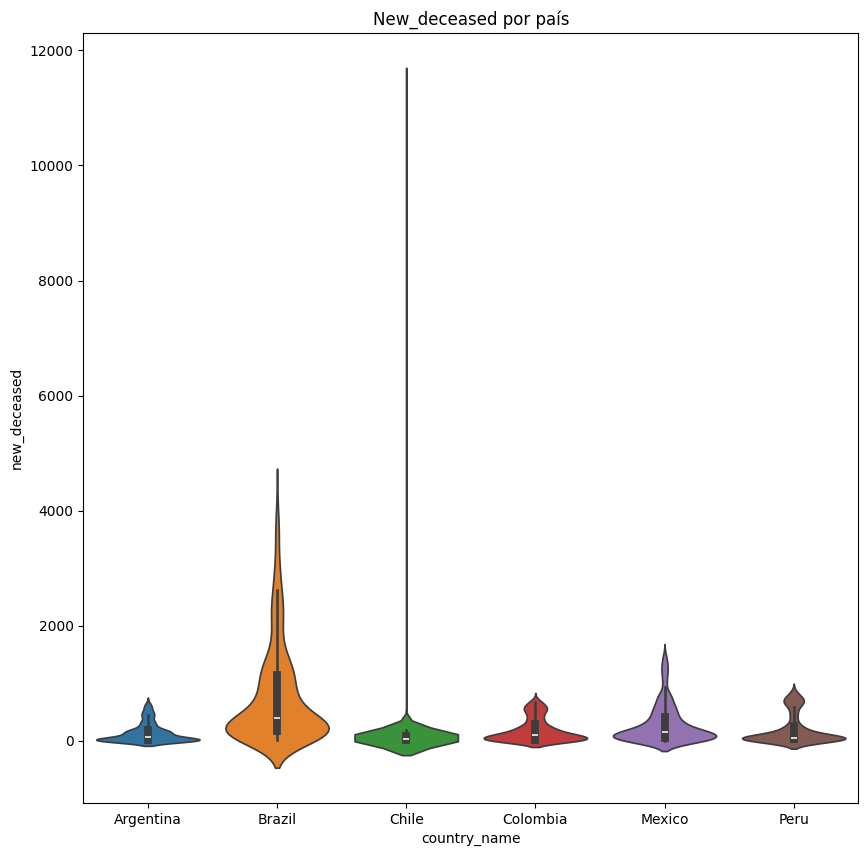

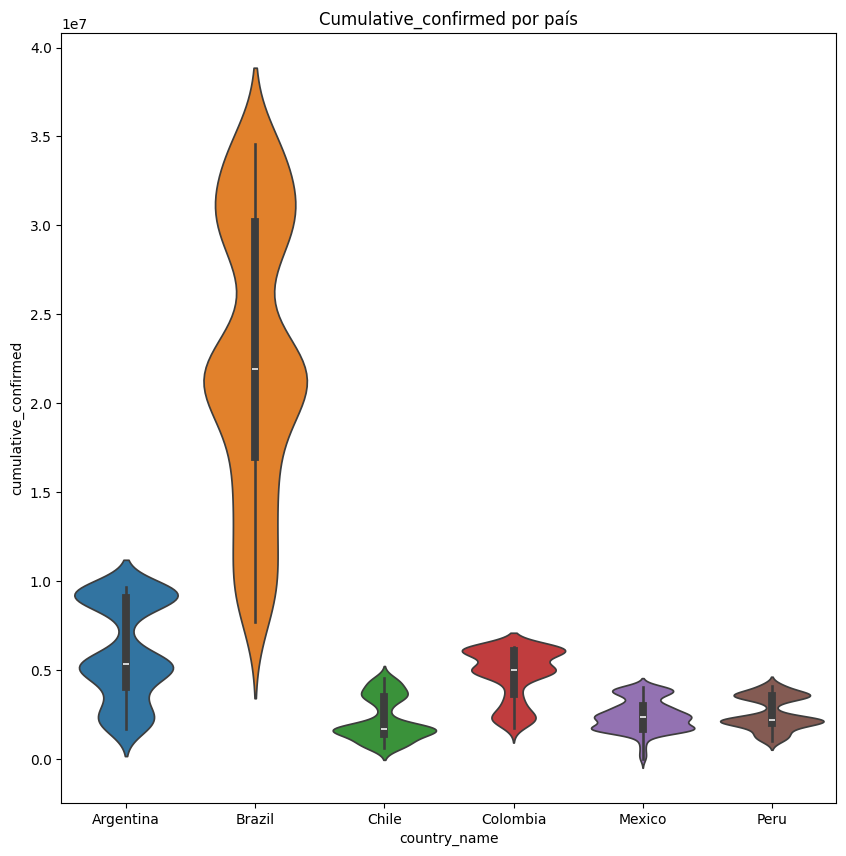

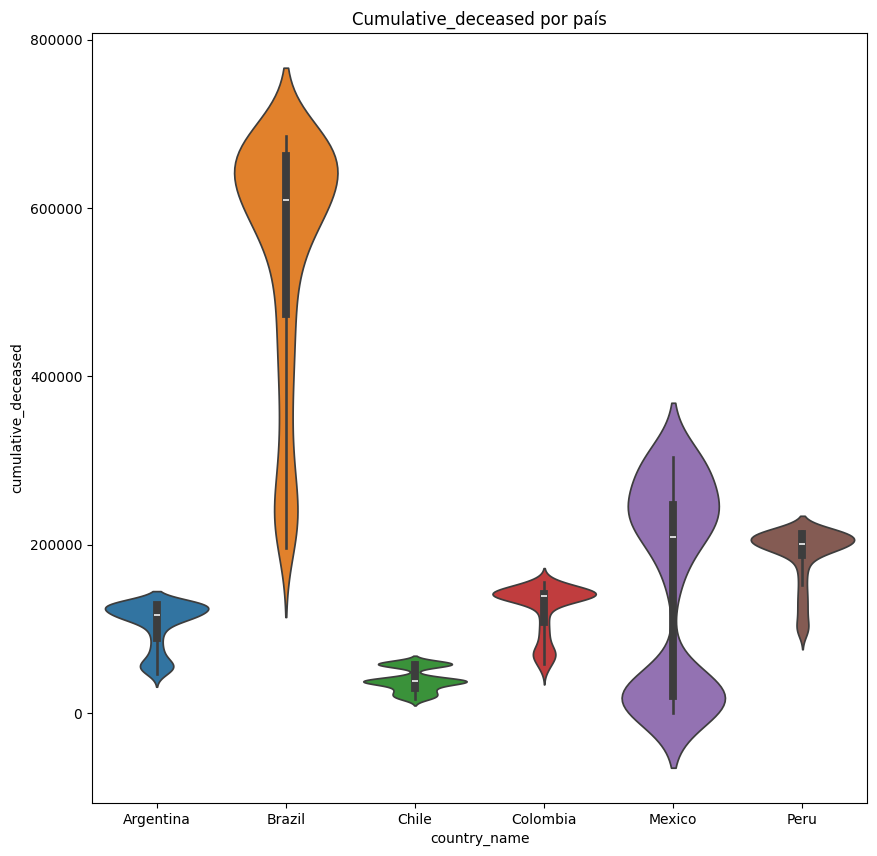

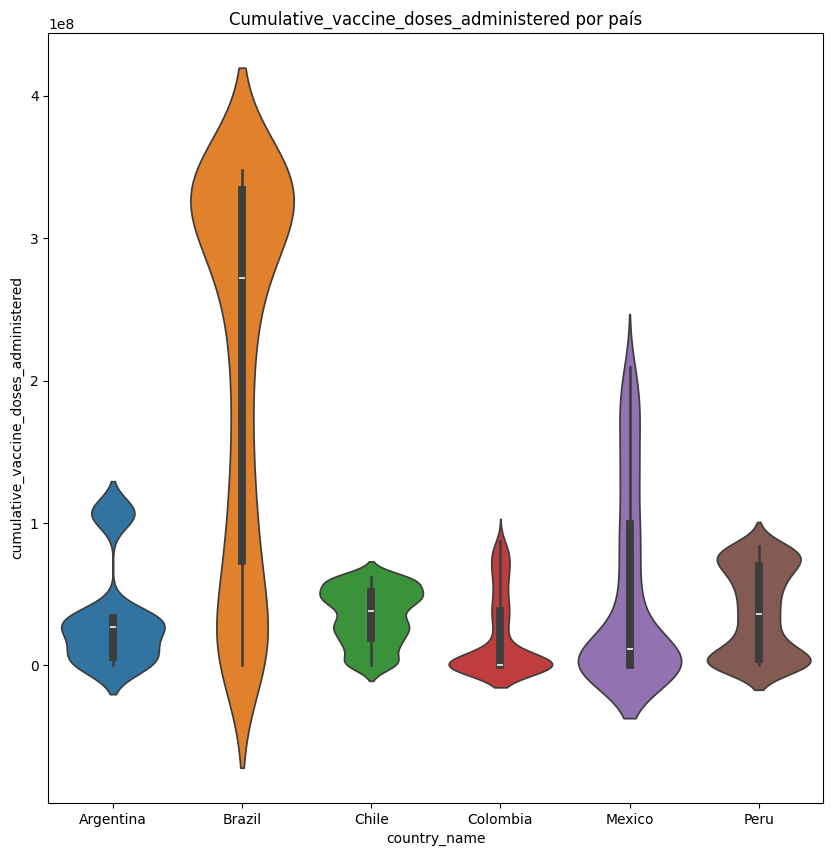

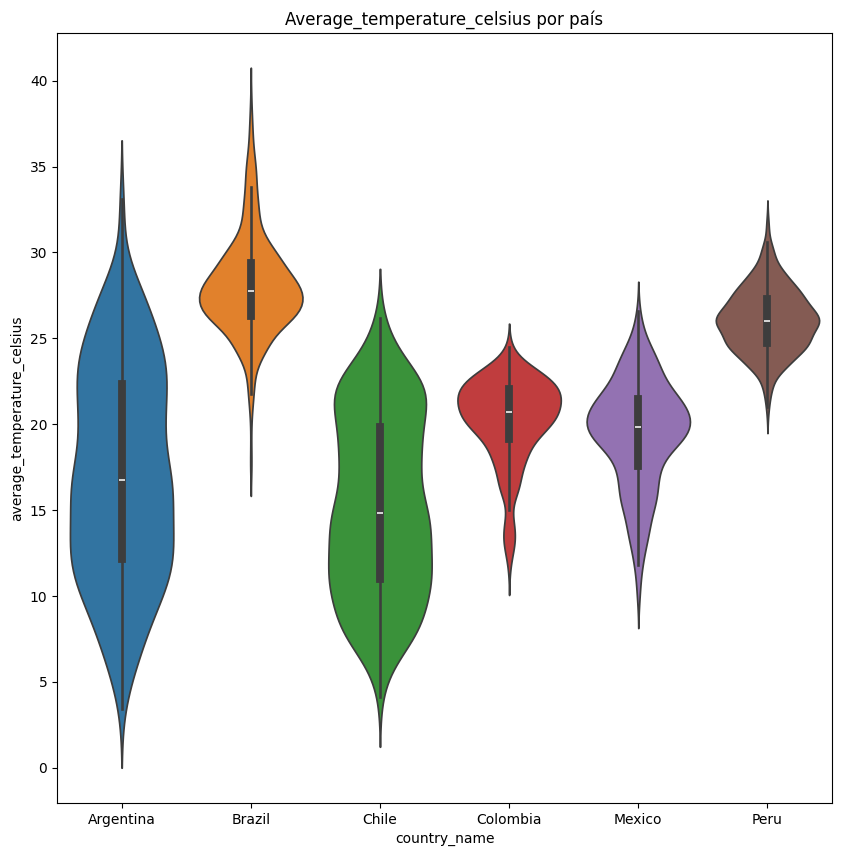

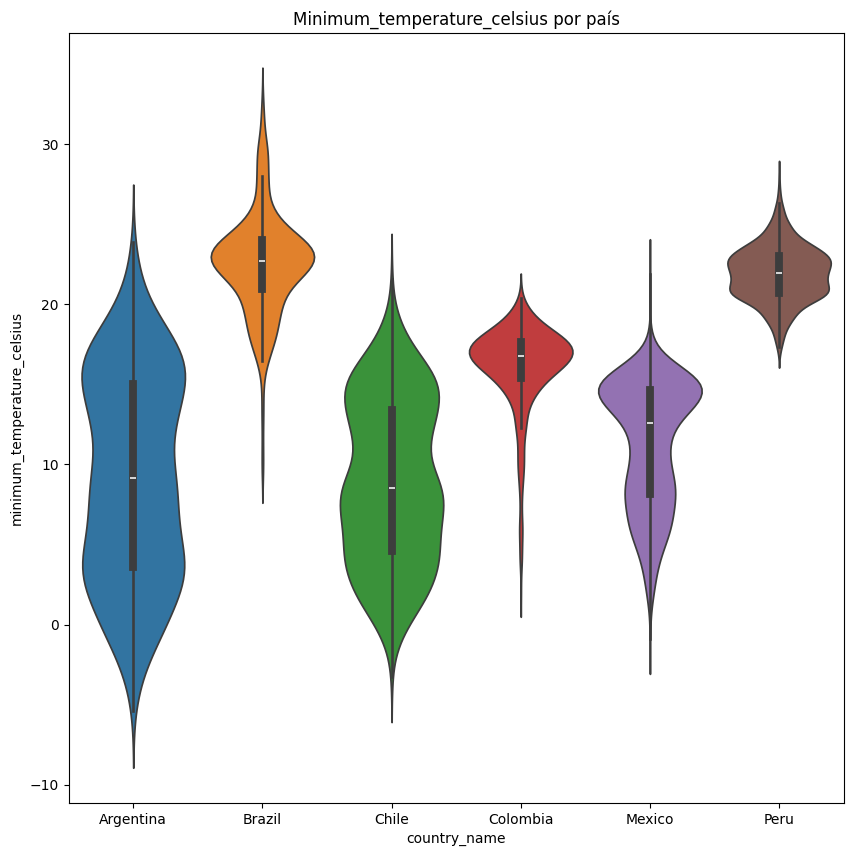

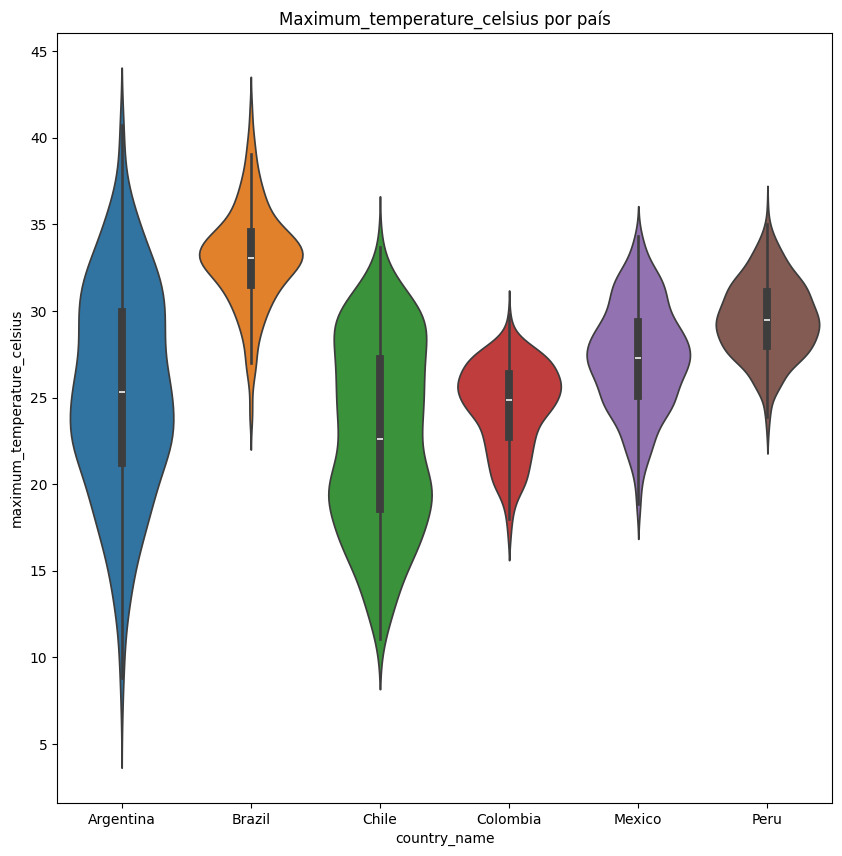

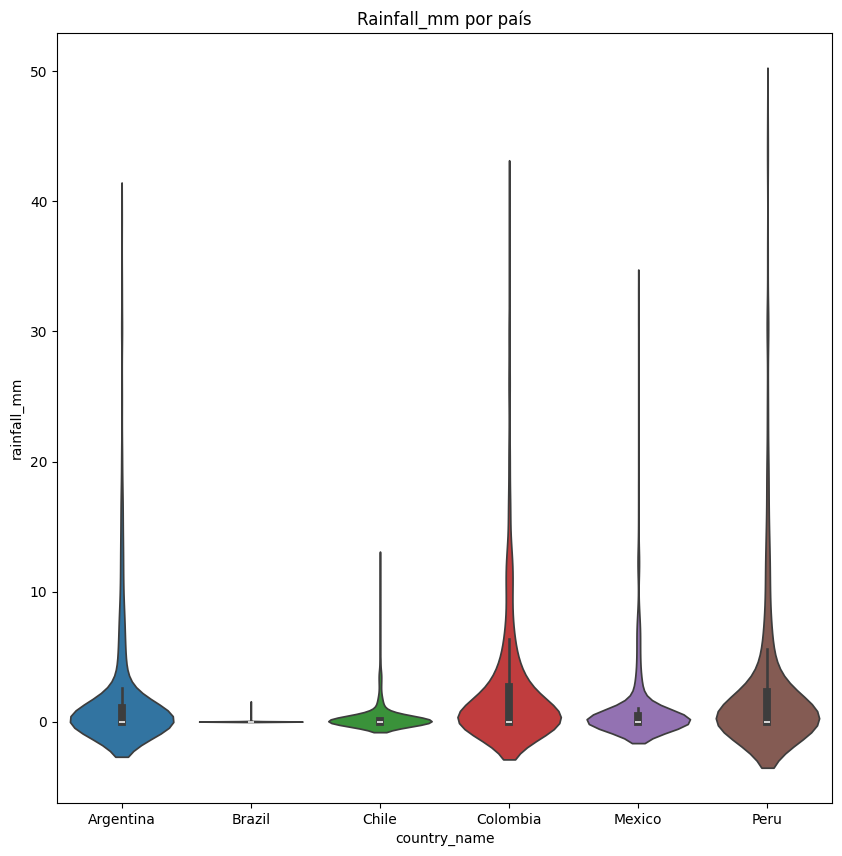

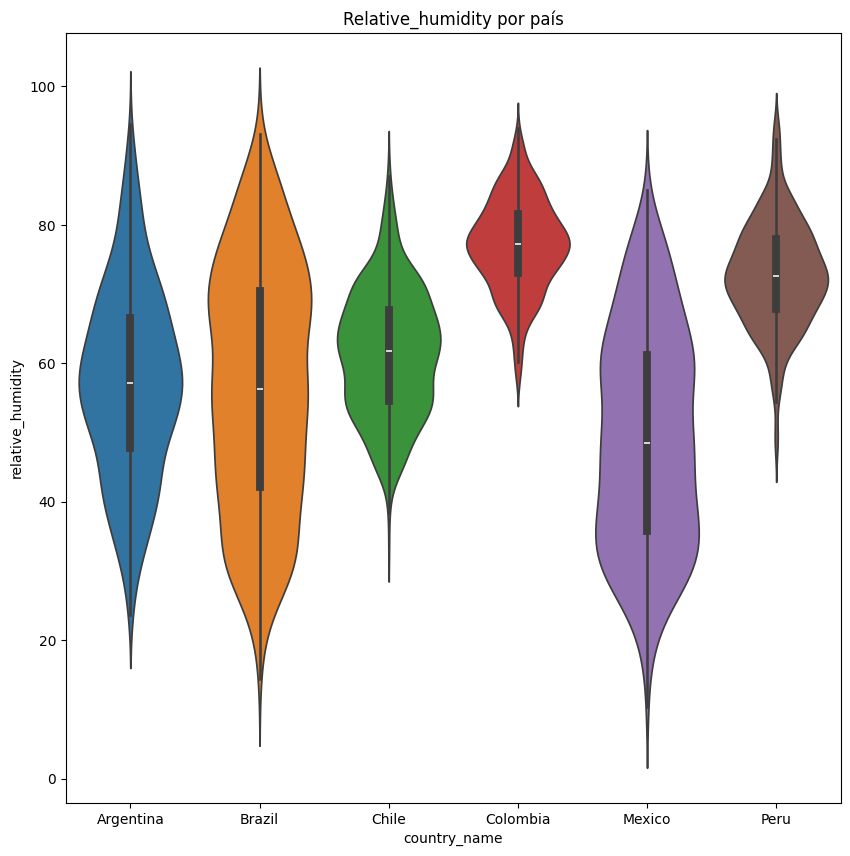

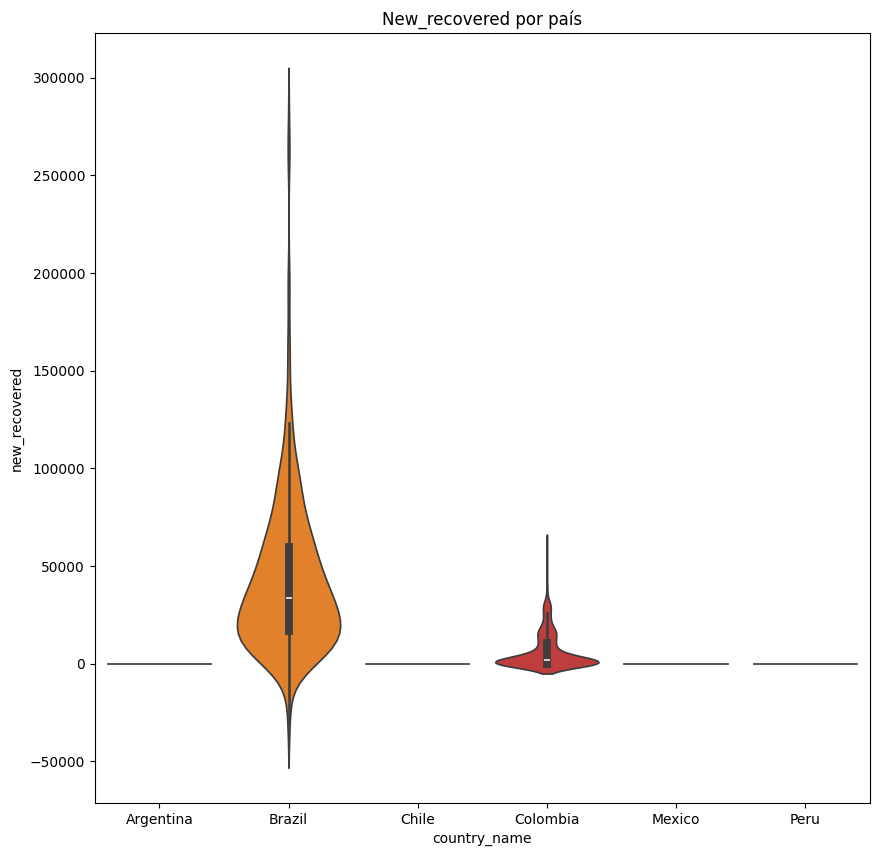

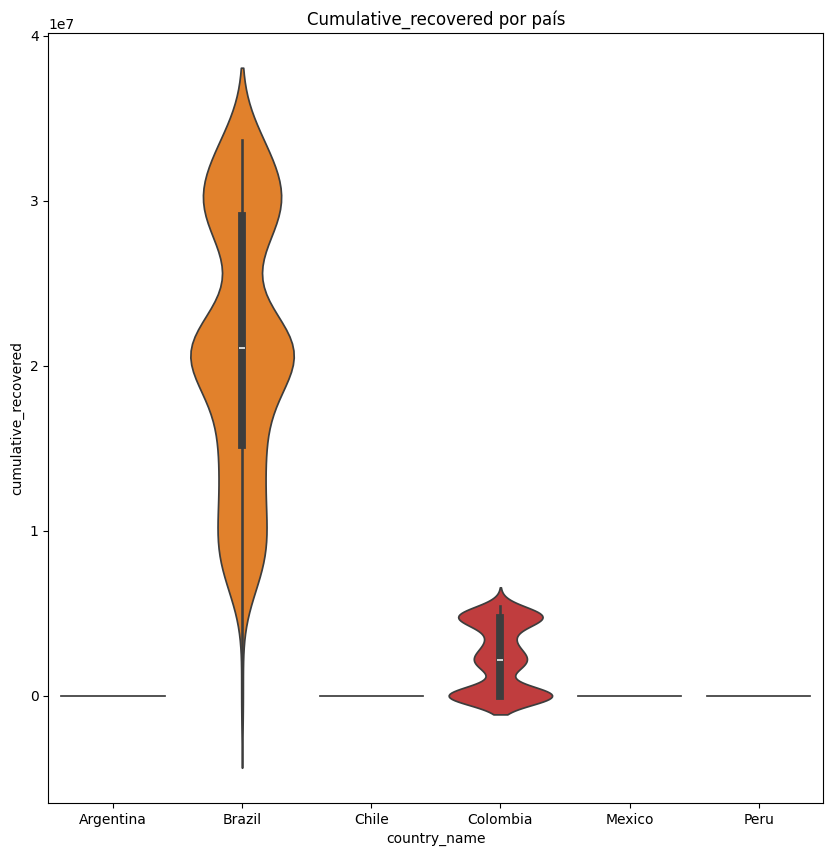

In [82]:
col_M6=[] #6 se refiere a la cantidad de países
for i in data.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']: #no son de utilidad para el gráfico de violín
        if data[i].nunique() > 6: #si no es porque no tiene información
            col_M6.append(i)
# agregar a col_M6 la columna country_name para poder hacer análisis por país.
col_M6.append('country_name')

data_M6 = data[col_M6]

for i in data_M6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10, 10))
        sns.violinplot(x='country_name', y=i, data=data_M6, hue='country_name')
        plt.title(f'{i.capitalize()} por país')
        plt.show()


**DATO:** se puede observar que las dos últimas gráficas, en algunos países no hay la información suficiente.

------------------------------------------------------------------------------------------------------------------------------------
**Creación de Gráfico de barras para compara las edades por la poblacion**

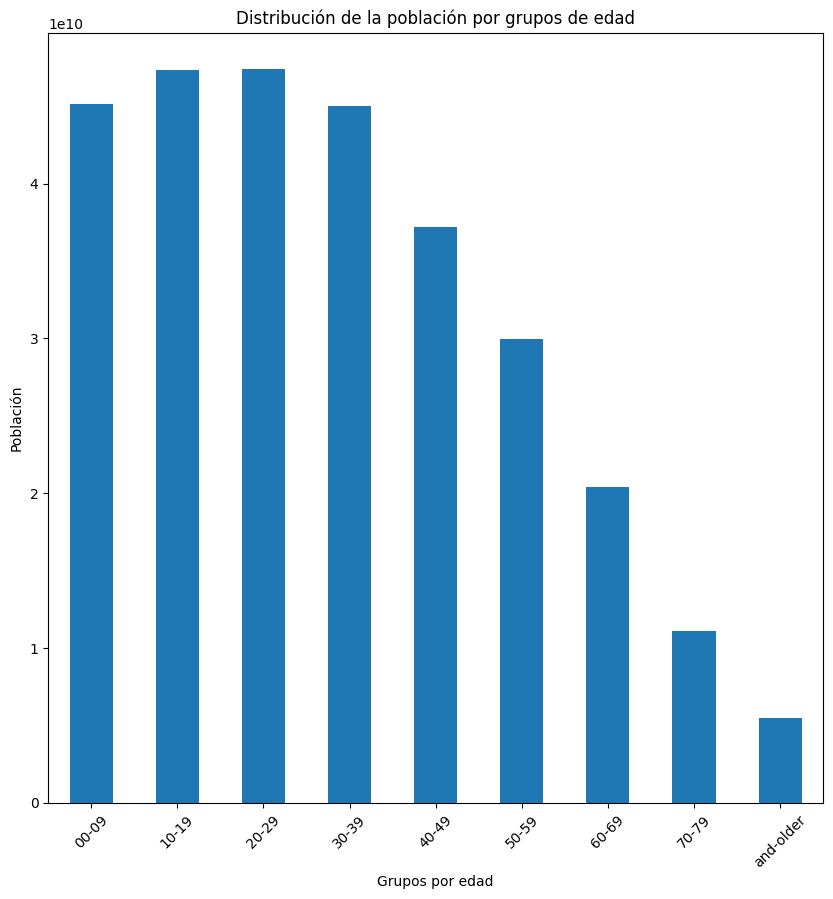

In [81]:
age_col = ['population_age_00_09',
 'population_age_10_19',
 'population_age_20_29',
 'population_age_30_39',
 'population_age_40_49',
 'population_age_50_59',
 'population_age_60_69',
 'population_age_70_79',
 'population_age_80_and_older']
data_age = data[age_col].sum()
plt.figure(figsize=(10, 10))
data_age.plot(kind='bar', stacked=True)
plt.xlabel('Grupos por edad')
plt.ylabel('Población')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_col)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_col], rotation=45)
plt.show()

------------------------------------------------------------------------------------------------------------------------------------
**Creación de mortalidad por género**

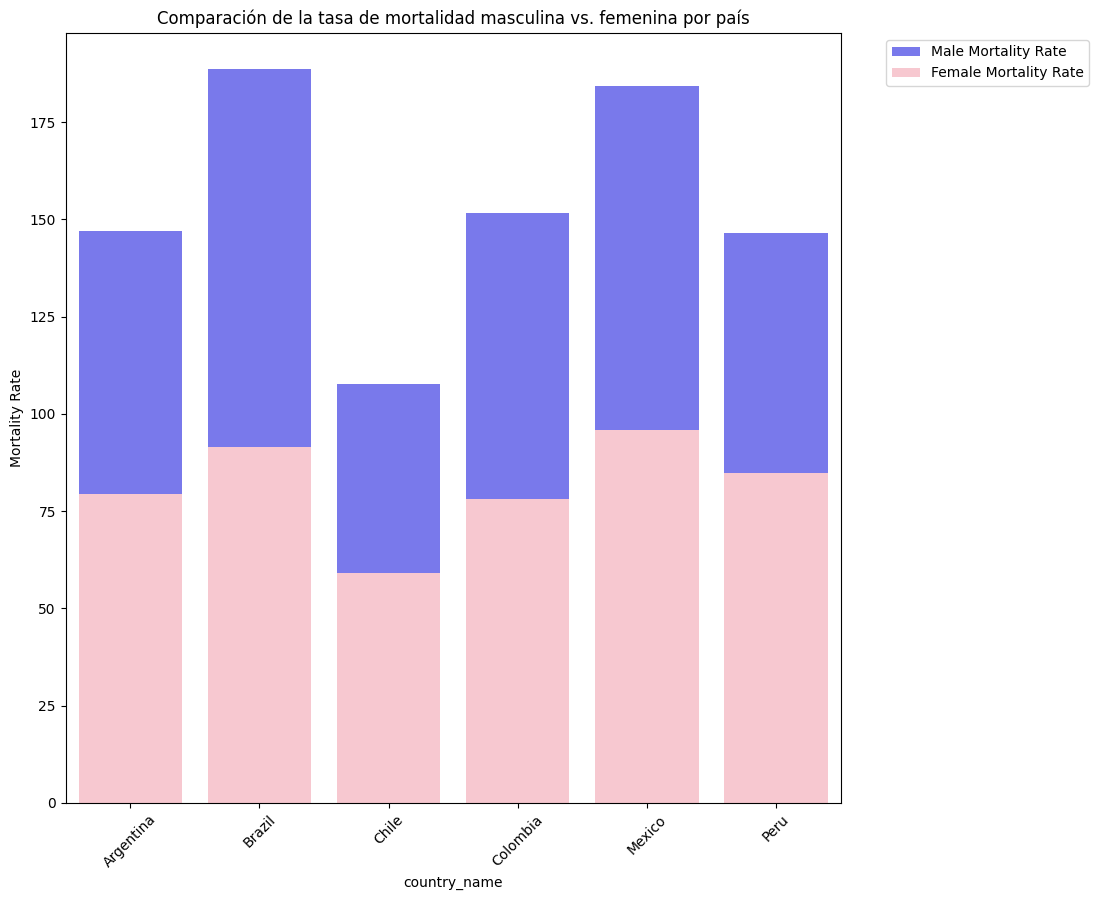

In [80]:
plt.figure(figsize=(10, 10))
sns.barplot(data=data, x='country_name', y='adult_male_mortality_rate', color='blue', alpha=0.6, label='Male Mortality Rate')
sns.barplot(data=data, x='country_name', y='adult_female_mortality_rate', color='pink', label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


------------------------------------------------------------------------------------------------------------------------------------
**Creación de mapa de calor**

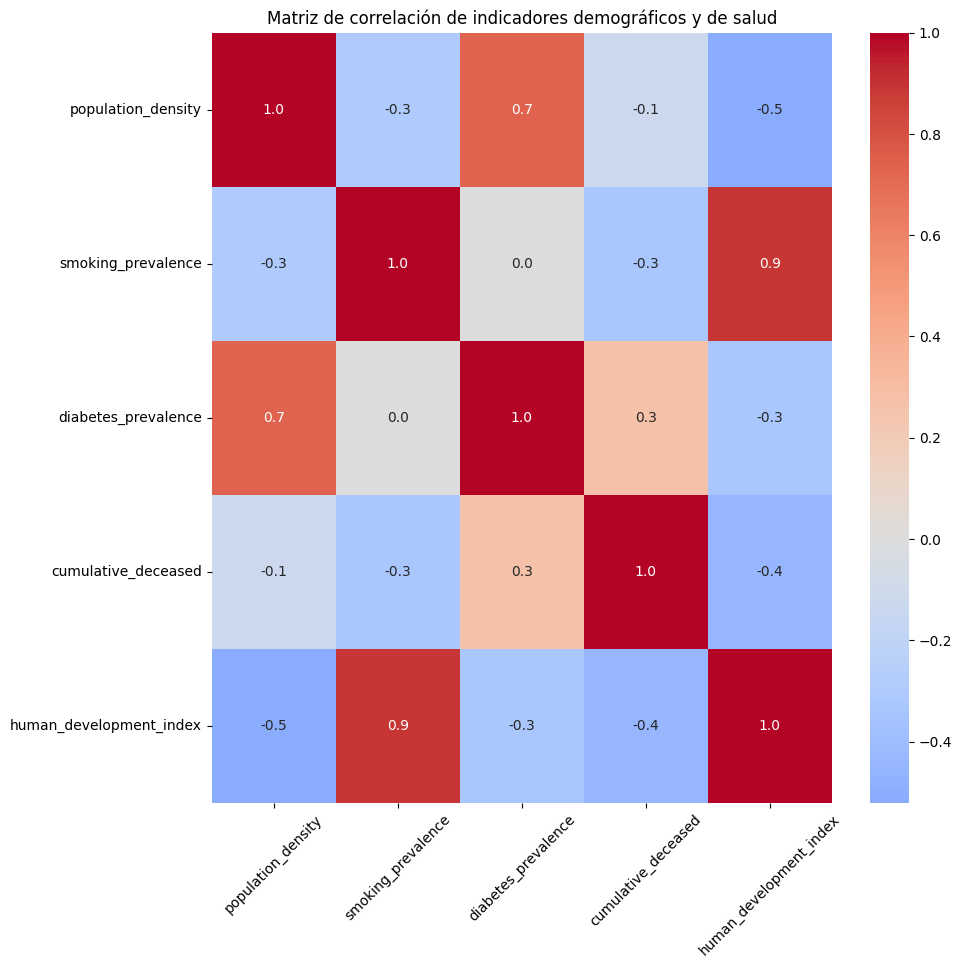

In [87]:
columnas = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
df_MC = data[columnas].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(df_MC, annot=True, cmap='coolwarm', fmt=".1f", center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.xticks(rotation=45)
plt.show()

------------------------------------------------------------------------------------------------------------------------------------
**Creación gráficas para comparar lo anterior**

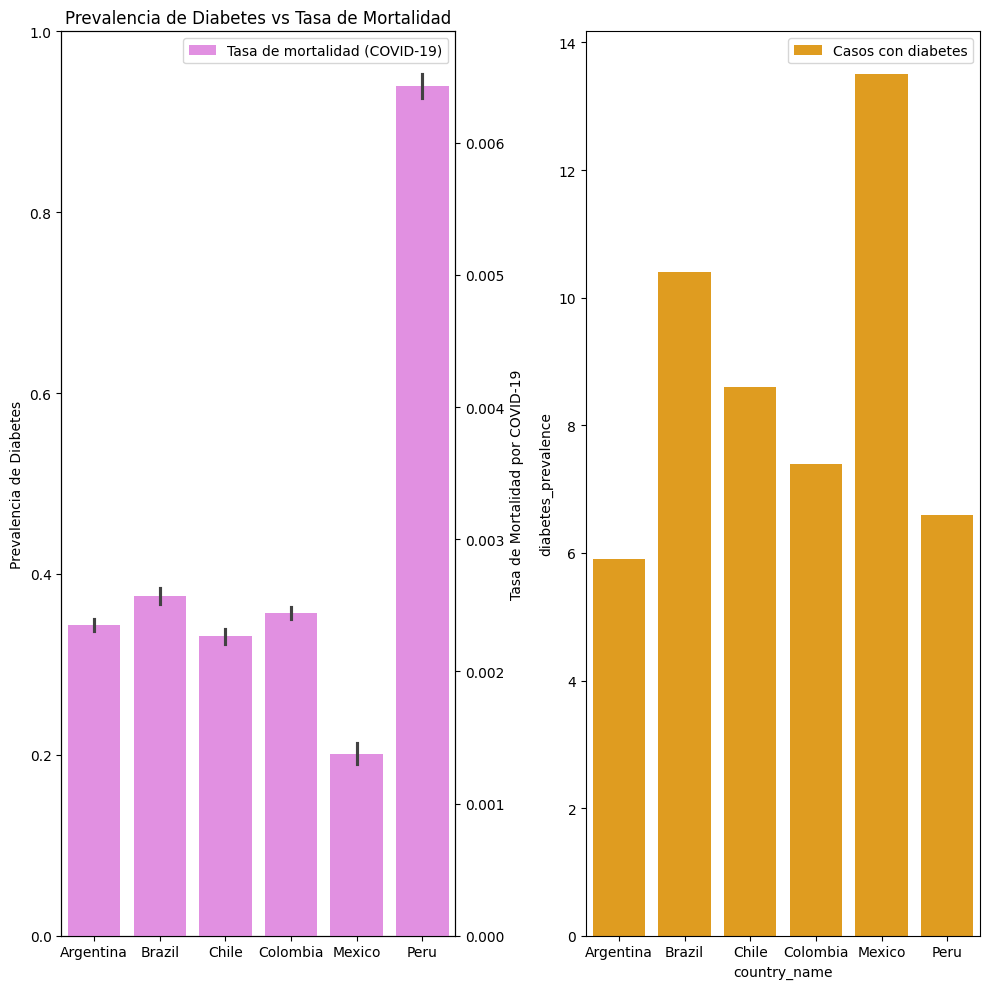

In [103]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 10))
sns.barplot(data=data, x=data['country_name'], y=data['diabetes_prevalence'], color='orange', label='Casos con diabetes')
ax2 = ax.twinx()
sns.barplot(data=data, x=data['country_name'], y=data['cumulative_deceased'] / data['population'], color='violet', label='Tasa de mortalidad (COVID-19)', ax=ax2)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Prevalencia de Diabetes vs Tasa de Mortalidad')
plt.tight_layout()
plt.show()


**DATO:** se puede observar que la diabete no es causalidad de mortalidad por COVID-19

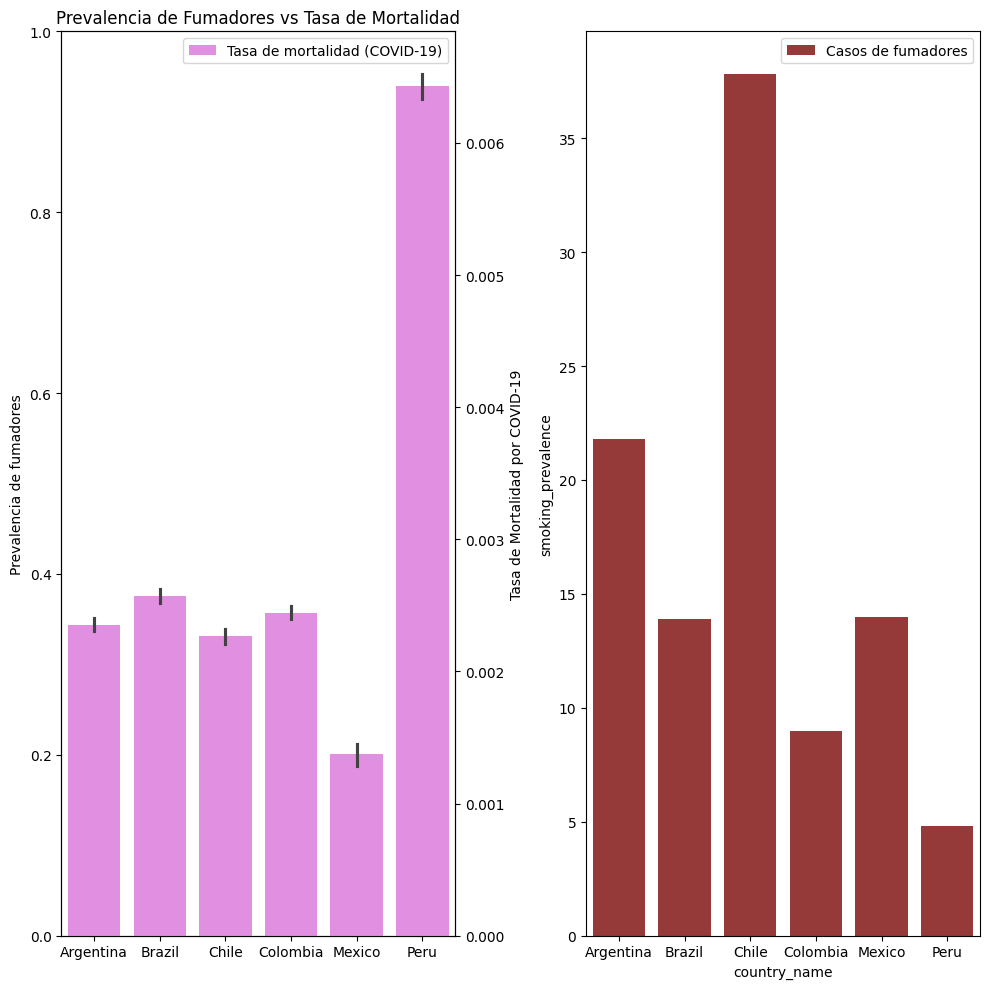

In [99]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 10))
sns.barplot(data=data, x=data['country_name'], y=data['smoking_prevalence'], color='brown', label='Casos de fumadores')
ax2 = ax.twinx()
sns.barplot(data=data, x=data['country_name'], y=data['cumulative_deceased'] / data['population'], color='violet', label='Tasa de mortalidad (COVID-19)', ax=ax2)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de fumadores')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Prevalencia de Fumadores vs Tasa de Mortalidad')
plt.tight_layout()
plt.show()

# Avance 3

In [2]:
data = pd.read_csv(r'D:\Cursos\Henry - Data Analytics\Modulo 4\PI\DatosFinalesFiltrado.csv', sep=',', low_memory=True)
data.shape

(3744, 50)

In [3]:
data['date'] = pd.to_datetime(data['date'], format = 'mixed')
data = data.set_index(data['date'])
data.index.tolist()

[Timestamp('2021-01-02 00:00:00'),
 Timestamp('2021-01-03 00:00:00'),
 Timestamp('2021-01-04 00:00:00'),
 Timestamp('2021-01-05 00:00:00'),
 Timestamp('2021-01-06 00:00:00'),
 Timestamp('2021-01-07 00:00:00'),
 Timestamp('2021-01-08 00:00:00'),
 Timestamp('2021-01-09 00:00:00'),
 Timestamp('2021-01-10 00:00:00'),
 Timestamp('2021-01-11 00:00:00'),
 Timestamp('2021-01-12 00:00:00'),
 Timestamp('2021-01-13 00:00:00'),
 Timestamp('2021-01-14 00:00:00'),
 Timestamp('2021-01-15 00:00:00'),
 Timestamp('2021-01-16 00:00:00'),
 Timestamp('2021-01-17 00:00:00'),
 Timestamp('2021-01-18 00:00:00'),
 Timestamp('2021-01-19 00:00:00'),
 Timestamp('2021-01-20 00:00:00'),
 Timestamp('2021-01-21 00:00:00'),
 Timestamp('2021-01-22 00:00:00'),
 Timestamp('2021-01-23 00:00:00'),
 Timestamp('2021-01-24 00:00:00'),
 Timestamp('2021-01-25 00:00:00'),
 Timestamp('2021-01-26 00:00:00'),
 Timestamp('2021-01-27 00:00:00'),
 Timestamp('2021-01-28 00:00:00'),
 Timestamp('2021-01-29 00:00:00'),
 Timestamp('2021-01-

------------------------------------------------------------------------------------------------------------------------------------
**Evolución de casos activos vs recuperados**

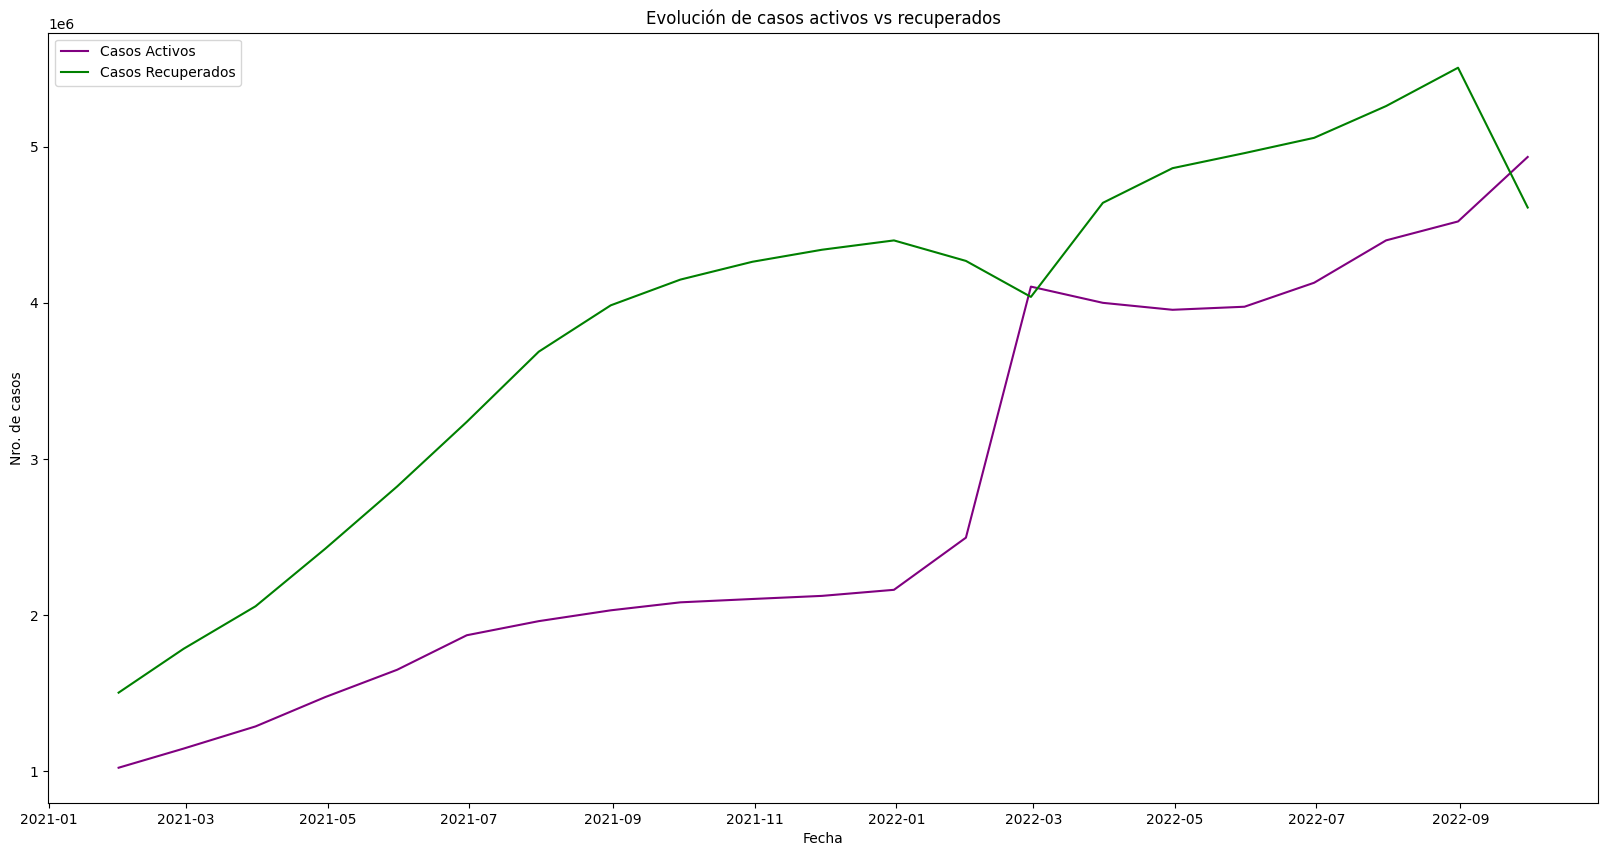

In [61]:
data['active_cases'] = (data['cumulative_confirmed'] - data['cumulative_recovered'] - data['cumulative_deceased'])

plt.figure(figsize=(20, 10))
sns.lineplot(data=data.resample('ME').mean(numeric_only=True), x='date', y='active_cases', color='purple', label='Casos Activos')
sns.lineplot(data=data.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', color='green', label='Casos Recuperados')
plt.title('Evolución de casos activos vs recuperados')
plt.xlabel('Fecha')
plt.ylabel('Nro. de casos')
plt.legend()
plt.show()


------------------------------------------------------------------------------------------------------------------------------------
**Relación de cobertura de vacunación y reducción de casos**

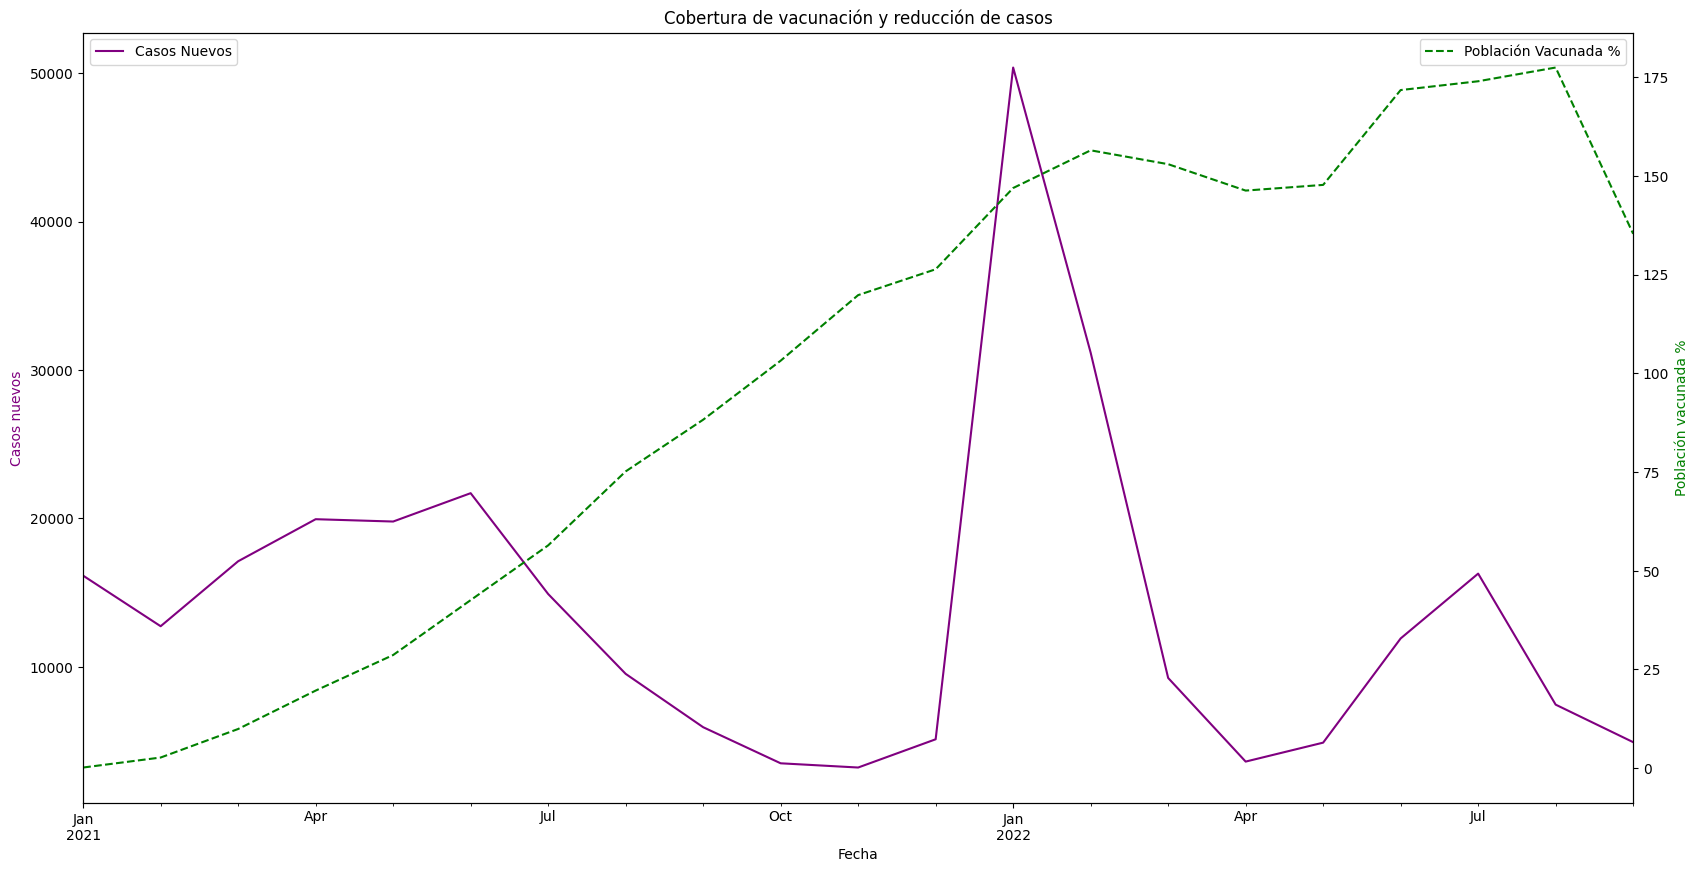

In [58]:
plt.figure(figsize=(20, 10))
ax1 = plt.gca()
ax2 = ax1.twinx()
data['percentage_vaccinated'] = (data['cumulative_vaccine_doses_administered'] / data['population']) * 100
data.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='purple', label='Casos Nuevos')
data.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Población Vacunada %', linestyle='--')

ax1.set_title('Cobertura de vacunación y reducción de casos')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos nuevos', color='purple')
ax2.set_ylabel('Población vacunada %', color='green')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


------------------------------------------------------------------------------------------------------------------------------------
**Progreso de Vacunación**

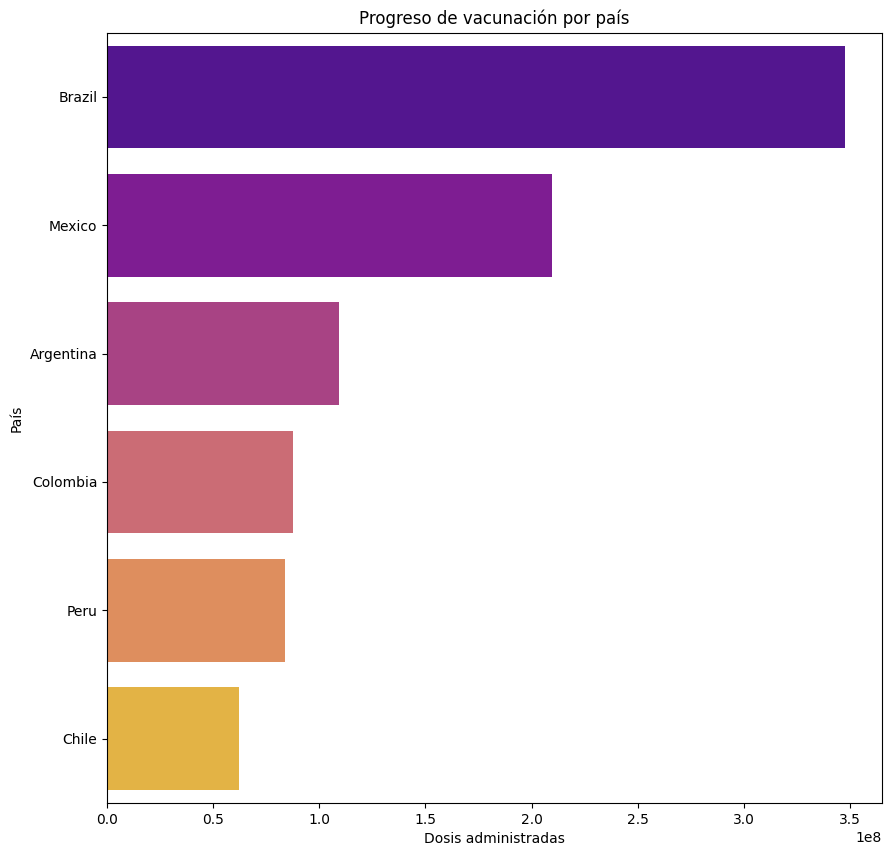

In [18]:
data_vac = data.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(x=data_vac.values, y=data_vac.index, hue=data_vac.index, palette='plasma')
plt.title('Progreso de vacunación por país')
plt.xlabel('Dosis administradas')
plt.ylabel('País')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------
**Relación entre nuevos casos y temperatura**

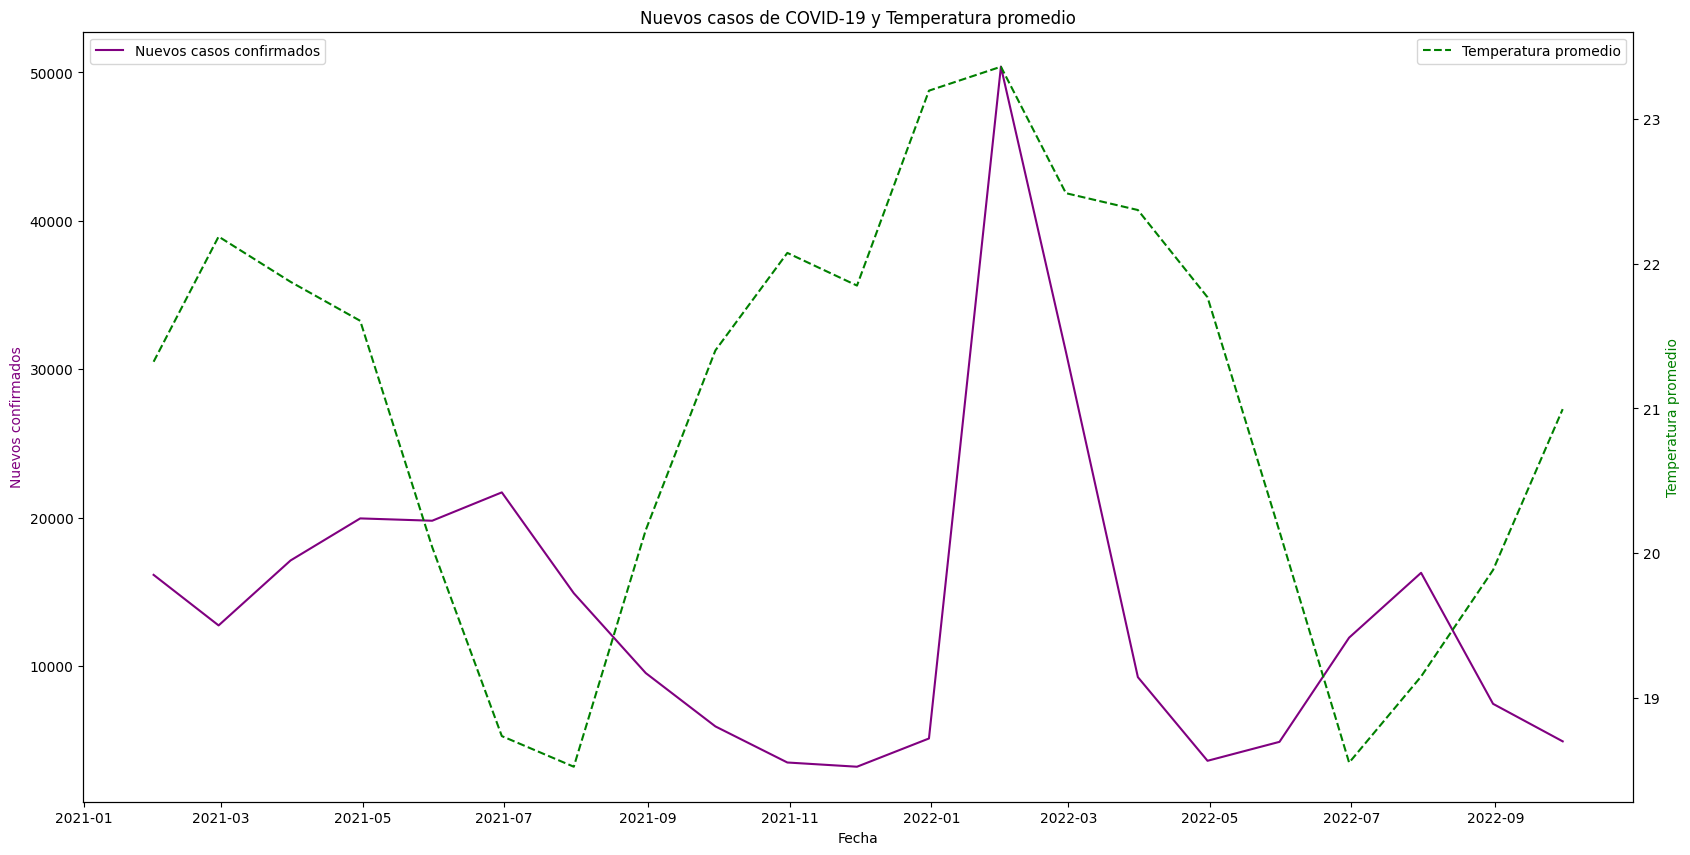

In [59]:
plt.figure(figsize=(20,10))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(data.resample('ME').mean(numeric_only=True).index, \
         data.resample('ME').mean(numeric_only=True)['new_confirmed'], color='purple', label='Nuevos casos confirmados')
ax2.plot(data.resample('ME').mean(numeric_only=True).index, \
         data.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='green', label='Temperatura promedio', linestyle='--')

plt.title('Nuevos casos de COVID-19 y Temperatura promedio')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos confirmados', color='purple')
ax2.set_ylabel('Temperatura promedio', color='green')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------
**Impacto de urbanización en propagación de COVID-19**

C:\Users\aera1\AppData\Local\Temp\ipykernel_12020\2533265031.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casos['urban_population_percentage'], y=casos.index, palette='plasma')


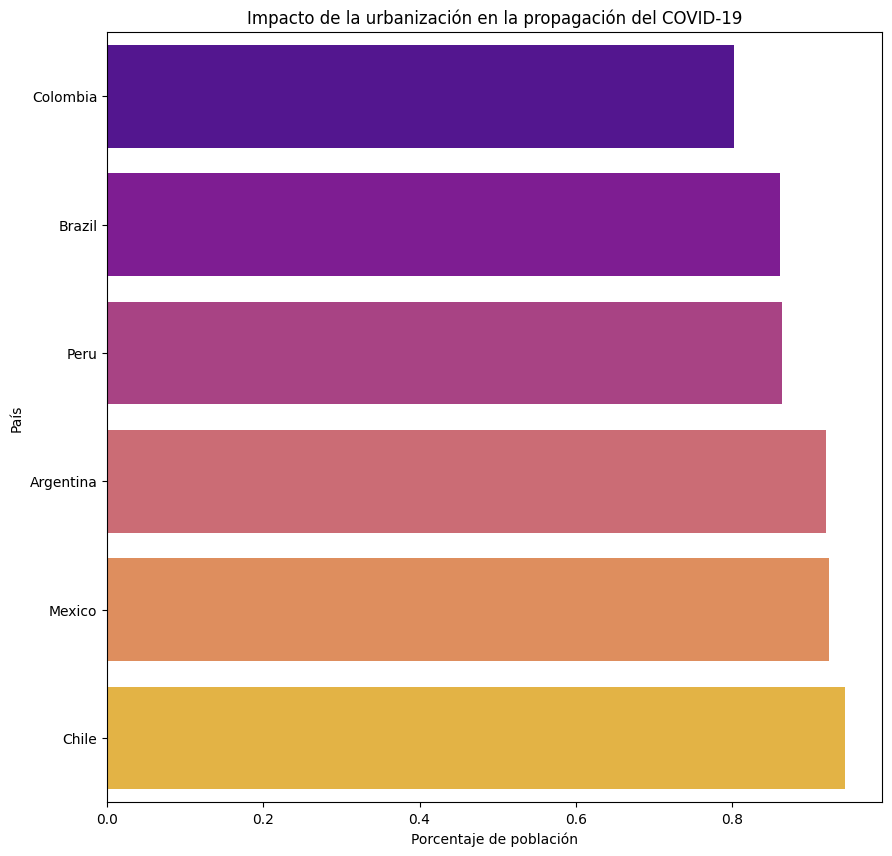

In [33]:
data['urban_population_percentage'] = \
    data['population_urban'] / data['population']
casos = data.groupby('country_name').last().sort_values(by='urban_population_percentage') #la población es constante, solamente se necesita acceder a uno

plt.figure(figsize=(10,10))
sns.barplot(x=casos['urban_population_percentage'], y=casos.index, palette='plasma')
plt.title('Impacto de la urbanización en la propagación del COVID-19')
plt.xlabel('Porcentaje de población')
plt.ylabel('País')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------
**Evolución Semanal**

In [11]:
data['week'] = data.index.isocalendar().week
data['year'] = data.index.isocalendar().year
data['month'] = data.index.month

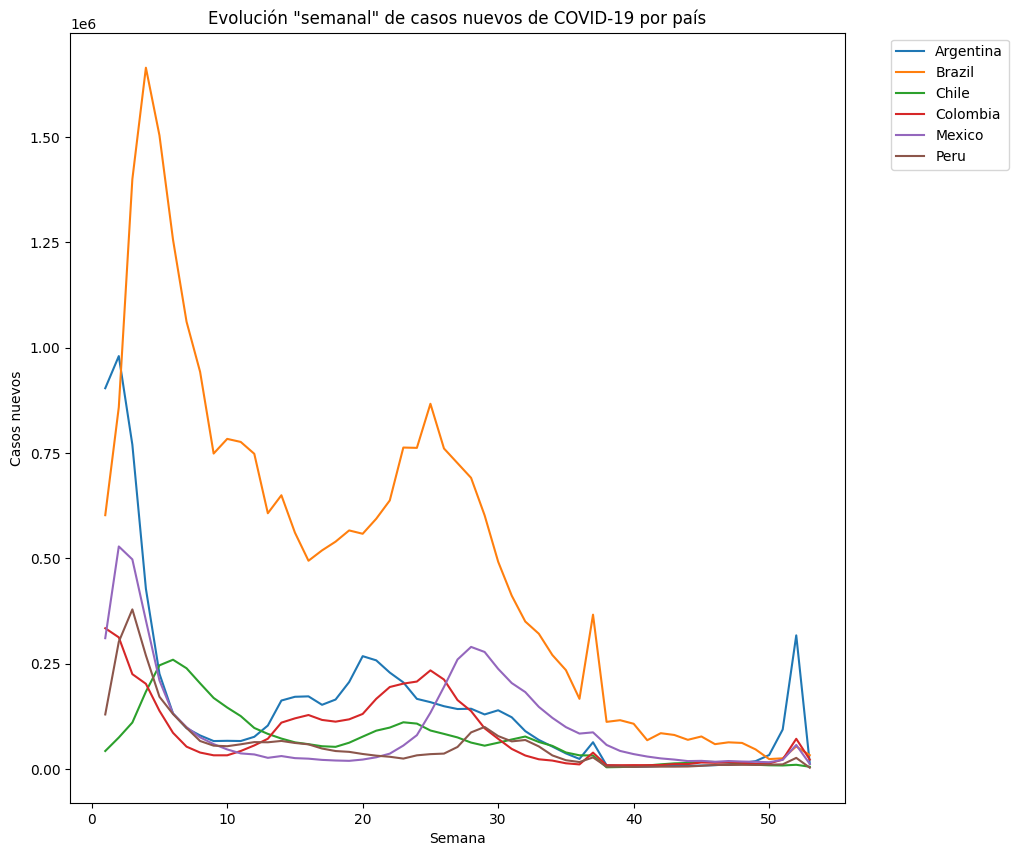

In [12]:
casos_semana = data.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(10,10))
for pais in casos_semana['country_name'].unique():
    casos_SxP = casos_semana[casos_semana['country_name'] == pais]
    plt.plot(casos_SxP['week'], casos_SxP['new_confirmed'], label=pais)

plt.title('Evolución "semanal" de casos nuevos de COVID-19 por país')
plt.xlabel('Semana')
plt.ylabel('Casos nuevos')
plt.legend(bbox_to_anchor=(1.05,1), loc=('upper left'))
plt.show()

------------------------------------------------------------------------------------------------------------------------------------
**Evolución Anual**

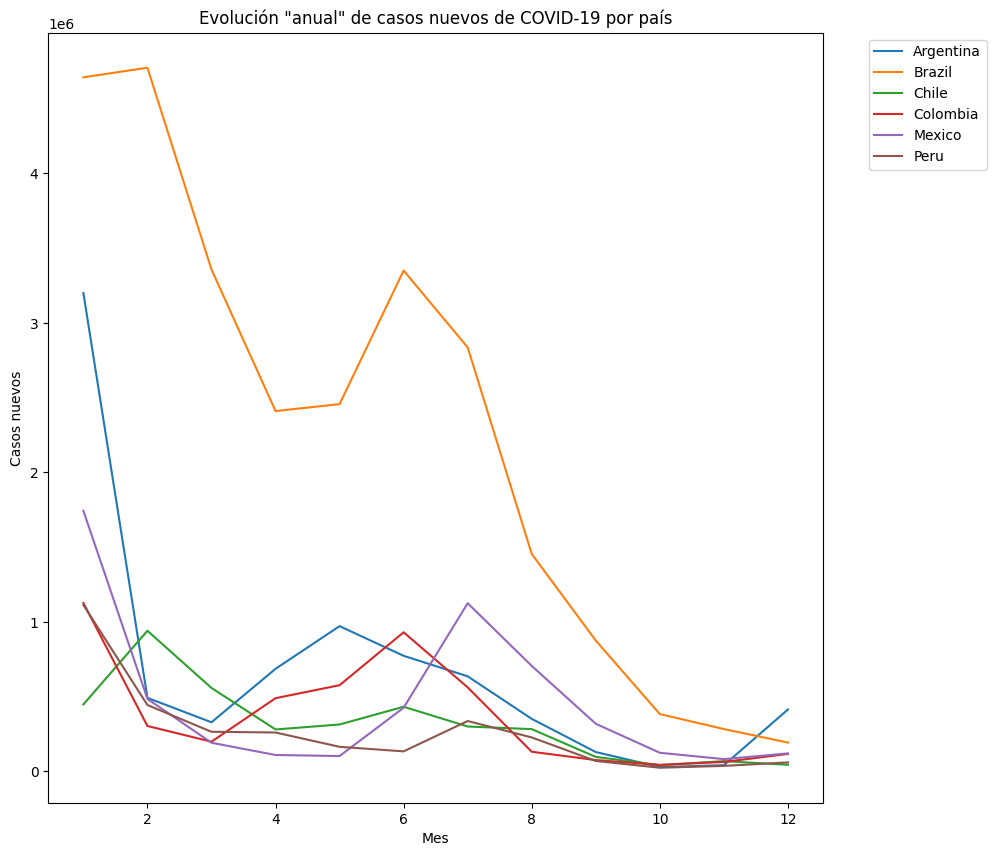

In [13]:
casos_anual = data.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(10,10))
for pais in casos_anual['country_name'].unique():
    casos_AxP = casos_anual[casos_anual['country_name'] == pais]
    plt.plot(casos_AxP['month'], casos_AxP['new_confirmed'], label=pais)

plt.title('Evolución "anual" de casos nuevos de COVID-19 por país')
plt.xlabel('Mes')
plt.ylabel('Casos nuevos')
plt.legend(bbox_to_anchor=(1.05,1), loc=('upper left'))
plt.show()

------------------------------------------------------------------------------------------------------------------------------------
**Distribución por edad**

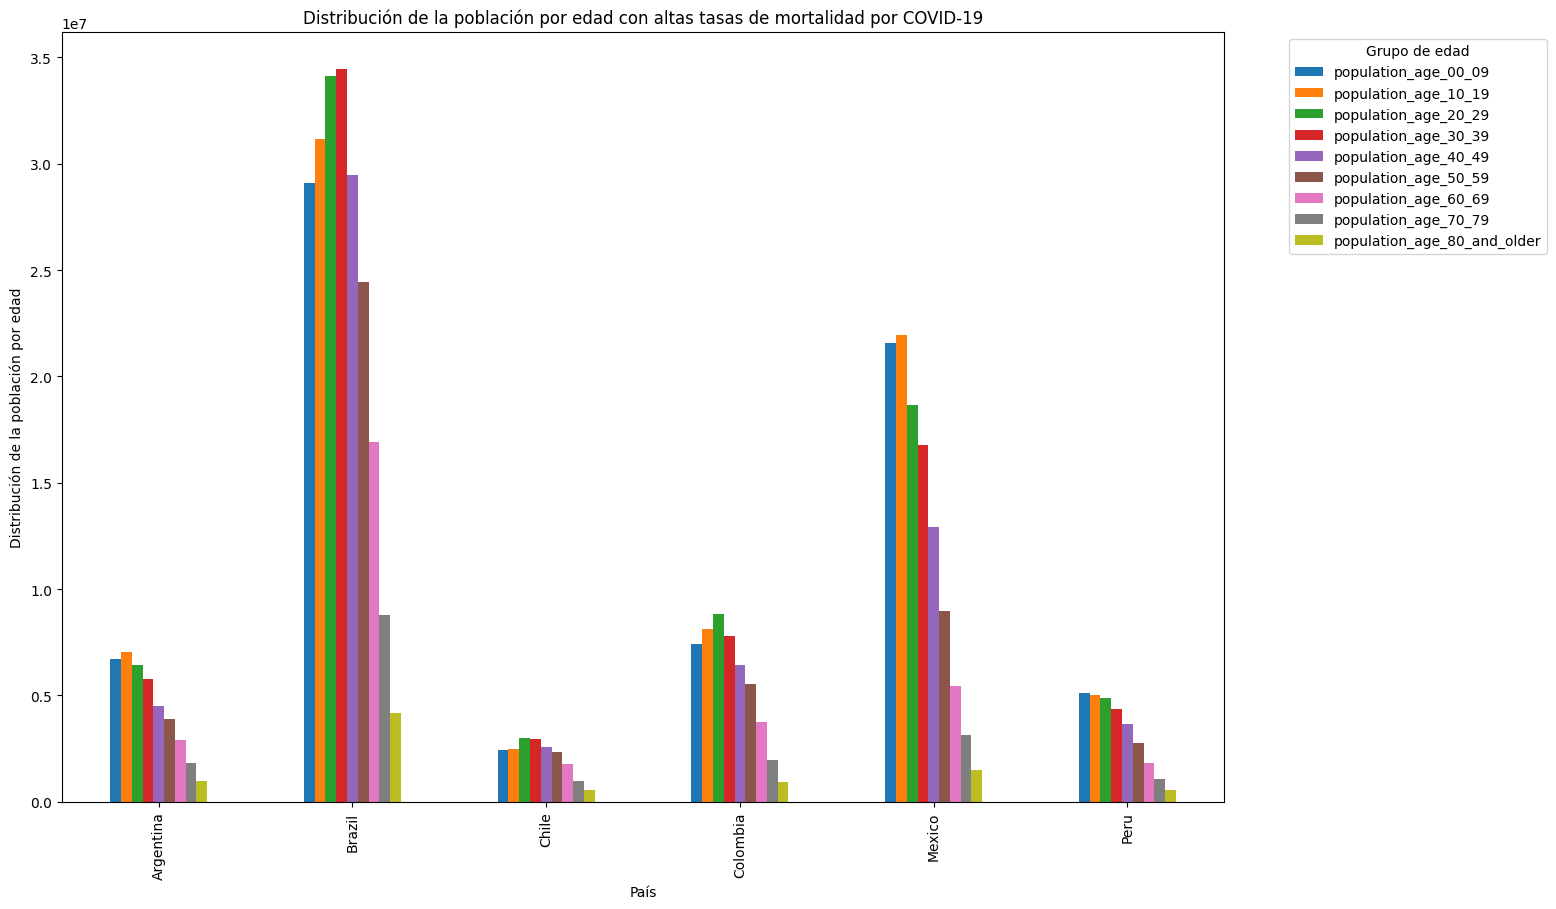

In [37]:
alta_mortalidad = data.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).index
grupos_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 
               'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
dist_edad = data[data['country_name'].isin(alta_mortalidad)].groupby('country_name')[grupos_edad].mean()

dist_edad.plot(kind='bar', stacked=False, figsize=(15, 10))
plt.title('Distribución de la población por edad con altas tasas de mortalidad por COVID-19')
plt.xlabel('País')
plt.ylabel('Distribución de la población por edad')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupo de edad')
plt.show()


------------------------------------------------------------------------------------------------------------------------------------
**Comparación de estrategias de vacunación por pais**

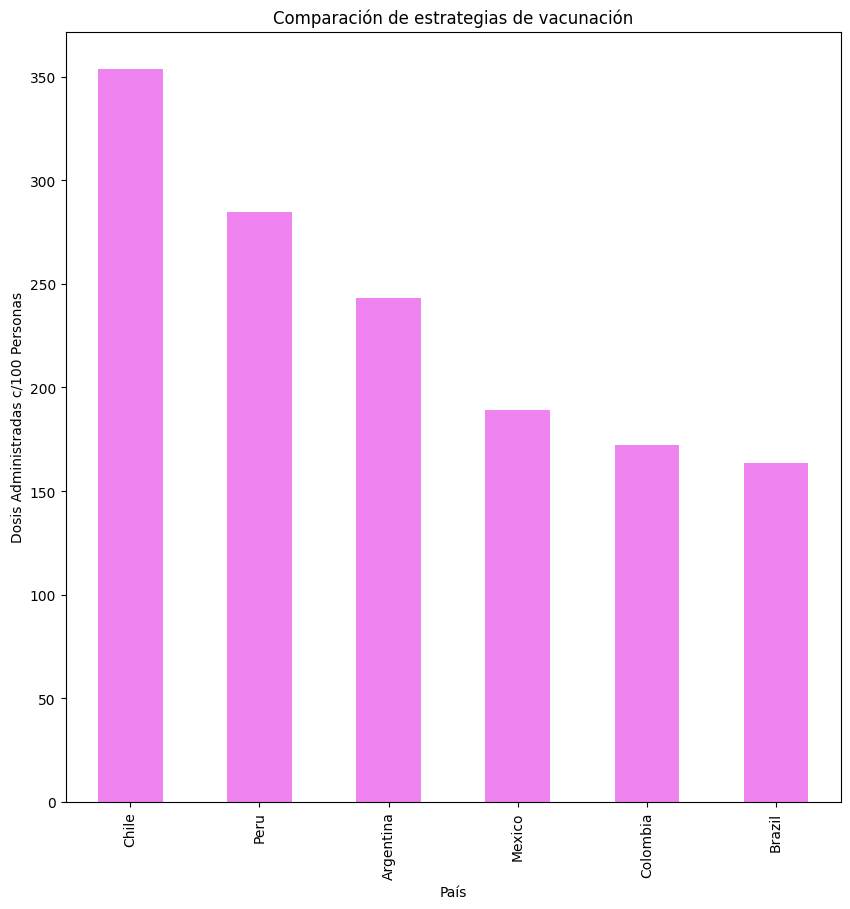

In [40]:
max_vac = data.groupby('country_name')['cumulative_vaccine_doses_administered'].max()
poblacion = data.groupby('country_name')['population'].max()
vac_stgy = (max_vac / poblacion) * 100

plt.figure(figsize=(10, 10))
vac_stgy.sort_values(ascending=False).plot(kind='bar', color='violet')
plt.title('Comparación de estrategias de vacunación')
plt.xlabel('País')
plt.ylabel('Dosis Administradas c/100 Personas')
plt.show()


------------------------------------------------------------------------------------------------------------------------------------
**Evolución de la mortalidad diaria**

C:\Users\aera1\AppData\Local\Temp\ipykernel_12020\3779839369.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='date', y='mortality_rate', color='purple', estimator='mean', ci=None)


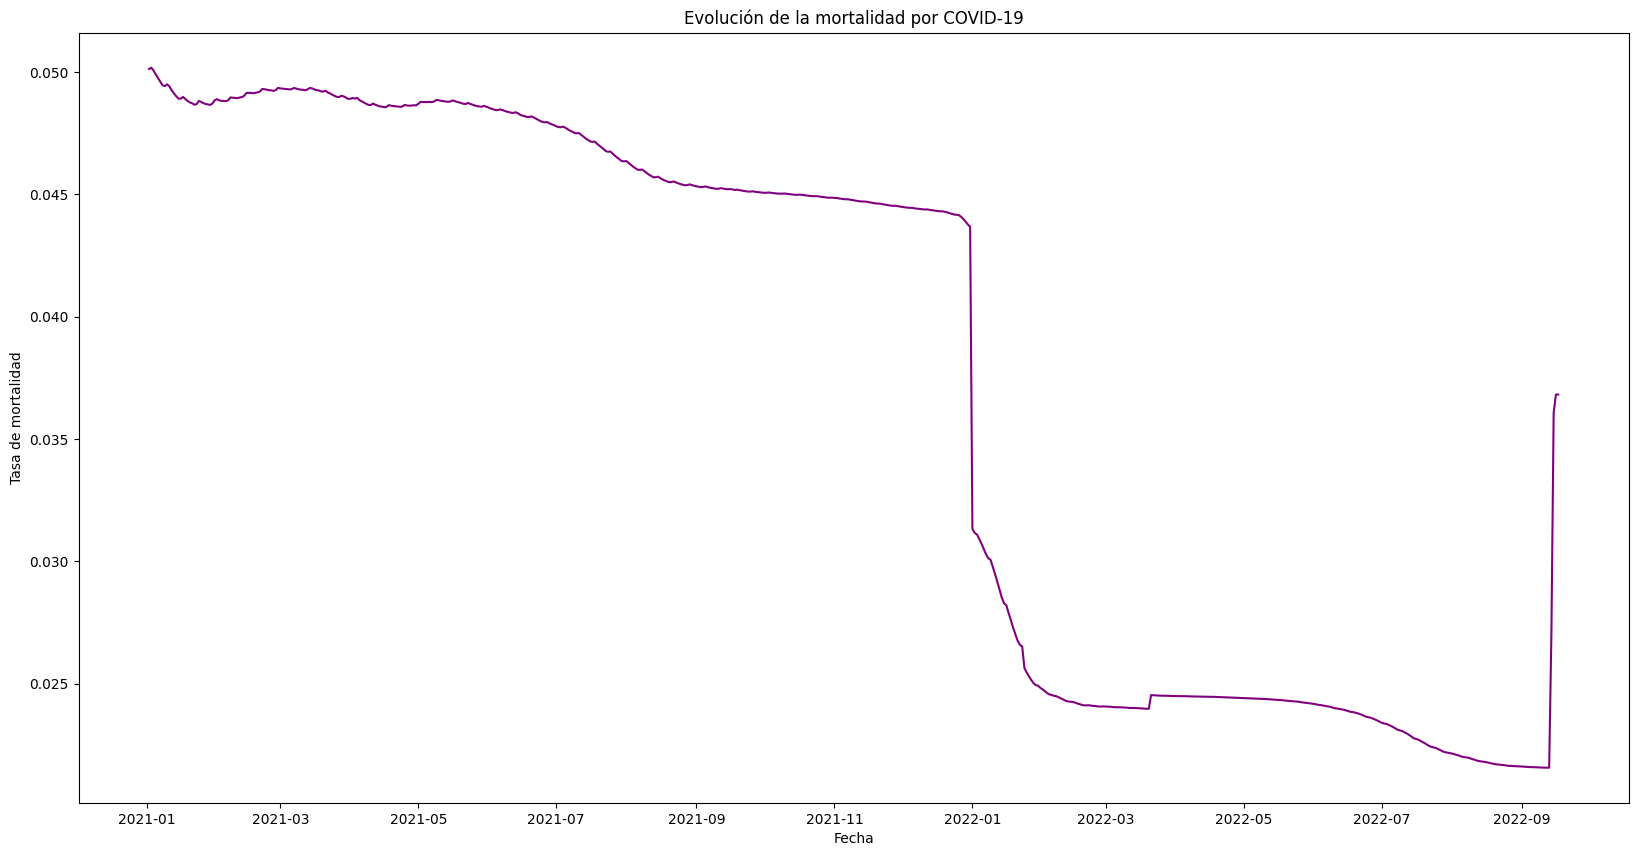

In [56]:
data['mortality_rate'] = (data['cumulative_deceased'] / data['cumulative_confirmed'])

plt.figure(figsize=(20, 10))
sns.lineplot(data=data, x='date', y='mortality_rate', color='purple', estimator='mean', ci=None) #produce error si no está definido el ci
plt.title('Evolución de la mortalidad por COVID-19')
plt.xlabel('Fecha')
plt.ylabel('Tasa de mortalidad')
plt.show()


------------------------------------------------------------------------------------------------------------------------------------
**Preevalencia de condiciones preexistentes en países con alta y baja mortalidad**

In [41]:
top_paises = data.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_countries = data.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
data_filtrada = data[data['country_name'].isin(top_paises.union(bottom_countries))]

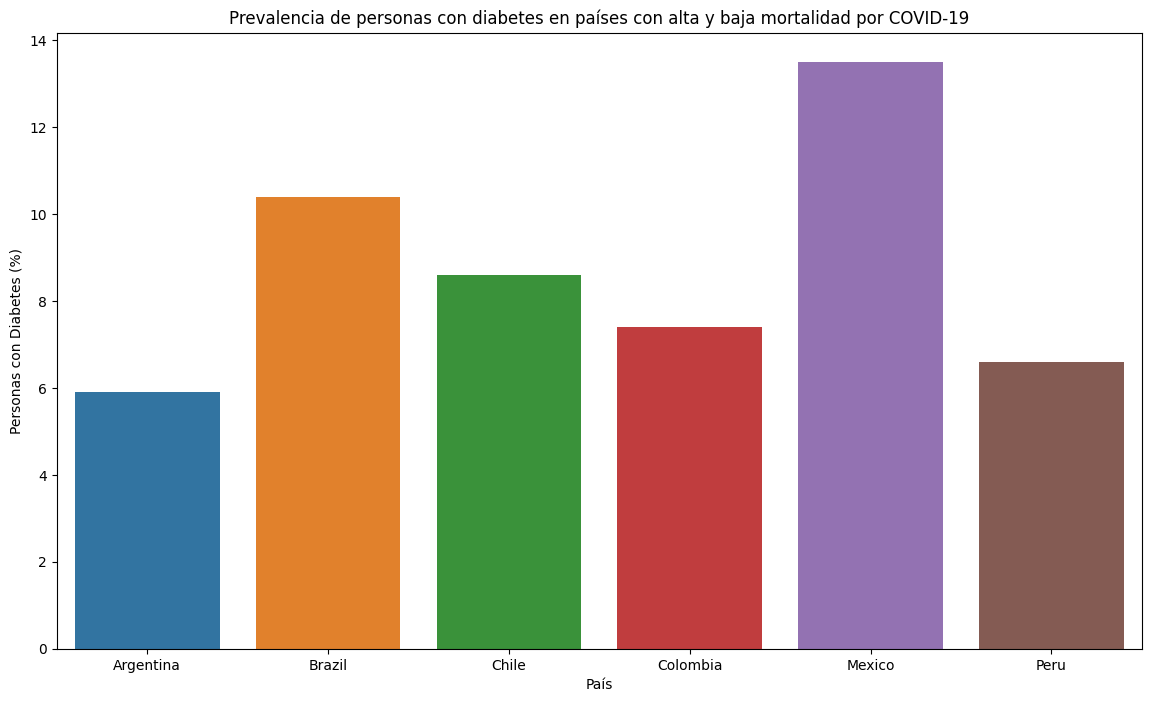

In [44]:
plt.figure(figsize=(14, 8))
sns.barplot(data=data_filtrada, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.title('Prevalencia de personas con diabetes en países con alta y baja mortalidad por COVID-19')
plt.xlabel('País')
plt.ylabel('Personas con Diabetes (%)')
plt.show()

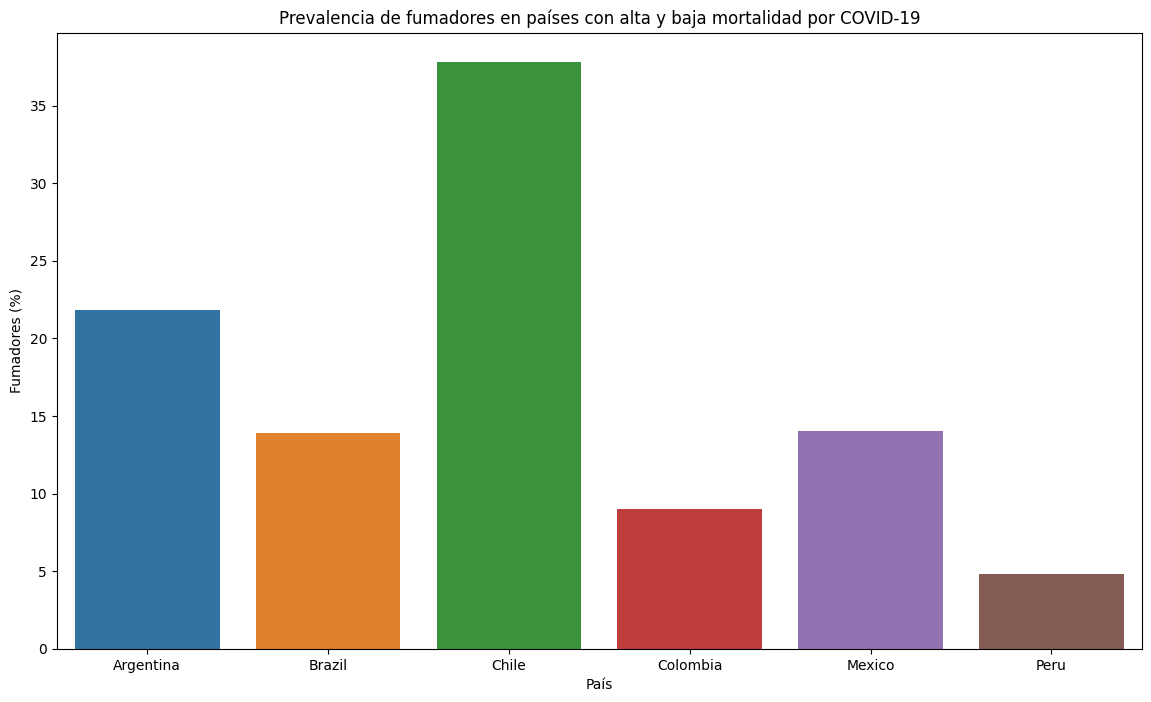

In [45]:
plt.figure(figsize=(14, 8))
sns.barplot(data=data_filtrada, x='country_name', y='smoking_prevalence', hue='country_name')
plt.title('Prevalencia de fumadores en países con alta y baja mortalidad por COVID-19')
plt.xlabel('País')
plt.ylabel('Fumadores (%)')
plt.show()

------------------------------------------------------------------------------------------------------------------------------------
**Comparación de la situación actual**

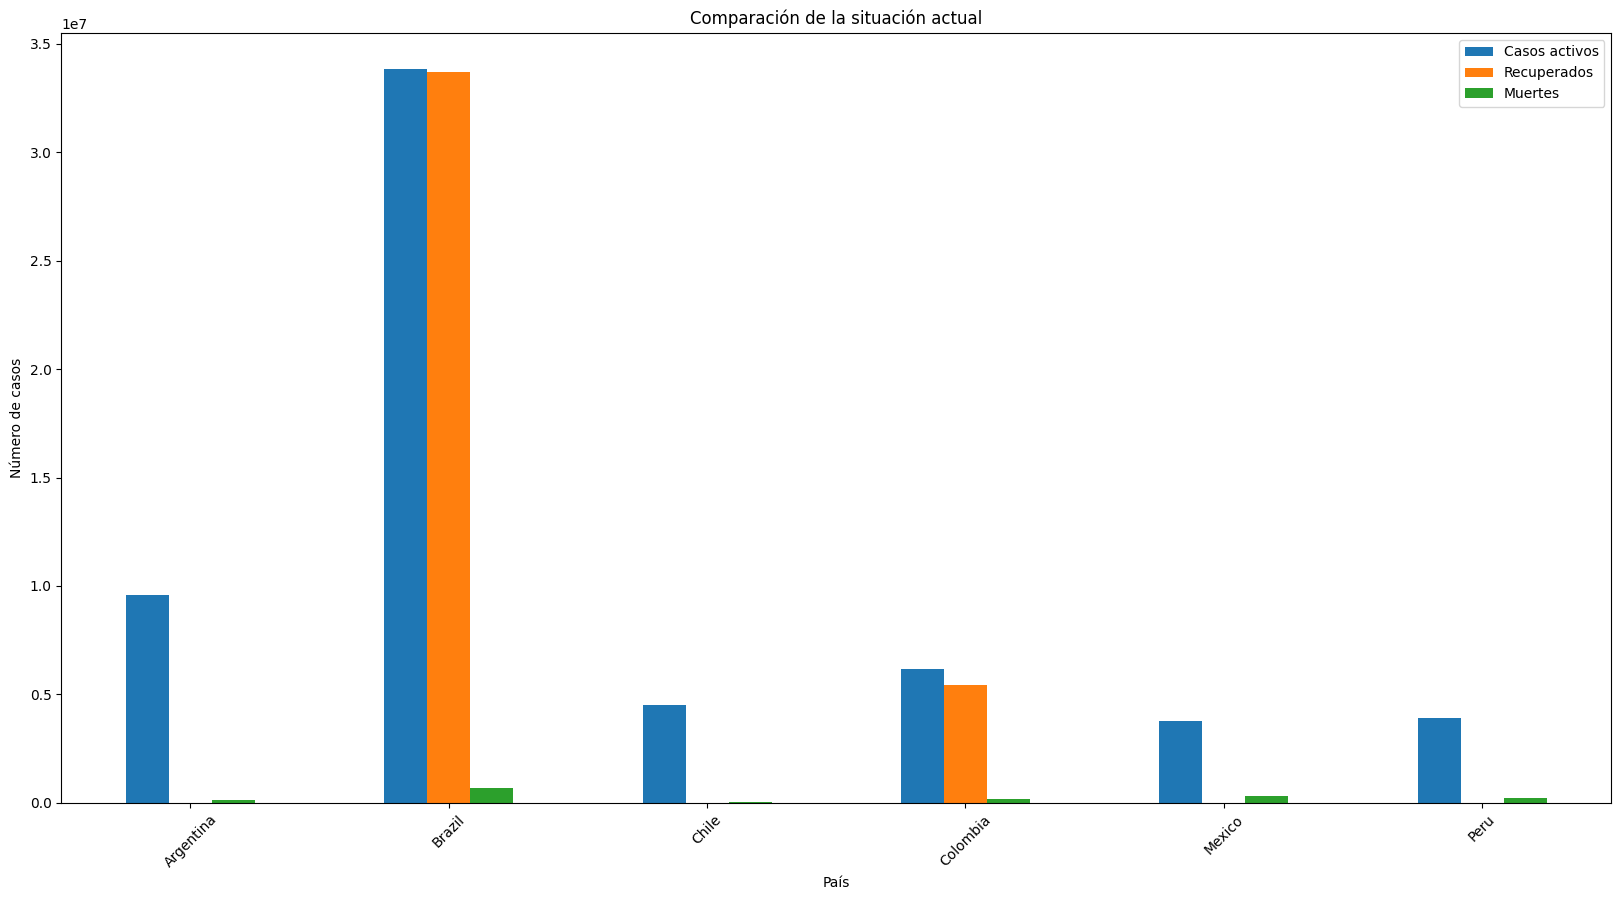

In [63]:
situacion = data.groupby('country_name').max()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']]
situacion.plot(kind='bar', stacked=False, figsize=(20, 10))
plt.title('Comparación de la situación actual')
plt.xlabel('País')
plt.ylabel('Número de casos')
plt.xticks(rotation=45)
plt.legend(['Casos activos', 'Recuperados', 'Muertes'])
plt.show()

------------------------------------------------------------------------------------------------------------------------------------
**EXTRA**

In [83]:
col = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data[col].dropna()

mapa = folium.Map(location=[-14.235004, -51.92528], zoom_start=3) #ubicación aprox de LATAM
#casos confirmados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
mapa.add_child(heat_map_confirmed)
#muertes confirmadas
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15)
mapa.add_child(heat_map_deceased)
#vacunas administradas confirmadas
heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15)
mapa.add_child(heat_map_vaccine)
#casos recuperados confirmados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15)
mapa.add_child(heat_map_recovered)
mapa.save('mapa.html')
mapa

# Avance 4

In [ ]:
data = pd.read_csv(r'D:\Cursos\Henry - Data Analytics\Modulo 4\PI\DatosFinalesFiltrado.csv', sep=',', low_memory=True)
data.shape

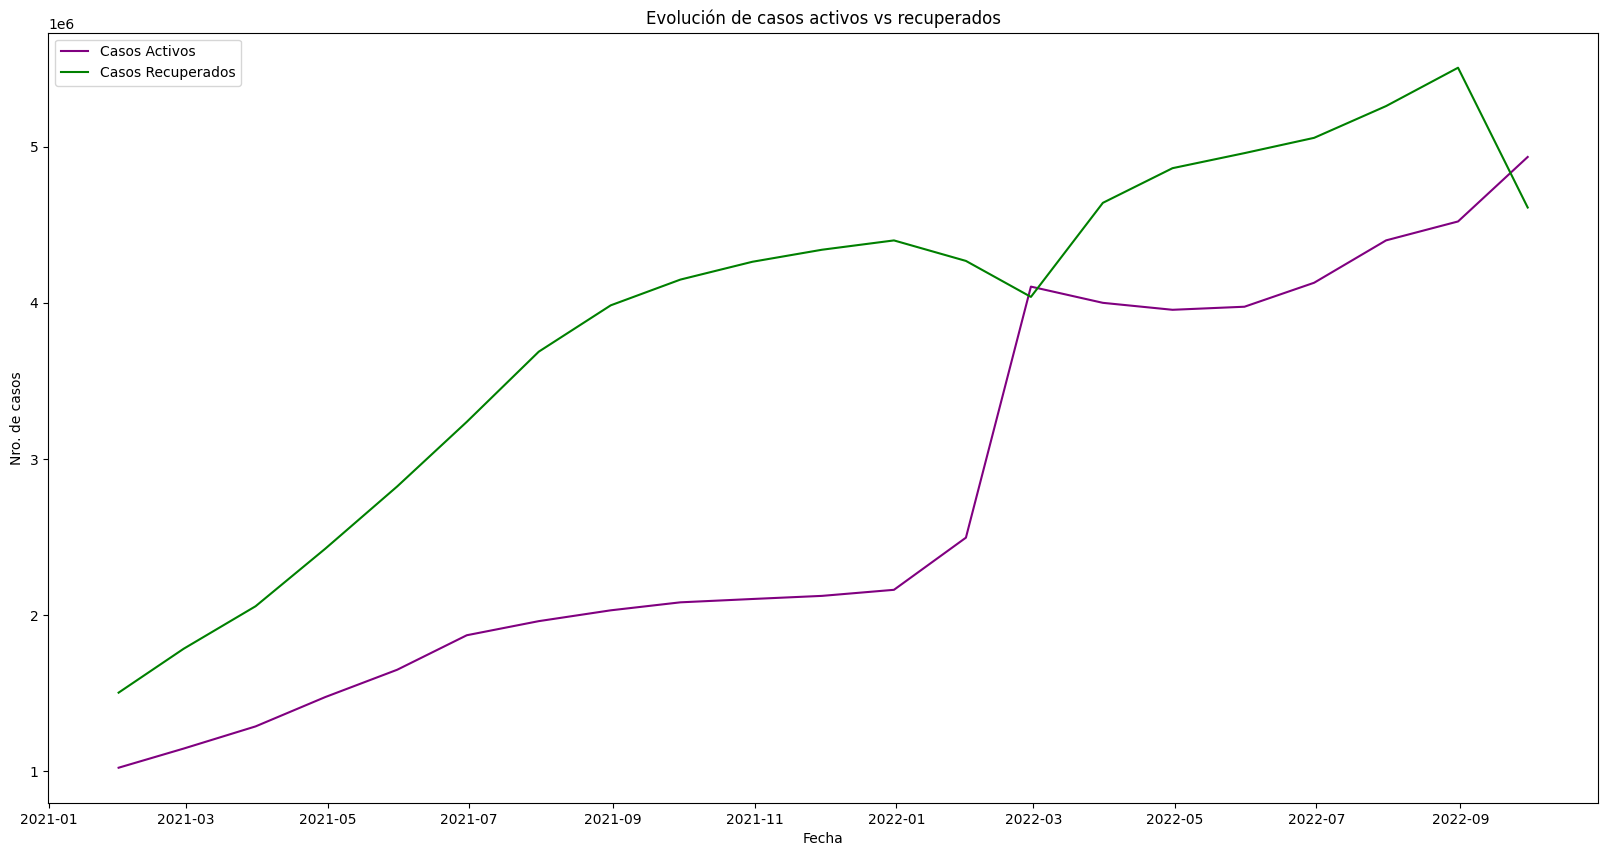

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'D:\Cursos\Henry - Data Analytics\Modulo 4\PI\DatosFinalesFiltrado.csv', sep=',', low_memory=True)
data['date'] = pd.to_datetime(data['date'], format = 'mixed')
data = data.set_index(data['date'])
#----------------------------------------------------------------------------------------------------------------------

data['active_cases'] = (data['cumulative_confirmed'] - data['cumulative_recovered'] - data['cumulative_deceased'])

plt.figure(figsize=(20, 10))
sns.lineplot(data=data.resample('ME').mean(numeric_only=True), x='date', y='active_cases', color='purple', label='Casos Activos')
sns.lineplot(data=data.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', color='green', label='Casos Recuperados')
plt.title('Evolución de casos activos vs recuperados')
plt.xlabel('Fecha')
plt.ylabel('Nro. de casos')
plt.legend()
plt.show()

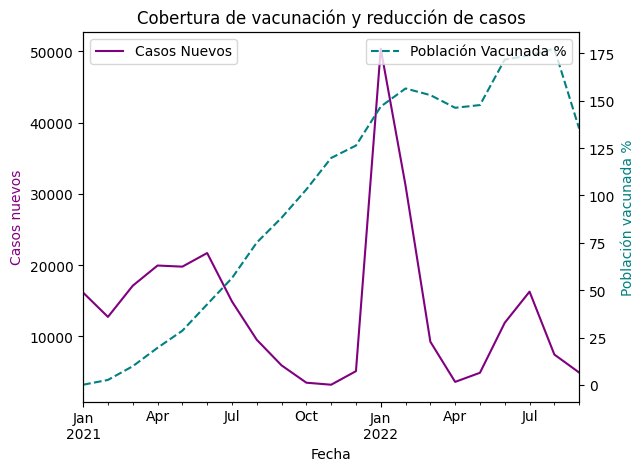

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'D:\Cursos\Henry - Data Analytics\Modulo 4\PI\DatosFinalesFiltrado.csv', sep=',', low_memory=True)
data['date'] = pd.to_datetime(data['date'], format = 'mixed')
data = data.set_index(data['date'])
#----------------------------------------------------------------------------------------------------------------------

ax1 = plt.gca()
ax2 = ax1.twinx()
data['percentage_vaccinated'] = (data['cumulative_vaccine_doses_administered'] / data['population']) * 100
data.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='purple', label='Casos Nuevos')
data.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='teal', label='Población Vacunada %', linestyle='--')

ax1.set_title('Cobertura de vacunación y reducción de casos')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos nuevos', color='purple')
ax2.set_ylabel('Población vacunada %', color='teal')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

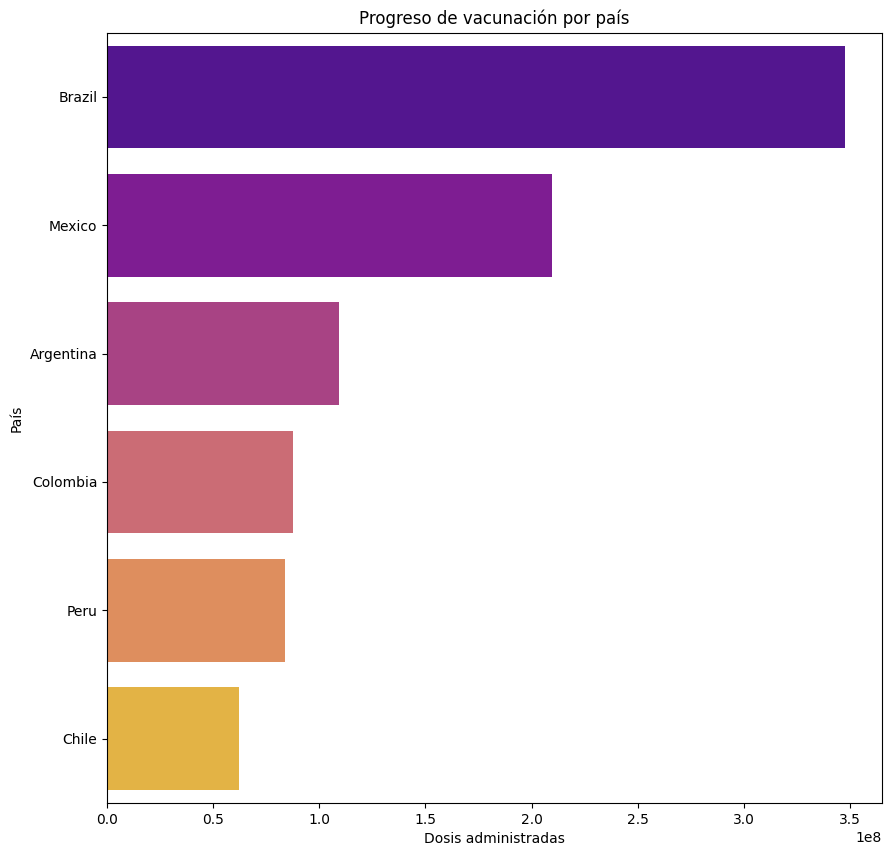

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'D:\Cursos\Henry - Data Analytics\Modulo 4\PI\DatosFinalesFiltrado.csv', sep=',', low_memory=True)
data['date'] = pd.to_datetime(data['date'], format = 'mixed')
data = data.set_index(data['date'])
#----------------------------------------------------------------------------------------------------------------------

data_vac = data.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(x=data_vac.values, y=data_vac.index, hue=data_vac.index, palette='plasma')
plt.title('Progreso de vacunación por país')
plt.xlabel('Dosis administradas')
plt.ylabel('País')
plt.show()

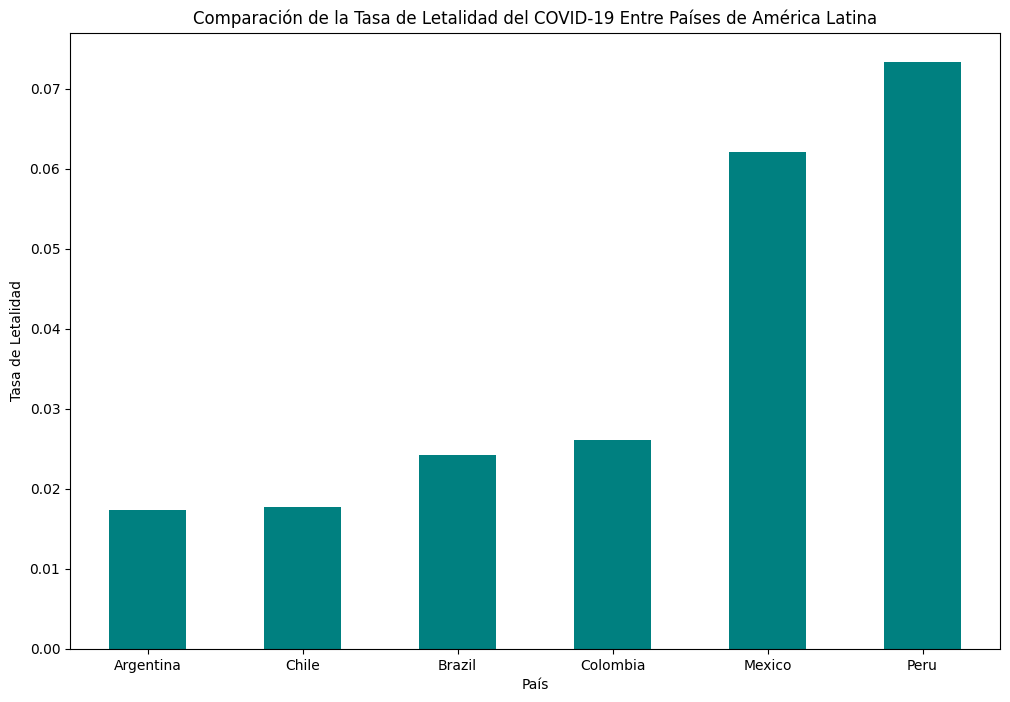

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'D:\Cursos\Henry - Data Analytics\Modulo 4\PI\DatosFinalesFiltrado.csv', sep=',', low_memory=True)
data['date'] = pd.to_datetime(data['date'], format = 'mixed')
data = data.set_index(data['date'])
#----------------------------------------------------------------------------------------------------------------------

data['case_fatality_rate'] = (data['cumulative_deceased'] / data['cumulative_confirmed'])

fatality_rates = (data.groupby('country_name')['case_fatality_rate'].last().sort_values())

plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='teal')

plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.xticks(rotation=0)
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')

plt.show()


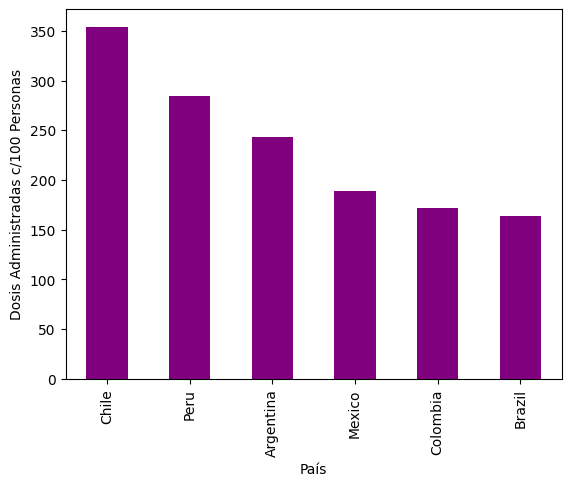

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'D:\Cursos\Henry - Data Analytics\Modulo 4\PI\DatosFinalesFiltrado.csv', sep=',', low_memory=True)
data['date'] = pd.to_datetime(data['date'], format = 'mixed')
data = data.set_index(data['date'])
#----------------------------------------------------------------------------------------------------------------------

max_vac = data.groupby('country_name')['cumulative_vaccine_doses_administered'].max()
poblacion = data.groupby('country_name')['population'].max()
vac_stgy = (max_vac / poblacion) * 100

#plt.figure(figsize=(10, 10))
vac_stgy.sort_values(ascending=False).plot(kind='bar', color='purple')
#plt.title('Comparación de estrategias de vacunación')
plt.xlabel('País')
plt.ylabel('Dosis Administradas c/100 Personas')
plt.show()

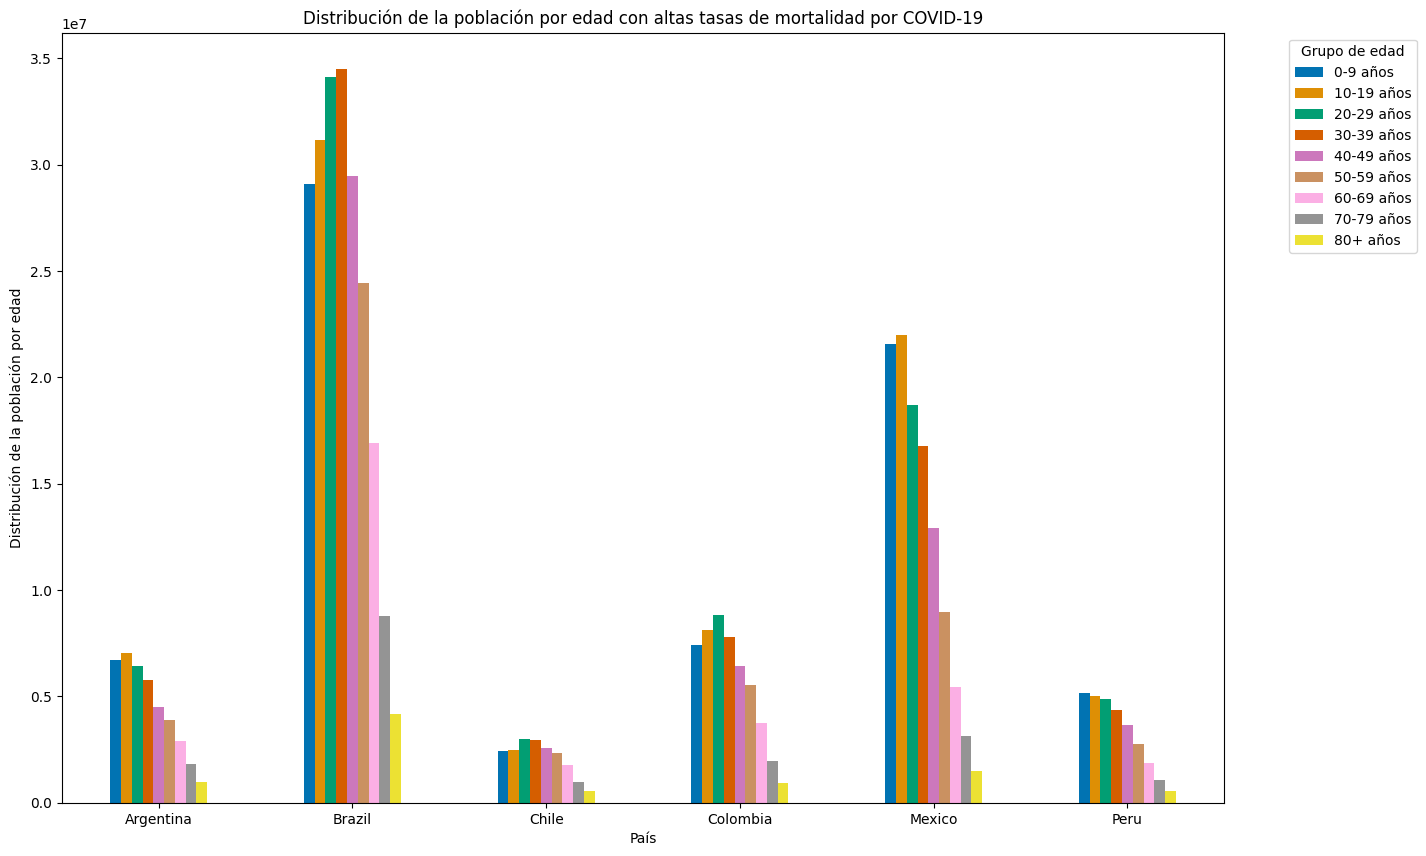

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'D:\Cursos\Henry - Data Analytics\Modulo 4\PI\DatosFinalesFiltrado.csv', sep=',', low_memory=True)
data['date'] = pd.to_datetime(data['date'], format = 'mixed')
data = data.set_index(data['date'])
#----------------------------------------------------------------------------------------------------------------------

alta_mortalidad = data.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).index
grupos_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 
               'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
dist_edad = data[data['country_name'].isin(alta_mortalidad)].groupby('country_name')[grupos_edad].mean()

sns.set_palette('colorblind')

dist_edad.plot(kind='bar', stacked=False, figsize=(15, 10))
plt.title('Distribución de la población por edad con altas tasas de mortalidad por COVID-19')
plt.xlabel('País')
plt.ylabel('Distribución de la población por edad')
plt.xticks(rotation=0)
nombres_grupos_edad = ['0-9 años', '10-19 años', '20-29 años', '30-39 años', '40-49 años', '50-59 años', '60-69 años', '70-79 años', '80+ años']
plt.legend(nombres_grupos_edad, bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupo de edad')
plt.show()

C:\Users\aera1\AppData\Local\Temp\ipykernel_14992\1742513639.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casos['urban_population_percentage'], y=casos.index, palette='plasma')


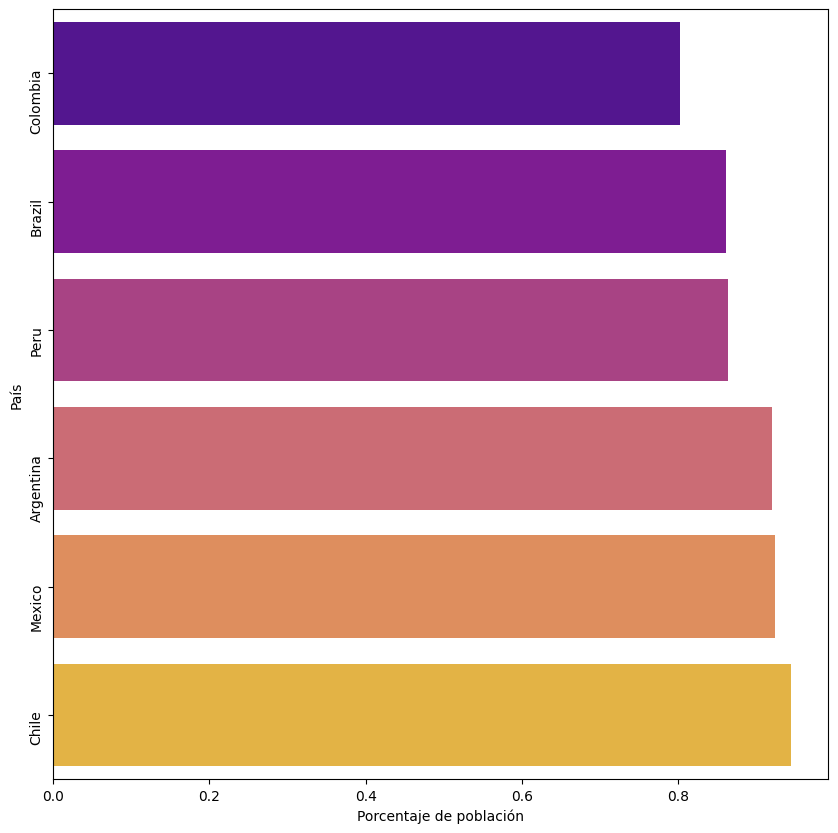

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'D:\Cursos\Henry - Data Analytics\Modulo 4\PI\DatosFinalesFiltrado.csv', sep=',', low_memory=True)
data['date'] = pd.to_datetime(data['date'], format = 'mixed')
data = data.set_index(data['date'])
#----------------------------------------------------------------------------------------------------------------------

data['urban_population_percentage'] = \
    data['population_urban'] / data['population']
casos = data.groupby('country_name').last().sort_values(by='urban_population_percentage') #la población es constante, solamente se necesita acceder a uno

plt.figure(figsize=(10,10))
sns.barplot(x=casos['urban_population_percentage'], y=casos.index, palette='plasma')
#plt.title('Impacto de la urbanización en la propagación del COVID-19')
plt.xlabel('Porcentaje de población')
plt.ylabel('País')
plt.yticks(rotation=90)
plt.show()

C:\Users\aera1\AppData\Local\Temp\ipykernel_14992\4081388161.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casos['urban_population_percentage'], y=casos.index, palette='plasma')


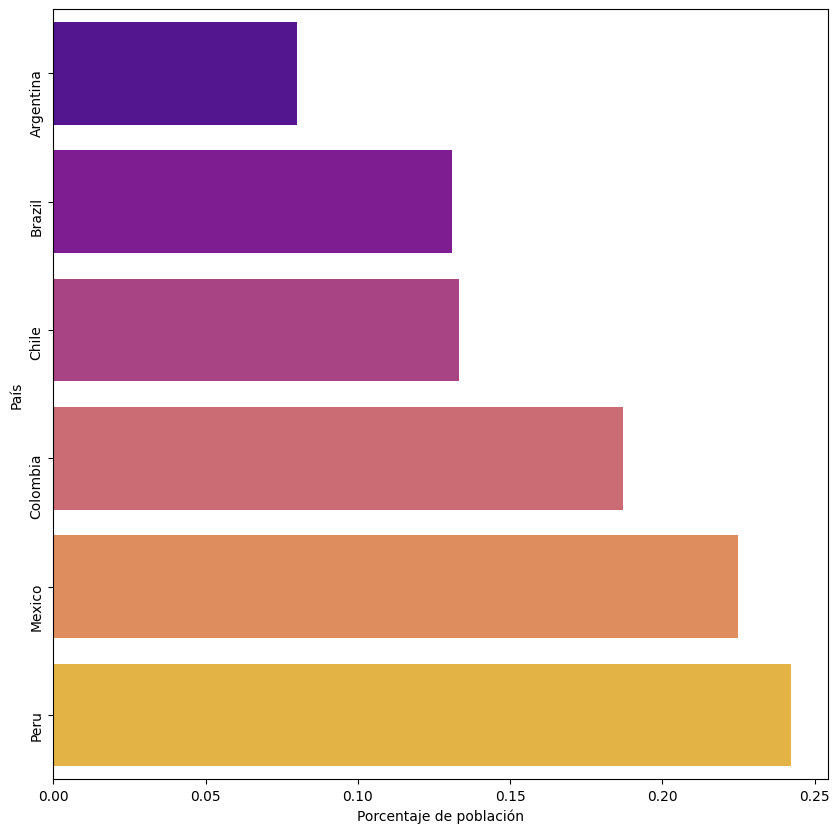

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'D:\Cursos\Henry - Data Analytics\Modulo 4\PI\DatosFinalesFiltrado.csv', sep=',', low_memory=True)
data['date'] = pd.to_datetime(data['date'], format = 'mixed')
data = data.set_index(data['date'])
#----------------------------------------------------------------------------------------------------------------------

data['urban_population_percentage'] = \
    data['population_rural'] / data['population']
casos = data.groupby('country_name').last().sort_values(by='urban_population_percentage') #la población es constante, solamente se necesita acceder a uno

plt.figure(figsize=(10,10))
sns.barplot(x=casos['urban_population_percentage'], y=casos.index, palette='plasma')
#plt.title('Impacto de la urbanización en la propagación del COVID-19')
plt.xlabel('Porcentaje de población')
plt.ylabel('País')
plt.yticks(rotation=90)
plt.show()